In [1]:
# For reading, visualizing, and preprocessing data
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score, cohen_kappa_score, log_loss, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Classifiers
from sklearn.model_selection import cross_validate
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
# from tensorflow.keras.models import Sequential
#from mlxtend.classifier import StackingCVClassifier 

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

In [4]:
data = pd.read_csv(".\\dataset_final.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
numeric_data = data.copy()
numeric_data.drop(columns=numeric_data.columns[0],axis=1,inplace=True)
numeric_data

dst_host_srv_count  logged_in  flag_SF  dst_host_same_srv_rate  \
0                -0.818965  -0.809310        1               -0.782294   
1                -1.035763  -0.809310        1               -1.160960   
2                -0.809932  -0.809310        0               -0.938215   
3                 1.258683   1.235621        1                1.066483   
4                 1.258683   1.235621        1                1.066483   
...                    ...        ...      ...                     ...   
336710           -0.443614   1.235621        1                1.066483   
336711           -1.012211   1.235621        1                1.066483   
336712           -0.302367   1.235621        1                1.066483   
336713           -1.030388   1.235621        1               -0.372156   
336714           -1.035763   1.235621        1                1.066483   

        service_http  same_srv_rate  service_private  dst_host_diff_srv_rate  \
0                  0       0.771327                0               -0.280305   
1                  0      -1.321354                0                2.736741   
2                  0      -1.389593                1               -0.174444   
3                  1       0.771327                0               -0.439097   
4                  1       0.771327                0               -0.439097   
...              ...            ...              ...                     ...   
336710             0       0.771327                0               -0.439097   
336711             0       0.771327                0               -0.439097   
336712             0       0.771327                0               -0.439097   
336713             0       0.771327                0                3.294487   
336714             0       0.771327                0               -0.439097   

           count  dst_host_srv_serror_rate  dst_host_serror_rate  serror_rate  \
0      -0.717085                 -0.624902             -0.639564    -0.637241   
1      -0.621024                 -0.624902             -0.639564    -0.637241   
2       0.339590                  1.618875              1.608679     1.602584   
3      -0.690887                 -0.602464             -0.572117    -0.189276   
4      -0.472565                 -0.624902             -0.639564    -0.637241   
...          ...                       ...                   ...          ...   
336710 -0.725818                 -0.624902             -0.639564    -0.637241   
336711 -0.725818                 -0.624902             -0.639564    -0.637241   
336712 -0.715439                 -0.624902             -0.639564    -0.637241   
336713 -0.725818                 -0.624902             -0.639564    -0.637241   
336714 -0.725818                 -0.624902             -0.639564    -0.637241   

        srv_serror_rate  flag_S0  service_eco_i  dst_host_same_src_port_rate  \
0             -0.631961        0              0                     0.070186   
1             -0.631961        0              0                     2.368492   
2              1.605024        1              0                    -0.480113   
3             -0.184564        0              0                    -0.383002   
4             -0.631961        0              0                    -0.480113   
...                 ...      ...            ...                          ...   
336710        -0.631961        0              0                     2.756939   
336711        -0.631961        0              0                     0.430865   
336712        -0.631961        0              0                     2.756939   
336713        -0.631961        0              0                     0.280996   
336714        -0.631961        0              0                     2.756939   

        dst_host_srv_rerror_rate  srv_rerror_rate  rerror_rate  \
0                      -0.376402        -0.374447    -0.374377   
1                      -0.376402        -0.374447    -0.374377   
2                      -0.

In [8]:
X = numeric_data.iloc[:,0:30].to_numpy() 
Y = numeric_data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(269372, 30) (67343, 30)
(269372,) (67343,)


In [9]:
def matrix(Y_test,Y_test_pred,name):
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_test_pred)
    # Print the confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    ax.set_title(name); 
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')

In [10]:
def plot(Y_test,Y_test_pred,name):
    plt.figure(figsize=(22,10))
    plt.plot(Y_test_pred[100:200], label="Prediction", linewidth=2.5,color='blue')
    plt.plot(Y_test[100:200].values, label="Actual_values", linewidth=2.5,color='lightcoral')
    plt.legend(loc="best")
    plt.title(name)
    plt.show()



GAUSSIAN NAIVE BAYES MODEL-----------------------------
- Training time :  0.362321138381958
- Testing time :  0.24262619018554688
----------------------------------
- Train Accuracy : 0.7817033693182662
- Train MCC : 0.7501340776389464
- Train F1 score : 0.7623651842998804
- Train Precision : 0.8397738983010044
- Train Recall : 0.7817033693182662
- Train Cohens Kappa Score : 0.7270809369029264
- Train Log Loss : 5.550648907089971
----------------------------------
- Test Accuracy : 77.93237604502325
- Test MCC : 0.7477287472828484
- Test F1 score : 0.7607206798039772
- Test Precision : 0.8393432696940197
- Test Recall : 0.7793237604502324
- Test Cohens Kappa Score : 0.7243479900710001
- Test Log Loss : 5.624672867420884
----------------------------------
Mean Absolute Error -  0.31395987704735456
Mean Squared Error -  0.6388043300714253
Root Mean Squared Error -  0.7992523569382985
----------------------------------


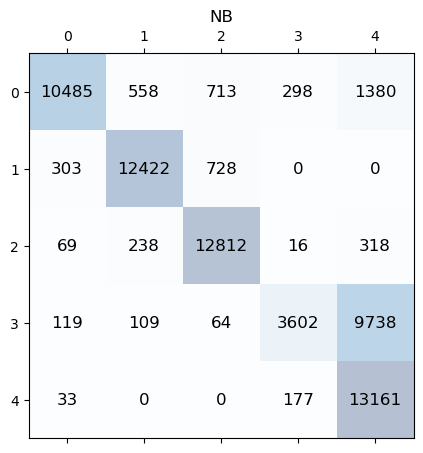

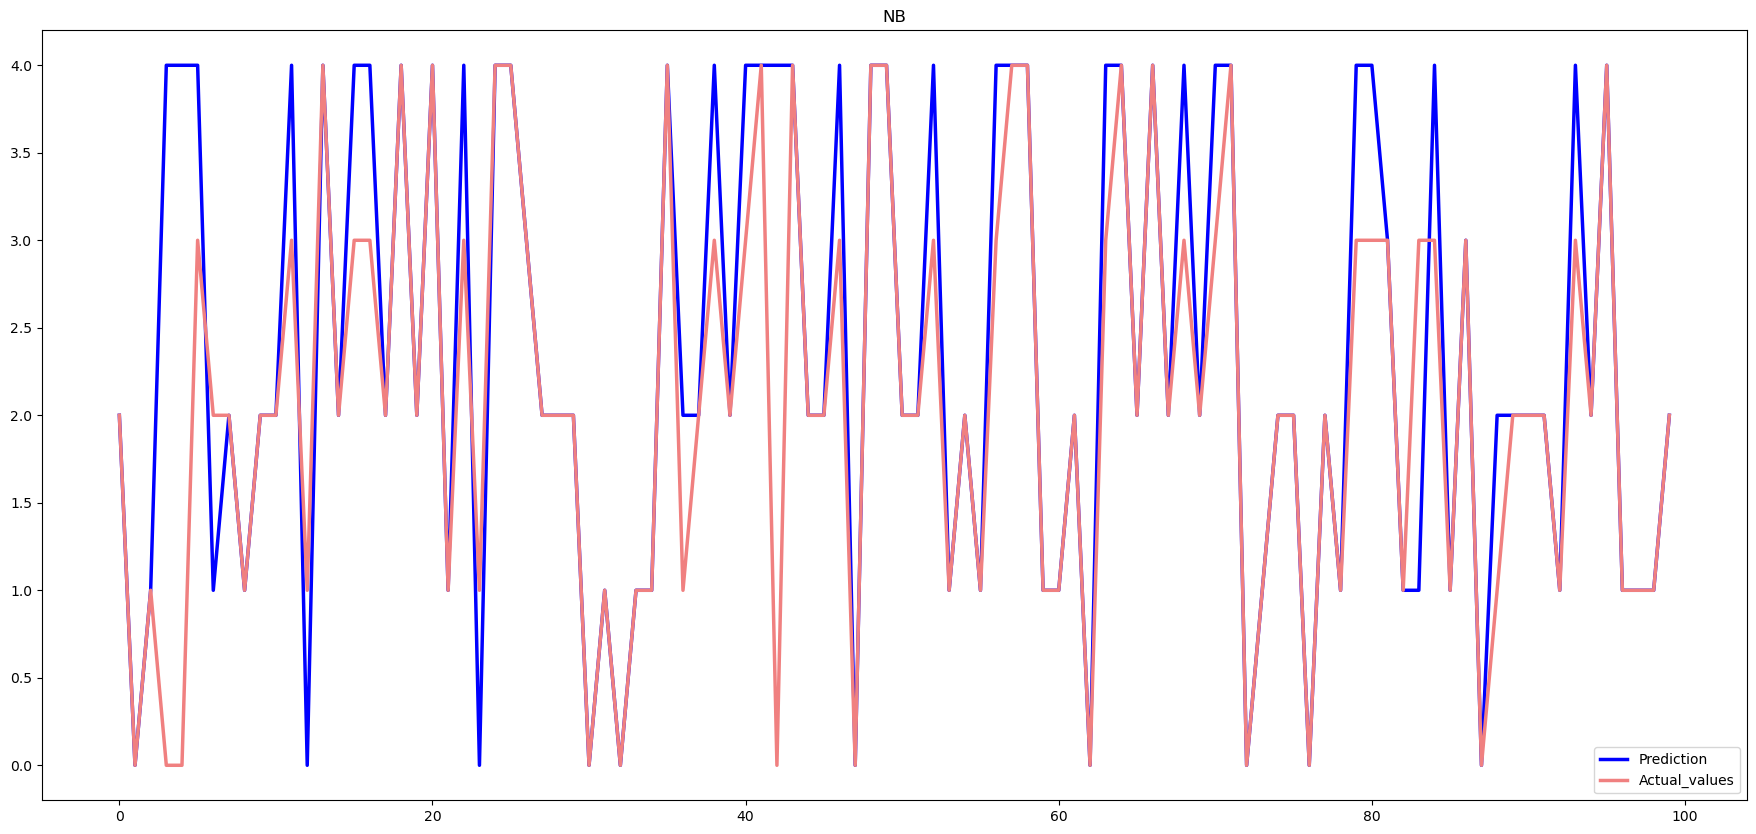

In [11]:
print('\n')
print("GAUSSIAN NAIVE BAYES MODEL-----------------------------")

nb = GaussianNB()
start_time = time.time()
nb.fit(X_train,Y_train)
end_time = time.time()
print("- Training time : ",end_time-start_time)
start_time = time.time()
Y_test_pred = nb.predict(X_test) 
end_time = time.time()
print("- Testing time : ",end_time-start_time)
print('----------------------------------')
Y_train_pred = nb.predict(X_train)
Y_train_probs = nb.predict_proba(X_train)
Y_test_probs = nb.predict_proba(X_test)

ac=accuracy_score(Y_test, Y_test_pred)*100 


nb_train_accuracy = accuracy_score(Y_train,Y_train_pred)
nb_train_mcc = matthews_corrcoef(Y_train,Y_train_pred)
nb_train_f1 = f1_score(Y_train,Y_train_pred,average = 'weighted')
nb_train_precision = precision_score(Y_train, Y_train_pred,average='weighted')
nb_train_recall = recall_score(Y_train, Y_train_pred, average='weighted')
nb_train_ckscore = cohen_kappa_score(Y_train, Y_train_pred)
nb_train_logloss = log_loss(Y_train, Y_train_probs)
#-----------------------------------------------------------------------
nb_test_mcc = matthews_corrcoef(Y_test,Y_test_pred)
nb_test_f1 = f1_score(Y_test,Y_test_pred,average = 'weighted')
nb_test_precision = precision_score(Y_test, Y_test_pred,average='weighted')
nb_test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
nb_test_ckscore = cohen_kappa_score(Y_test, Y_test_pred)
nb_test_logloss = log_loss(Y_test, Y_test_probs)

print('- Train Accuracy : %s' % nb_train_accuracy)
print('- Train MCC : %s' % nb_train_mcc)
print('- Train F1 score : %s' % nb_train_f1)
print('- Train Precision : %s' % nb_train_precision)
print('- Train Recall : %s' % nb_train_recall)
print('- Train Cohens Kappa Score : %s' % nb_train_ckscore)
print('- Train Log Loss : %s' % nb_train_logloss)
print('----------------------------------')
print('- Test Accuracy : %s' % ac)
print('- Test MCC : %s' % nb_test_mcc)
print('- Test F1 score : %s' % nb_test_f1)
print('- Test Precision : %s' % nb_test_precision)
print('- Test Recall : %s' % nb_test_recall)
print('- Test Cohens Kappa Score : %s' % nb_test_ckscore)
print('- Test Log Loss : %s' % nb_test_logloss)
print('----------------------------------')
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test, Y_test_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test, Y_test_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
print('----------------------------------')
matrix(Y_test, Y_test_pred, "NB")
plot(Y_test, Y_test_pred, "NB")



Decision Tree MODEL-----------------------------
- Training time :  4.141879558563232
- Testing time :  0.024960041046142578
----------------------------------
- Train Accuracy : 0.999754985670374
- Train MCC : 0.9996937400016316
- Train F1 score : 0.9997549960625769
- Train Precision : 0.9997550388788701
- Train Recall : 0.999754985670374
- Train Cohens Kappa Score : 0.9996937318902791
- Train Log Loss : 0.0005059935141731832
----------------------------------
- Test Accuracy : 77.93237604502325
- Test MCC : 0.7477287472828484
- Test F1 score : 0.7607206798039772
- Test Precision : 0.8393432696940197
- Test Recall : 0.7793237604502324
- Test Cohens Kappa Score : 0.7243479900710001
- Test Log Loss : 0.12668696036599322
----------------------------------
Mean Absolute Error -  0.31395987704735456
Mean Squared Error -  0.6388043300714253
Root Mean Squared Error -  0.7992523569382985
----------------------------------


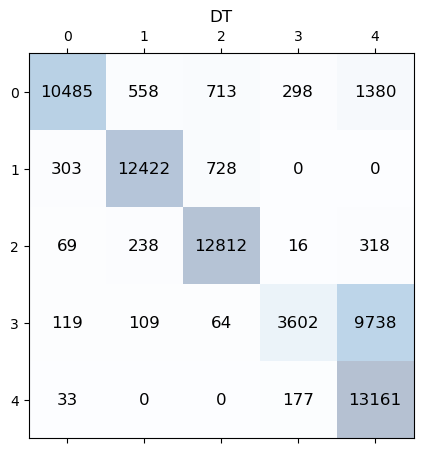

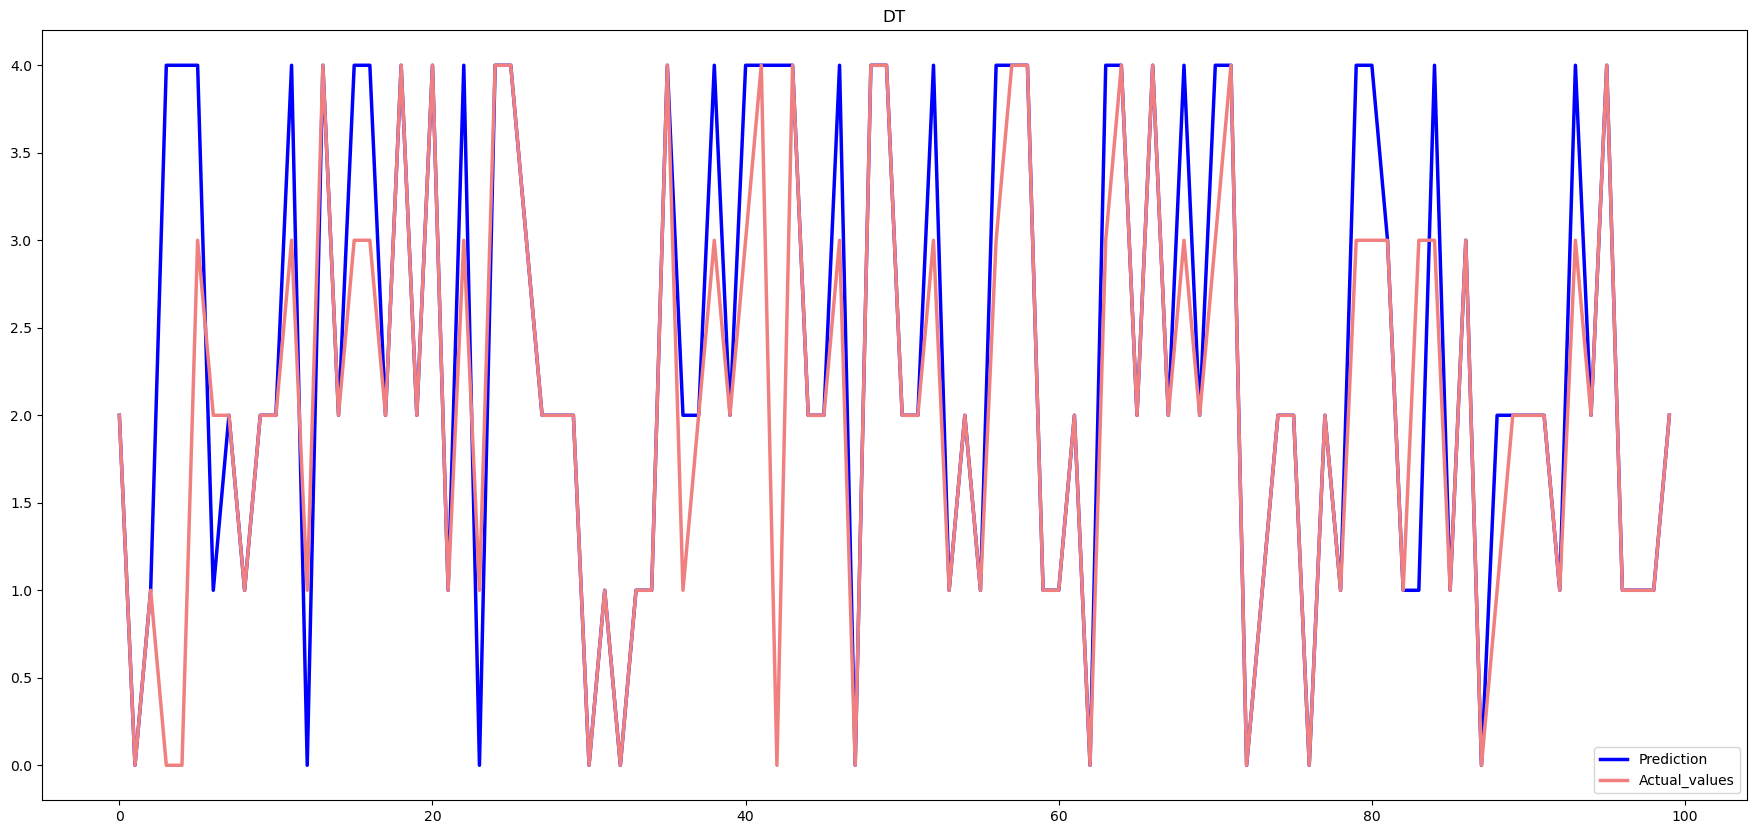

In [8]:
print('\n')
print("Decision Tree MODEL-----------------------------")

dt = DecisionTreeClassifier(criterion='gini')
# dt = DecisionTreeClassifier(random_state = 42)
# dt = DecisionTreeClassifier(random_state=123)
start_time = time.time()
dt.fit(X_train,Y_train)
end_time = time.time()
print("- Training time : ",end_time-start_time)
start_time = time.time()
_test_pred = dt.predict(X_test) 
end_time = time.time()
print("- Testing time : ",end_time-start_time)
print('----------------------------------')
Y_train_pred = dt.predict(X_train)
Y_train_probs = dt.predict_proba(X_train)
Y_test_probs = dt.predict_proba(X_test)

ac=accuracy_score(Y_test, Y_test_pred)*100 


dt_train_accuracy = accuracy_score(Y_train,Y_train_pred)
dt_train_mcc = matthews_corrcoef(Y_train,Y_train_pred)
dt_train_f1 = f1_score(Y_train,Y_train_pred,average = 'weighted')
dt_train_precision = precision_score(Y_train, Y_train_pred,average='weighted')
dt_train_recall = recall_score(Y_train, Y_train_pred, average='weighted')
dt_train_ckscore = cohen_kappa_score(Y_train, Y_train_pred)
dt_train_logloss = log_loss(Y_train, Y_train_probs)
#-----------------------------------------------------------------------
dt_test_mcc = matthews_corrcoef(Y_test,Y_test_pred)
dt_test_f1 = f1_score(Y_test,Y_test_pred,average = 'weighted')
dt_test_precision = precision_score(Y_test, Y_test_pred,average='weighted')
dt_test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
dt_test_ckscore = cohen_kappa_score(Y_test, Y_test_pred)
dt_test_logloss = log_loss(Y_test, Y_test_probs)

print('- Train Accuracy : %s' % dt_train_accuracy)
print('- Train MCC : %s' % dt_train_mcc)
print('- Train F1 score : %s' % dt_train_f1)
print('- Train Precision : %s' % dt_train_precision)
print('- Train Recall : %s' % dt_train_recall)
print('- Train Cohens Kappa Score : %s' % dt_train_ckscore)
print('- Train Log Loss : %s' % dt_train_logloss)
print('----------------------------------')
print('- Test Accuracy : %s' % ac)
print('- Test MCC : %s' % dt_test_mcc)
print('- Test F1 score : %s' % dt_test_f1)
print('- Test Precision : %s' % dt_test_precision)
print('- Test Recall : %s' % dt_test_recall)
print('- Test Cohens Kappa Score : %s' % dt_test_ckscore)
print('- Test Log Loss : %s' % dt_test_logloss)
print('----------------------------------')
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test, Y_test_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test, Y_test_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
print('----------------------------------')
matrix(Y_test, Y_test_pred, "DT")
plot(Y_test, Y_test_pred, "DT")



RANDOM FOREST MODEL-----------------------------
- Training time :  19.26973056793213
- Testing time :  0.3746368885040283
----------------------------------
- Train Accuracy : 0.9997252869637527
- Train MCC : 0.9996566123439325
- Train F1 score : 0.9997252756418756
- Train Precision : 0.9997252797459003
- Train Recall : 0.9997252869637527
- Train Cohens Kappa Score : 0.9996566084864476
- Train Log Loss : 0.0025631457884836544
----------------------------------
- Test Accuracy : 99.78319944166432
- Test MCC : 0.997290001368399
- Test F1 score : 0.9978319796938238
- Test Precision : 0.9978321164376833
- Test Recall : 0.9978319944166432
- Test Cohens Kappa Score : 0.9972899634341185
- Test Log Loss : 0.02687487399947962
----------------------------------
Mean Absolute Error -  0.00393507862732578
Mean Squared Error -  0.00960753159199917
Root Mean Squared Error -  0.09801801667040182
----------------------------------


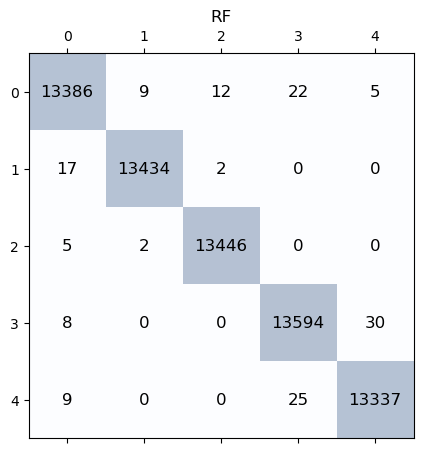

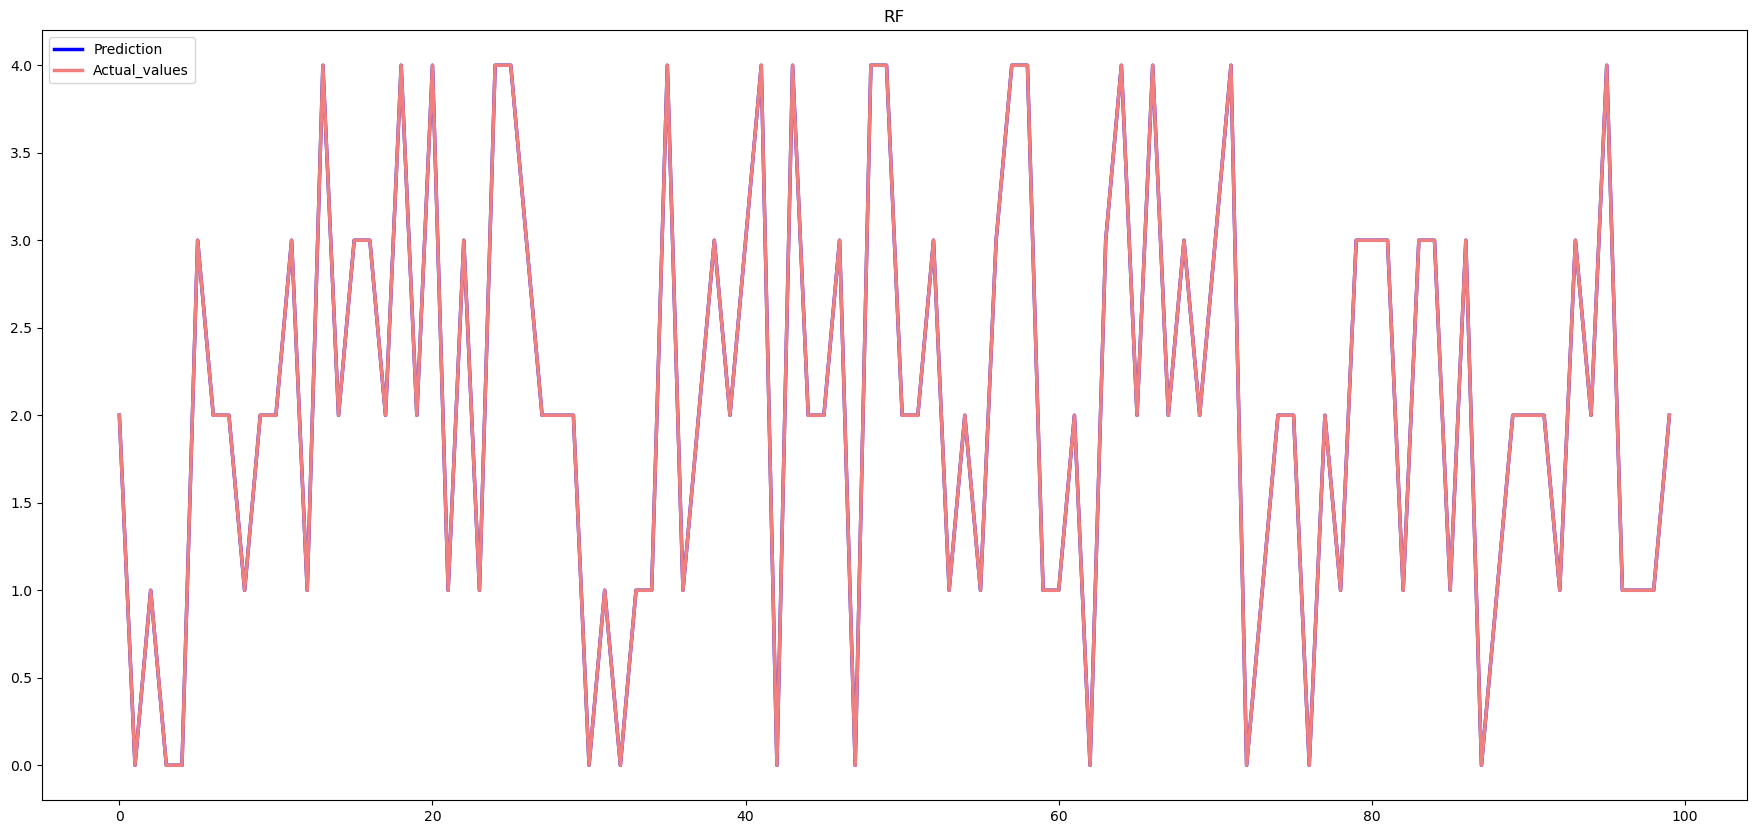

In [9]:
print('\n')
print("RANDOM FOREST MODEL-----------------------------")

rf = RandomForestClassifier(n_estimators=30)
start_time = time.time()
rf.fit(X_train,Y_train)
end_time = time.time()
print("- Training time : ",end_time-start_time)
start_time = time.time()
Y_test_pred = rf.predict(X_test) 
end_time = time.time()
print("- Testing time : ",end_time-start_time)
print('----------------------------------')
Y_train_pred = rf.predict(X_train)
Y_train_probs = rf.predict_proba(X_train)
Y_test_probs = rf.predict_proba(X_test)

ac=accuracy_score(Y_test, Y_test_pred)*100 


rf_train_accuracy = accuracy_score(Y_train,Y_train_pred)
rf_train_mcc = matthews_corrcoef(Y_train,Y_train_pred)
rf_train_f1 = f1_score(Y_train,Y_train_pred,average = 'weighted')
rf_train_precision = precision_score(Y_train, Y_train_pred,average='weighted')
rf_train_recall = recall_score(Y_train, Y_train_pred, average='weighted')
rf_train_ckscore = cohen_kappa_score(Y_train, Y_train_pred)
rf_train_logloss = log_loss(Y_train, Y_train_probs)
#-----------------------------------------------------------------------
rf_test_mcc = matthews_corrcoef(Y_test,Y_test_pred)
rf_test_f1 = f1_score(Y_test,Y_test_pred,average = 'weighted')
rf_test_precision = precision_score(Y_test, Y_test_pred,average='weighted')
rf_test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
rf_test_ckscore = cohen_kappa_score(Y_test, Y_test_pred)
rf_test_logloss = log_loss(Y_test, Y_test_probs)

print('- Train Accuracy : %s' % rf_train_accuracy)
print('- Train MCC : %s' % rf_train_mcc)
print('- Train F1 score : %s' % rf_train_f1)
print('- Train Precision : %s' % rf_train_precision)
print('- Train Recall : %s' % rf_train_recall)
print('- Train Cohens Kappa Score : %s' % rf_train_ckscore)
print('- Train Log Loss : %s' % rf_train_logloss)
print('----------------------------------')
print('- Test Accuracy : %s' % ac)
print('- Test MCC : %s' % rf_test_mcc)
print('- Test F1 score : %s' % rf_test_f1)
print('- Test Precision : %s' % rf_test_precision)
print('- Test Recall : %s' % rf_test_recall)
print('- Test Cohens Kappa Score : %s' % rf_test_ckscore)
print('- Test Log Loss : %s' % rf_test_logloss)
print('----------------------------------')
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test, Y_test_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test, Y_test_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
print('----------------------------------')
matrix(Y_test, Y_test_pred, "RF")
plot(Y_test, Y_test_pred, "RF")



LOGISTIC REGRESSION MODEL-----------------------------
- Training time :  112.73775148391724
- Testing time :  0.015746116638183594
----------------------------------
- Train Accuracy : 0.9200622187903716
- Train MCC : 0.9001526588145083
- Train F1 score : 0.9203853423762075
- Train Precision : 0.9209977887405467
- Train Recall : 0.9200622187903716
- Train Cohens Kappa Score : 0.9000785224001256
- Train Log Loss : 0.2558949905534927
----------------------------------
- Test Accuracy : 91.92640660499235
- Test MCC : 0.8991482773019264
- Test F1 score : 0.9195403049953282
- Test Precision : 0.9200978172380797
- Test Recall : 0.9192640660499235
- Test Cohens Kappa Score : 0.8990756926212983
- Test Log Loss : 0.25709368466181565
----------------------------------
Mean Absolute Error -  0.12638284602705552
Mean Squared Error -  0.27077795761994566
Root Mean Squared Error -  0.5203632938822124
----------------------------------


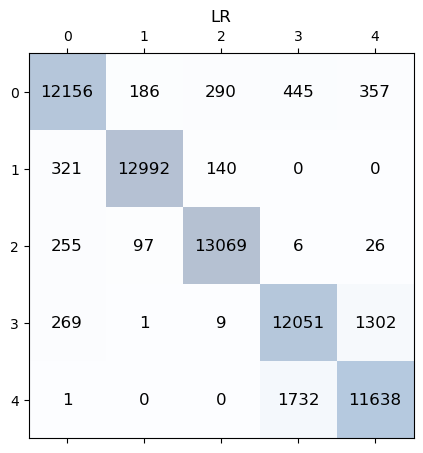

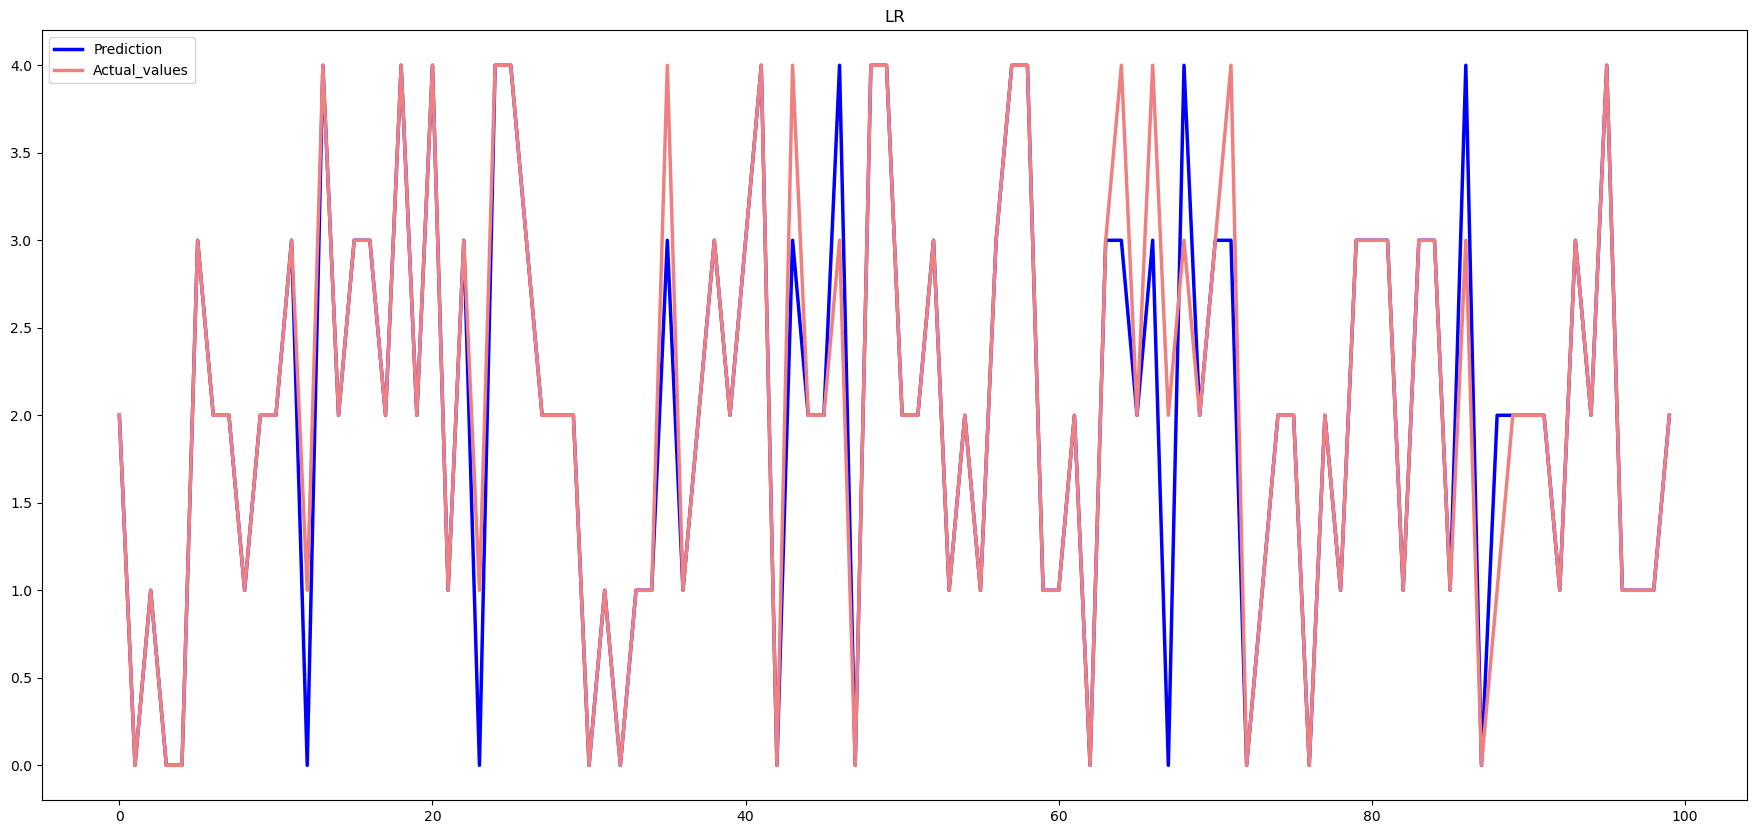

In [10]:
print('\n')
print("LOGISTIC REGRESSION MODEL-----------------------------")

lr = LogisticRegression(max_iter=1200000)
start_time = time.time()
lr.fit(X_train,Y_train)
end_time = time.time()
print("- Training time : ",end_time-start_time)
start_time = time.time()
Y_test_pred = lr.predict(X_test) 
end_time = time.time()
print("- Testing time : ",end_time-start_time)
print('----------------------------------')
Y_train_pred = lr.predict(X_train)
Y_train_probs = lr.predict_proba(X_train)
Y_test_probs = lr.predict_proba(X_test)

ac=accuracy_score(Y_test, Y_test_pred)*100 


lr_train_accuracy = accuracy_score(Y_train,Y_train_pred)
lr_train_mcc = matthews_corrcoef(Y_train,Y_train_pred)
lr_train_f1 = f1_score(Y_train,Y_train_pred,average = 'weighted')
lr_train_precision = precision_score(Y_train, Y_train_pred,average='weighted')
lr_train_recall = recall_score(Y_train, Y_train_pred, average='weighted')
lr_train_ckscore = cohen_kappa_score(Y_train, Y_train_pred)
lr_train_logloss = log_loss(Y_train, Y_train_probs)
#-----------------------------------------------------------------------
lr_test_mcc = matthews_corrcoef(Y_test,Y_test_pred)
lr_test_f1 = f1_score(Y_test,Y_test_pred,average = 'weighted')
lr_test_precision = precision_score(Y_test, Y_test_pred,average='weighted')
lr_test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
lr_test_ckscore = cohen_kappa_score(Y_test, Y_test_pred)
lr_test_logloss = log_loss(Y_test, Y_test_probs)

print('- Train Accuracy : %s' % lr_train_accuracy)
print('- Train MCC : %s' % lr_train_mcc)
print('- Train F1 score : %s' % lr_train_f1)
print('- Train Precision : %s' % lr_train_precision)
print('- Train Recall : %s' % lr_train_recall)
print('- Train Cohens Kappa Score : %s' % lr_train_ckscore)
print('- Train Log Loss : %s' % lr_train_logloss)
print('----------------------------------')
print('- Test Accuracy : %s' % ac)
print('- Test MCC : %s' % lr_test_mcc)
print('- Test F1 score : %s' % lr_test_f1)
print('- Test Precision : %s' % lr_test_precision)
print('- Test Recall : %s' % lr_test_recall)
print('- Test Cohens Kappa Score : %s' % lr_test_ckscore)
print('- Test Log Loss : %s' % lr_test_logloss)
print('----------------------------------')
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test, Y_test_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test, Y_test_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
print('----------------------------------')
matrix(Y_test, Y_test_pred, "LR")
plot(Y_test, Y_test_pred, "LR")



KNN MODEL-----------------------------
- Training time :  0.05390620231628418
- Testing time :  31.55015540122986
----------------------------------
- Train Accuracy : 0.9968370877448287
- Train MCC : 0.9960487855102093
- Train F1 score : 0.9968348354759005
- Train Precision : 0.9968423058674415
- Train Recall : 0.9968370877448287
- Train Cohens Kappa Score : 0.9960463553263548
- Train Log Loss : 0.006805334361767149
----------------------------------
- Test Accuracy : 99.57976330130823
- Test MCC : 0.9947510770187316
- Test F1 score : 0.9957918751932799
- Test Precision : 0.9958026081131683
- Test Recall : 0.9957976330130823
- Test Cohens Kappa Score : 0.9947469875394619
- Test Log Loss : 0.05057694375199134
----------------------------------
Mean Absolute Error -  0.009503586118824525
Mean Squared Error -  0.027382207504863164
Root Mean Squared Error -  0.16547570064774816
----------------------------------


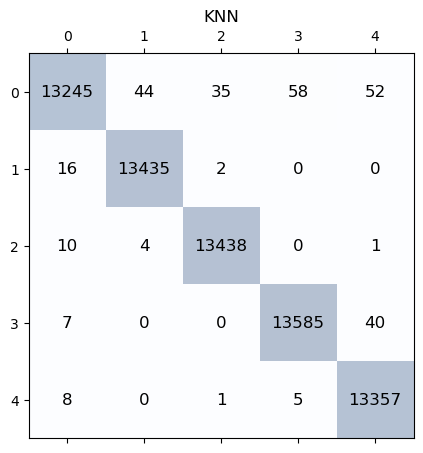

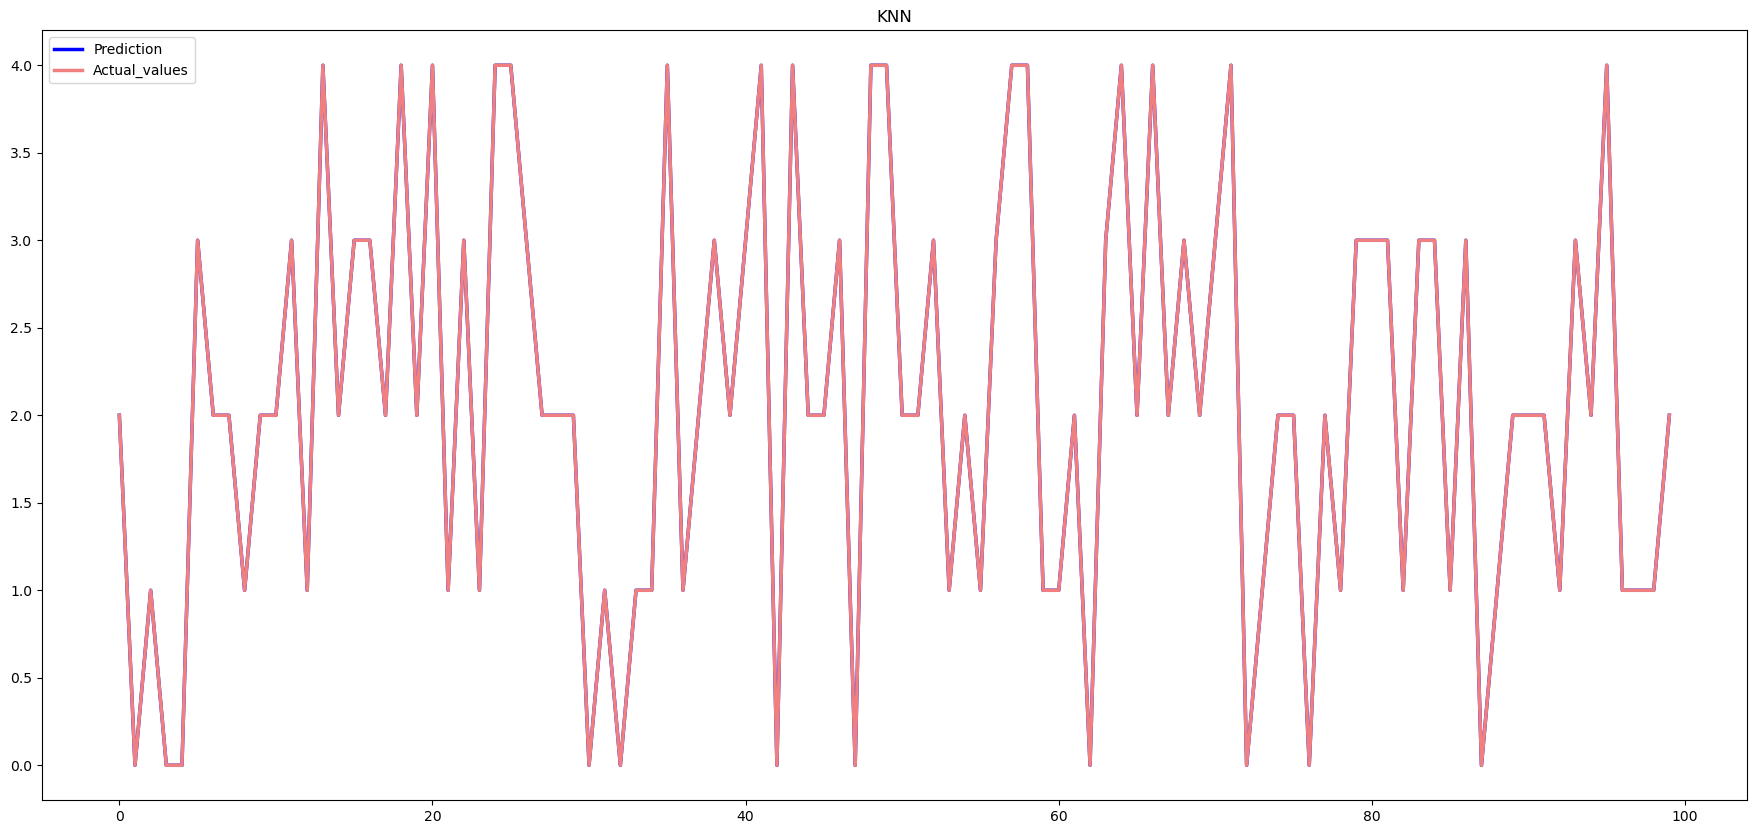

In [11]:
print('\n')
print("KNN MODEL-----------------------------")

knn = KNeighborsClassifier(5)
start_time = time.time()
knn.fit(X_train,Y_train)
end_time = time.time()
print("- Training time : ",end_time-start_time)
start_time = time.time()
Y_test_pred = knn.predict(X_test) 
end_time = time.time()
print("- Testing time : ",end_time-start_time)
print('----------------------------------')
Y_train_pred = knn.predict(X_train)
Y_train_probs = knn.predict_proba(X_train)
Y_test_probs = knn.predict_proba(X_test)

ac=accuracy_score(Y_test, Y_test_pred)*100 

knn_train_accuracy = accuracy_score(Y_train,Y_train_pred)
knn_train_mcc = matthews_corrcoef(Y_train,Y_train_pred)
knn_train_f1 = f1_score(Y_train,Y_train_pred,average = 'weighted')
knn_train_precision = precision_score(Y_train, Y_train_pred,average='weighted')
knn_train_recall = recall_score(Y_train, Y_train_pred, average='weighted')
knn_train_ckscore = cohen_kappa_score(Y_train, Y_train_pred)
knn_train_logloss = log_loss(Y_train, Y_train_probs)
#-----------------------------------------------------------------------
knn_test_mcc = matthews_corrcoef(Y_test,Y_test_pred)
knn_test_f1 = f1_score(Y_test,Y_test_pred,average = 'weighted')
knn_test_precision = precision_score(Y_test, Y_test_pred,average='weighted')
knn_test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
knn_test_ckscore = cohen_kappa_score(Y_test, Y_test_pred)
knn_test_logloss = log_loss(Y_test, Y_test_probs)

print('- Train Accuracy : %s' % knn_train_accuracy)
print('- Train MCC : %s' % knn_train_mcc)
print('- Train F1 score : %s' % knn_train_f1)
print('- Train Precision : %s' % knn_train_precision)
print('- Train Recall : %s' % knn_train_recall)
print('- Train Cohens Kappa Score : %s' % knn_train_ckscore)
print('- Train Log Loss : %s' % knn_train_logloss)
print('----------------------------------')
print('- Test Accuracy : %s' % ac)
print('- Test MCC : %s' % knn_test_mcc)
print('- Test F1 score : %s' % knn_test_f1)
print('- Test Precision : %s' % knn_test_precision)
print('- Test Recall : %s' % knn_test_recall)
print('- Test Cohens Kappa Score : %s' % knn_test_ckscore)
print('- Test Log Loss : %s' % knn_test_logloss)
print('----------------------------------')
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test, Y_test_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test, Y_test_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
print('----------------------------------')
matrix(Y_test, Y_test_pred, "KNN")
plot(Y_test, Y_test_pred, "KNN")



(('GAUSSIAN NB', GaussianNB()), ('DT', DecisionTreeClassifier()))
- Training time :  60.92832946777344
- Testing time :  0.42591309547424316
----------------------------------
- Train Accuracy : 0.9997512733320464
- Train MCC : 0.999689100973901
- Train F1 score : 0.9997512533275549
- Train Precision : 0.9997512713373955
- Train Recall : 0.9997512733320464
- Train Cohens Kappa Score : 0.9996890914676467
- Train Log Loss : 0.004504873128952947
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9964361552054408
- Test MCC : 0.9955455589700987
- Test F1 score : 0.9964351673767724
- Test Precision : 0.996435851794789
- Test Recall : 0.9964361552054408
- Test Cohens Kappa Score : 0.9955451410501656
- Test Log Loss : 0.022982268473506994
----------------------------------
Mean Absolute Error -  0.006845551876215791
Mean Squared Error -  0.01709160566057348
Root Mean Squared Error -  0.13073486780722837
----------------------------------


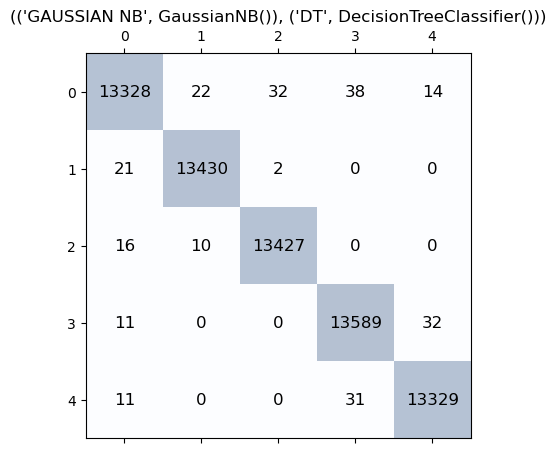

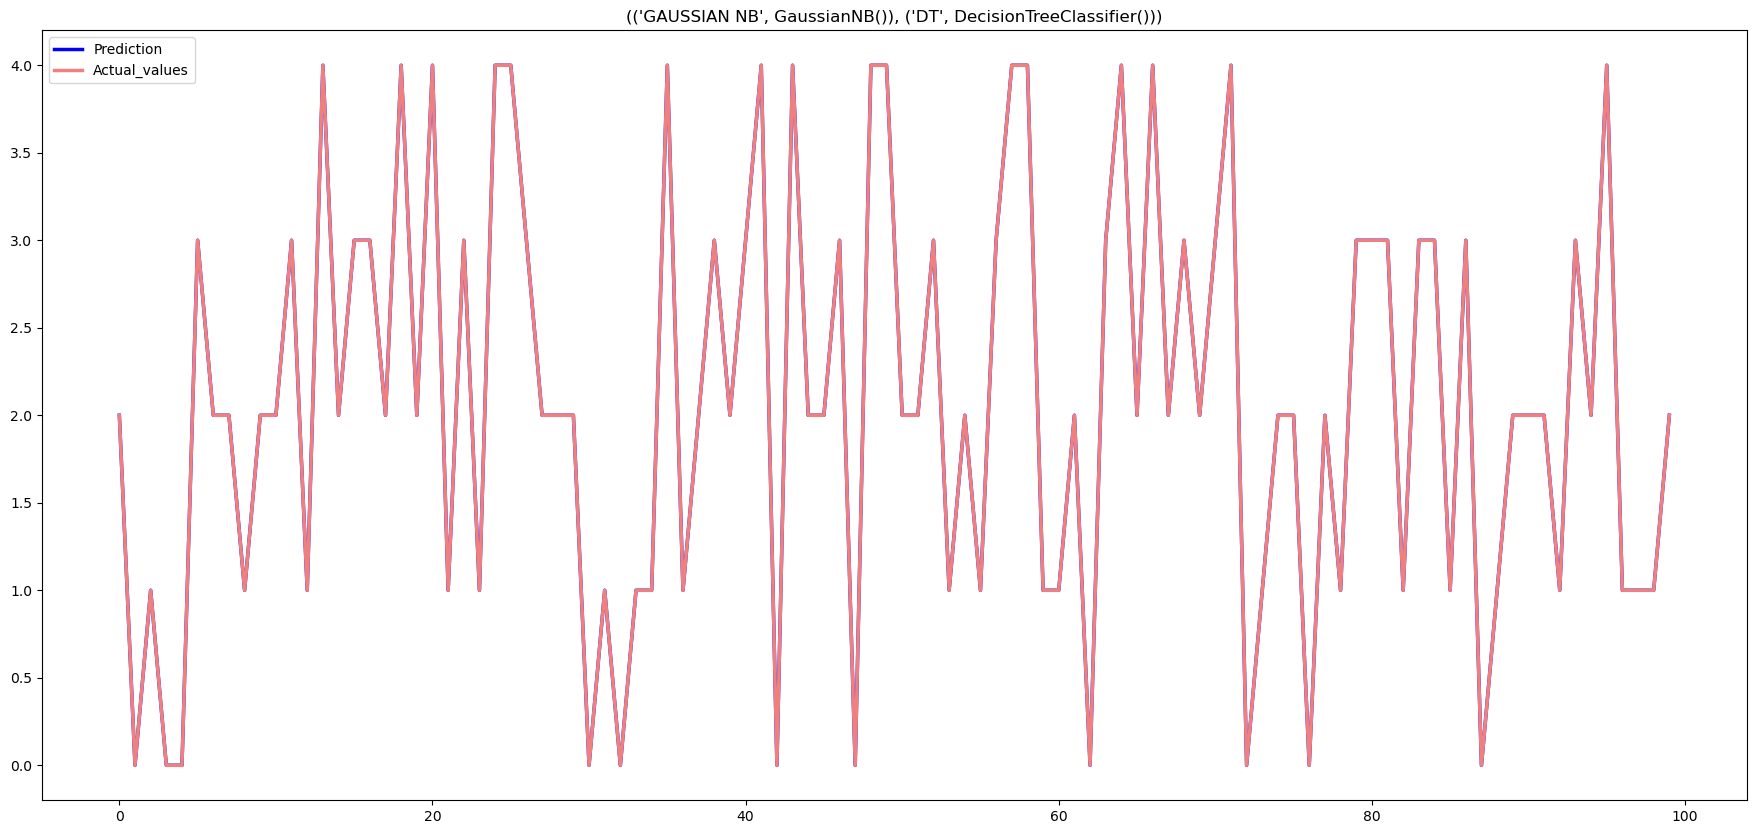



(('GAUSSIAN NB', GaussianNB()), ('RF', RandomForestClassifier(n_estimators=30)))
- Training time :  177.69738101959229
- Testing time :  1.2044970989227295
----------------------------------
- Train Accuracy : 0.9992166966128625
- Train MCC : 0.9990212336679245
- Train F1 score : 0.9992166552961762
- Train Precision : 0.9992180710173428
- Train Recall : 0.9992166966128625
- Train Cohens Kappa Score : 0.9990208694869933
- Train Log Loss : 0.0028588789354120347
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9979953373030604
- Test MCC : 0.9974944008121395
- Test F1 score : 0.9979950959129329
- Test Precision : 0.9979958571480229
- Test Recall : 0.9979953373030604
- Test Cohens Kappa Score : 0.9974941500648046
- Test Log Loss : 0.009351513714985321
----------------------------------
Mean Absolute Error -  0.0038311331541511368
Mean Squared Error -  0.009711477065173812
Root Mean Squared Error -  0.09854682676359403
---------------------------------

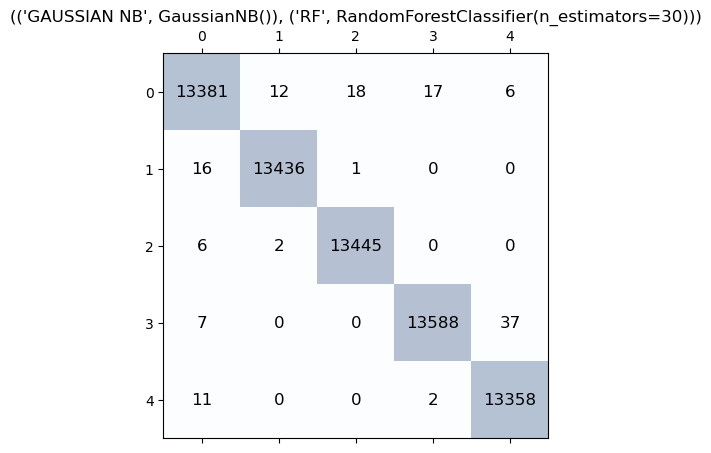

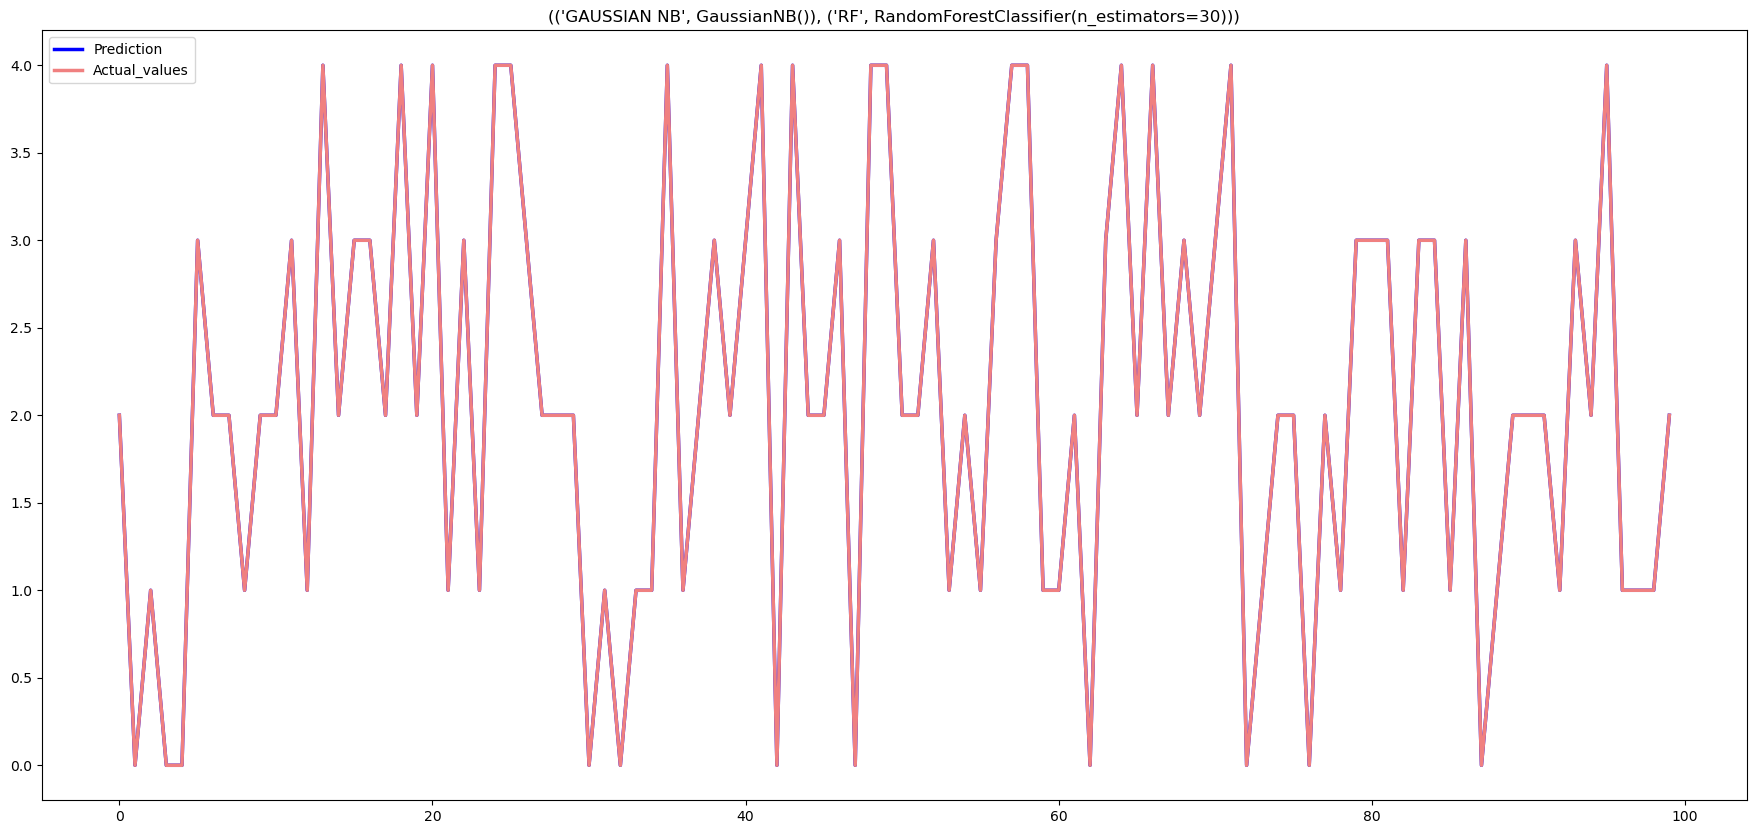



(('GAUSSIAN NB', GaussianNB()), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  787.4062597751617
- Testing time :  0.29821181297302246
----------------------------------
- Train Accuracy : 0.9525080557741711
- Train MCC : 0.9406592280819901
- Train F1 score : 0.9526194604190296
- Train Precision : 0.952824701586732
- Train Recall : 0.9525080557741711
- Train Cohens Kappa Score : 0.9406353015382714
- Train Log Loss : 0.14021046161950068
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9515911082072376
- Test MCC : 0.939517585220151
- Test F1 score : 0.9516851059341654
- Test Precision : 0.9518979545252252
- Test Recall : 0.9515911082072376
- Test Cohens Kappa Score : 0.9394869610482572
- Test Log Loss : 0.14314741390833785
----------------------------------
Mean Absolute Error -  0.07892431284617554
Mean Squared Error -  0.1729504180092957
Root Mean Squared Error -  0.4158730792072212
----------------------------------


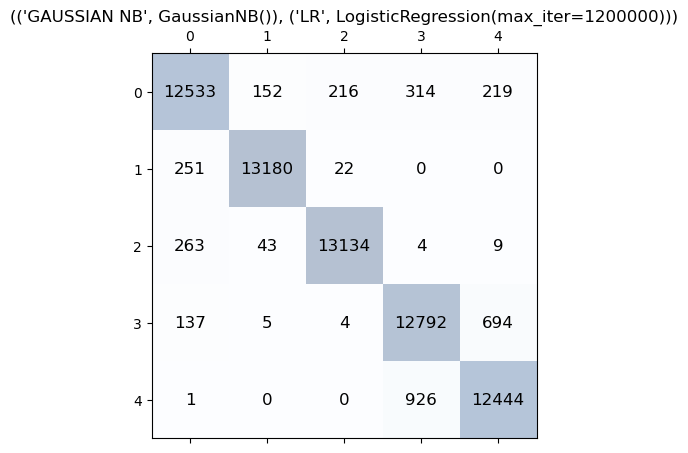

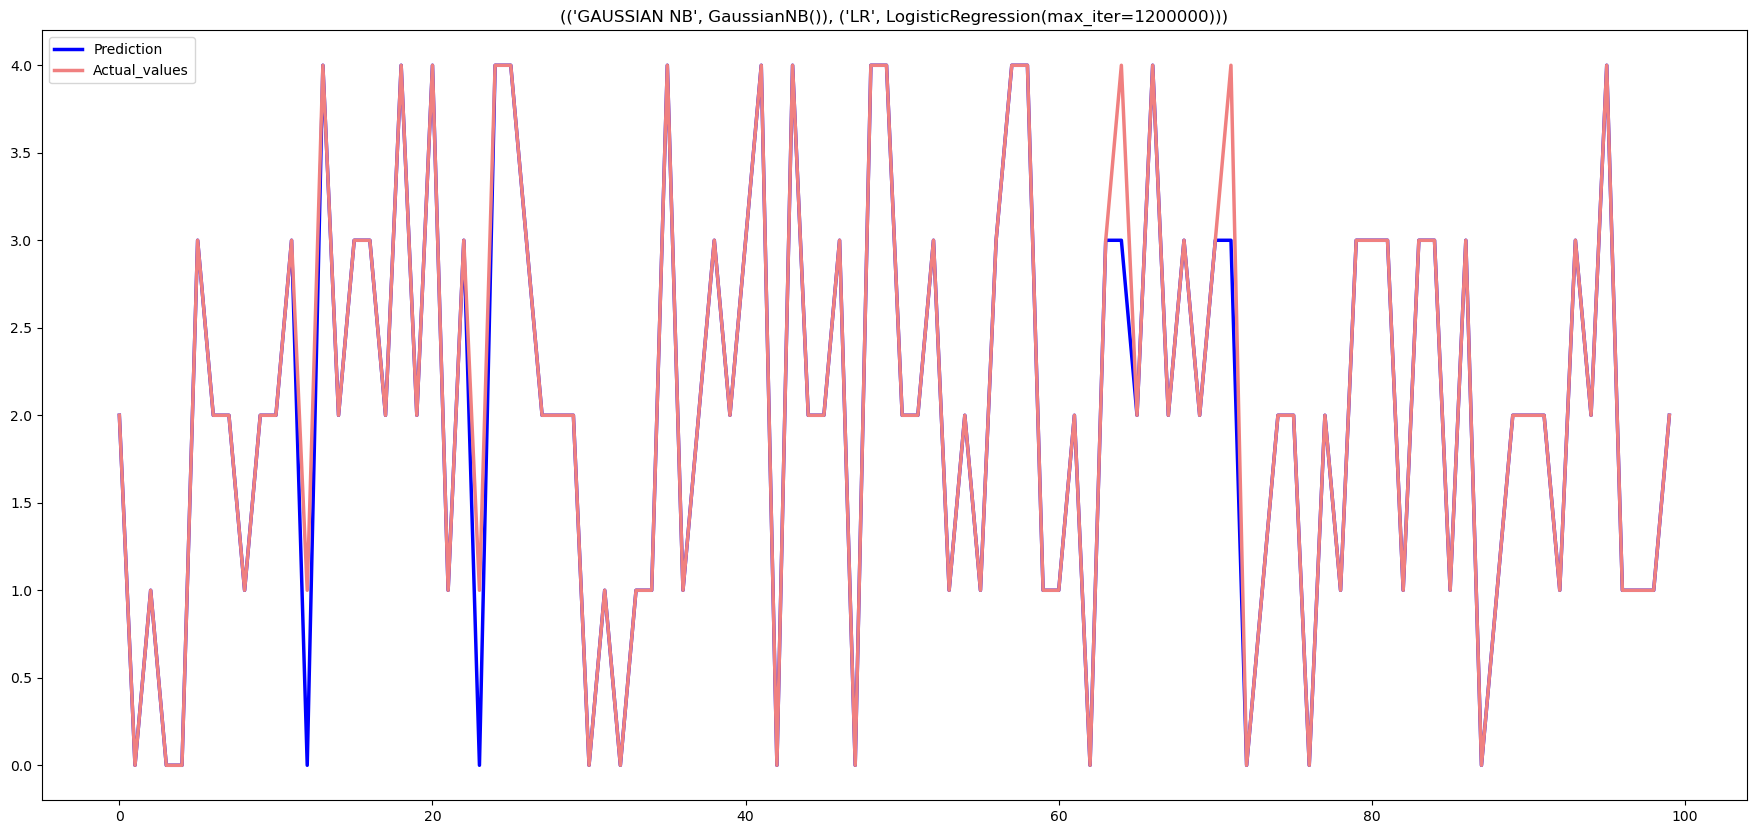



(('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier(n_estimators=30)))
- Training time :  128.05758810043335
- Testing time :  0.6026241779327393
----------------------------------
- Train Accuracy : 0.9991647238762752
- Train MCC : 0.9989562604548815
- Train F1 score : 0.9991646767157575
- Train Precision : 0.9991660574787914
- Train Recall : 0.9991647238762752
- Train Cohens Kappa Score : 0.9989559035081909
- Train Log Loss : 0.0026334671885106333
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9980398853629925
- Test MCC : 0.997550031805043
- Test F1 score : 0.998039454122617
- Test Precision : 0.9980398159261743
- Test Recall : 0.9980398853629925
- Test Cohens Kappa Score : 0.9975498338360147
- Test Log Loss : 0.009498312657440144
----------------------------------
Mean Absolute Error -  0.0036232422078018504
Mean Squared Error -  0.00885021457315534
Root Mean Squared Error -  0.09407557904767495
---------------------------------

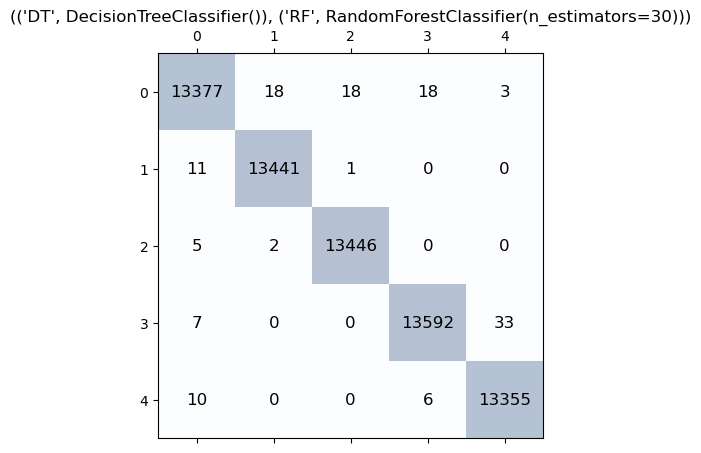

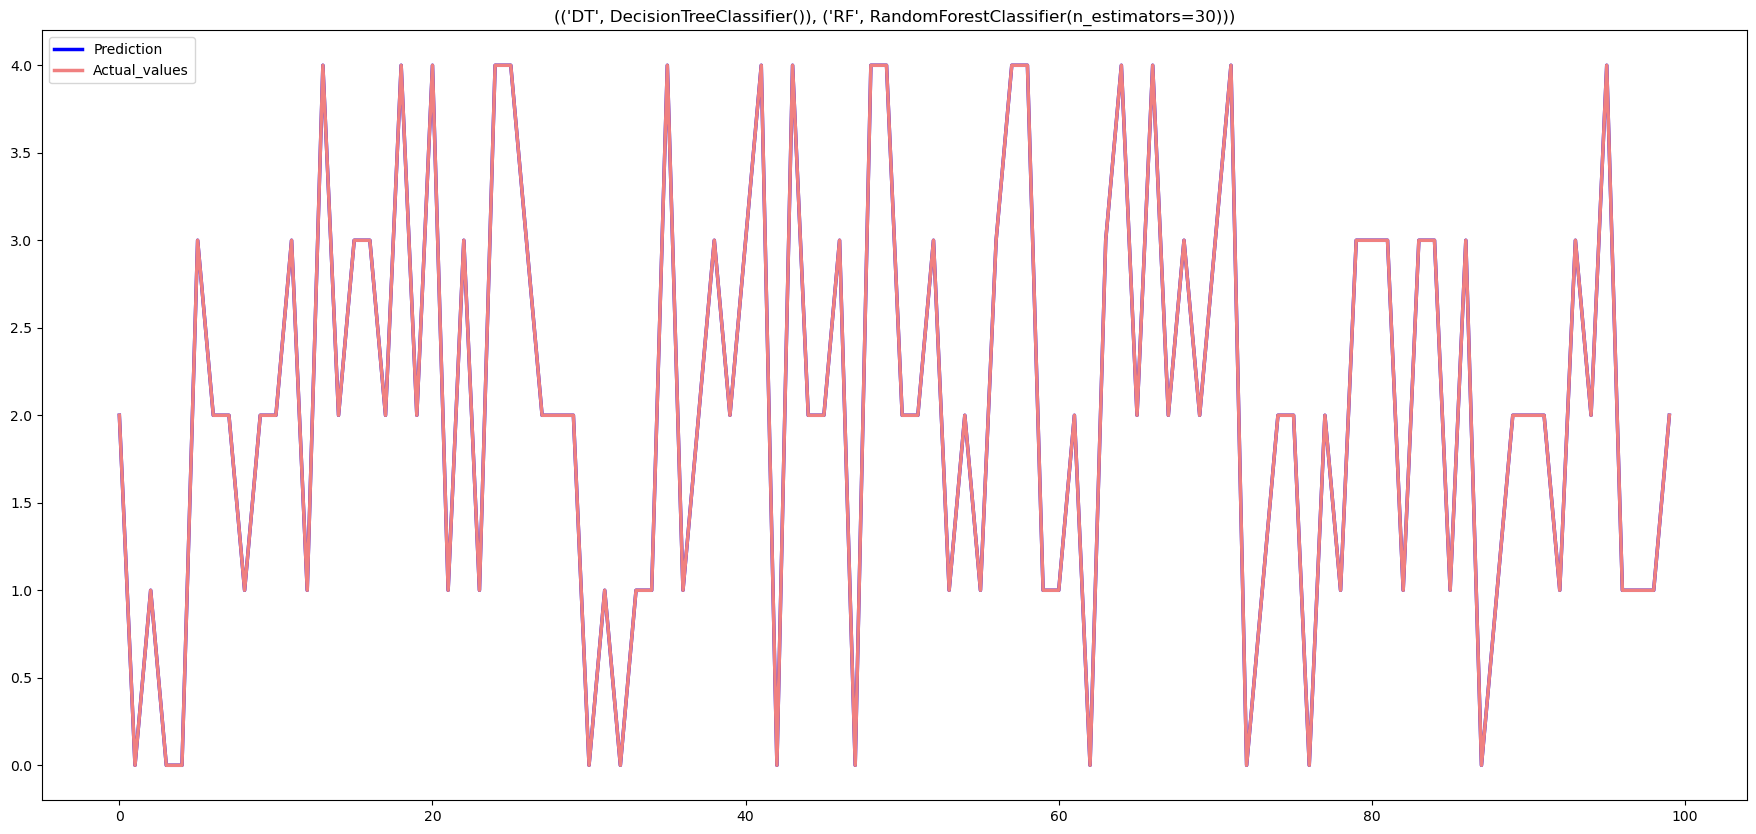



(('DT', DecisionTreeClassifier()), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  1012.8992445468903
- Testing time :  0.17148566246032715
----------------------------------
- Train Accuracy : 0.9997252869637527
- Train MCC : 0.9996566197641537
- Train F1 score : 0.9997252648896272
- Train Precision : 0.9997252879179845
- Train Recall : 0.9997252869637527
- Train Cohens Kappa Score : 0.999656608484454
- Train Log Loss : 0.004839485962714951
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9964955526186835
- Test MCC : 0.9956199152083831
- Test F1 score : 0.9964944123416812
- Test Precision : 0.9964953808616378
- Test Recall : 0.9964955526186835
- Test Cohens Kappa Score : 0.9956193885846228
- Test Log Loss : 0.019520153095543585
----------------------------------
Mean Absolute Error -  0.006904949289458444
Mean Squared Error -  0.017507387553272056
Root Mean Squared Error -  0.13231548493382042
----------------------------------


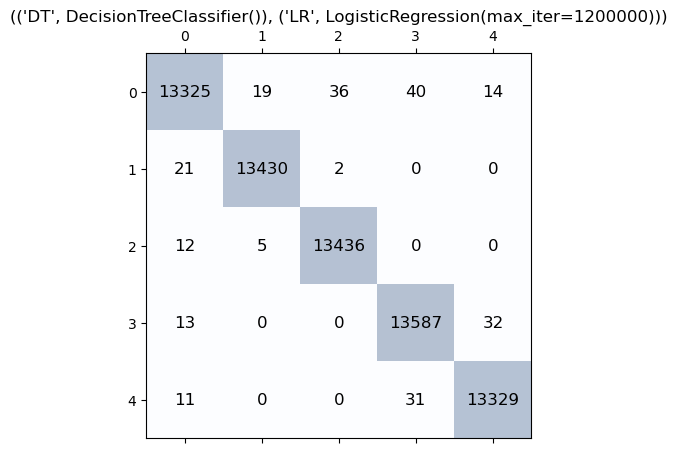

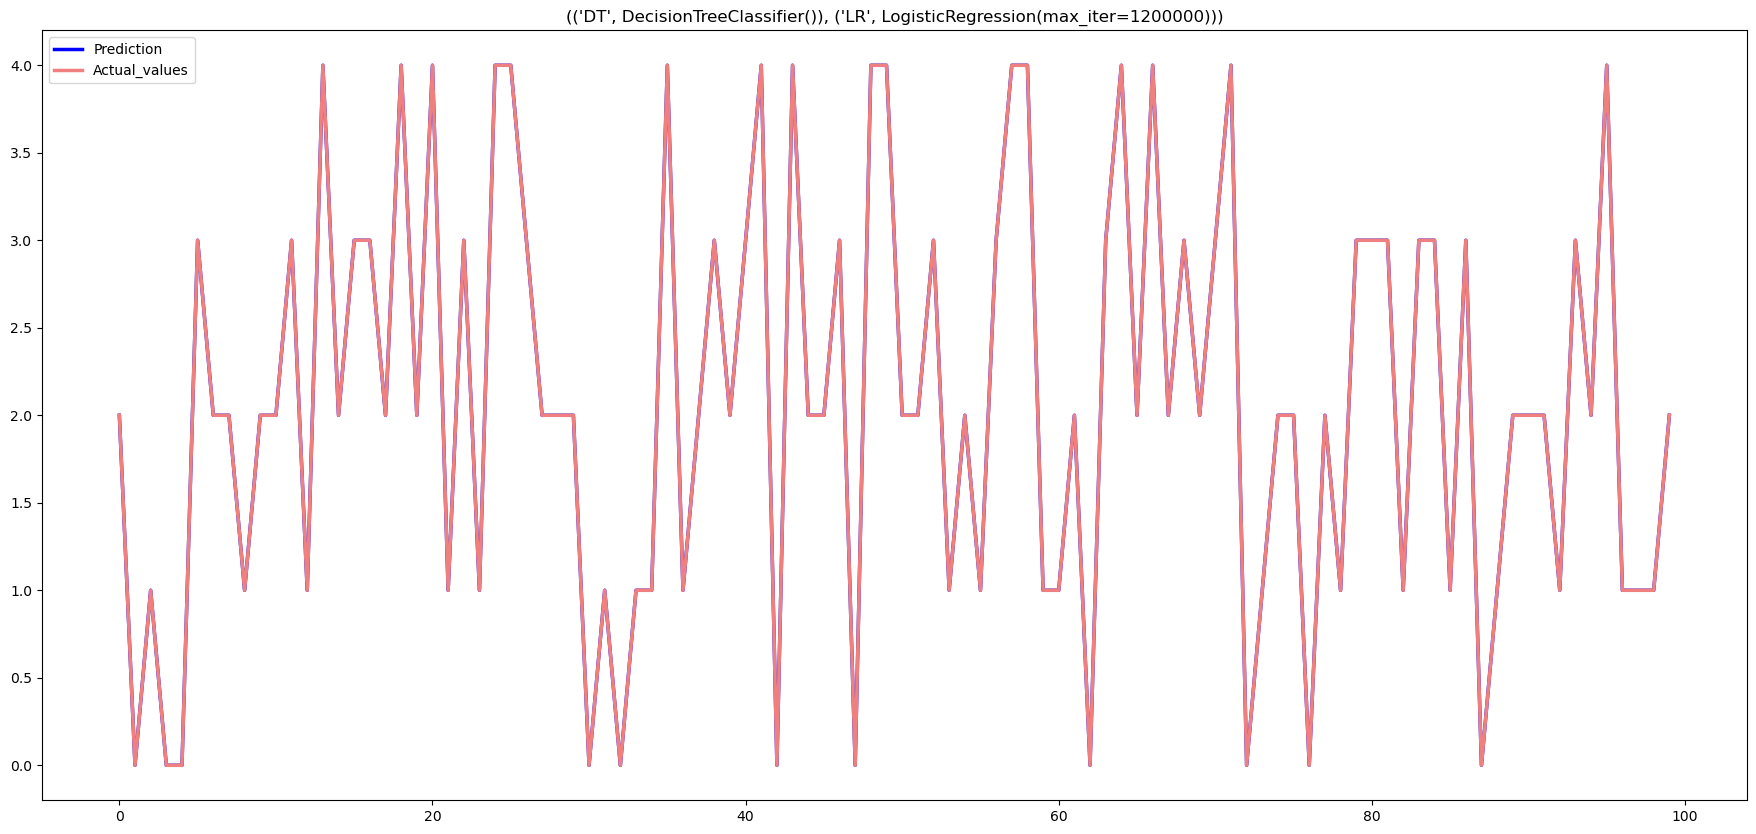



(('RF', RandomForestClassifier(n_estimators=30)), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  616.8374254703522
- Testing time :  0.5880074501037598
----------------------------------
- Train Accuracy : 0.9992315459661731
- Train MCC : 0.9990397443768445
- Train F1 score : 0.9992315166220549
- Train Precision : 0.9992327398055855
- Train Recall : 0.9992315459661731
- Train Cohens Kappa Score : 0.999039431252241
- Train Log Loss : 0.002771340834532248
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9980547347163031
- Test MCC : 0.9975684700262494
- Test F1 score : 0.9980547154223111
- Test Precision : 0.9980549943446847
- Test Recall : 0.9980547347163031
- Test Cohens Kappa Score : 0.997568395511219
- Test Log Loss : 0.008833424196866705
----------------------------------
Mean Absolute Error -  0.0039053799207044533
Mean Squared Error -  0.010409396670774987
Root Mean Squared Error -  0.10202645083886329
----------------------

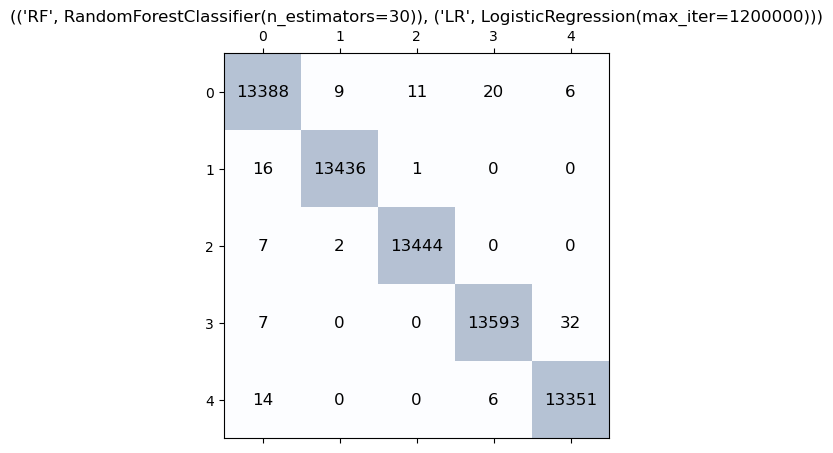

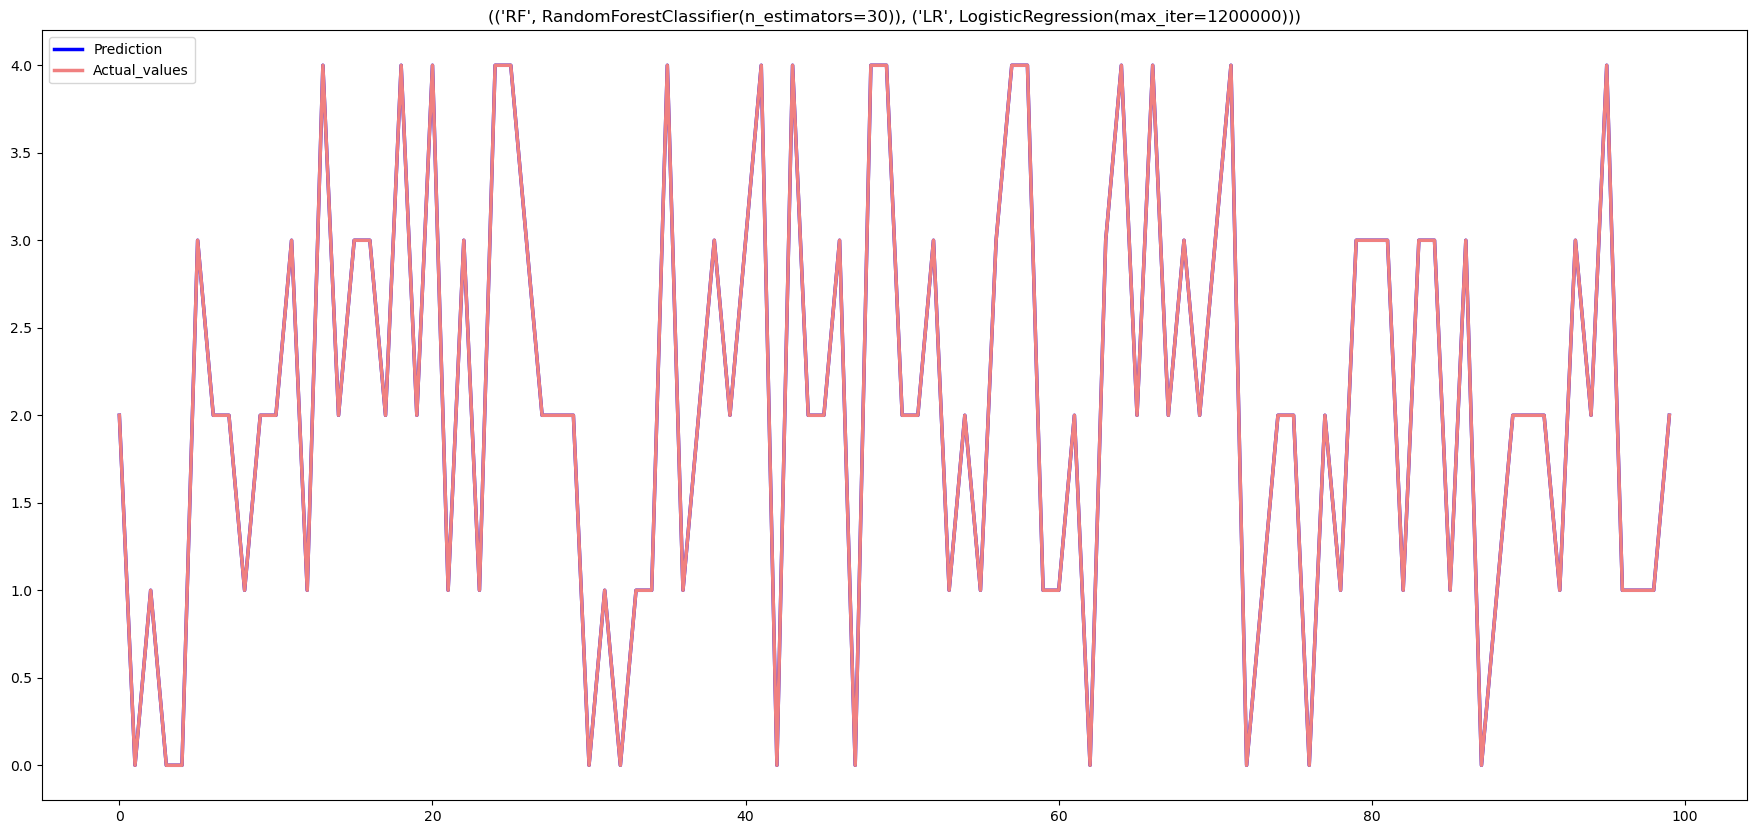



(('GAUSSIAN NB', GaussianNB()), ('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier(n_estimators=30)))
- Training time :  138.7348027229309
- Testing time :  0.6869466304779053
----------------------------------
- Train Accuracy : 0.9992946557177435
- Train MCC : 0.9991185419869383
- Train F1 score : 0.9992946303336167
- Train Precision : 0.9992954983672363
- Train Recall : 0.9992946557177435
- Train Cohens Kappa Score : 0.9991183186310308
- Train Log Loss : 0.002464953564880737
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9980398853629925
- Test MCC : 0.9975499391468422
- Test F1 score : 0.9980397880089362
- Test Precision : 0.9980401122974761
- Test Recall : 0.9980398853629925
- Test Cohens Kappa Score : 0.9975498338380407
- Test Log Loss : 0.008953222083656762
----------------------------------
Mean Absolute Error -  0.003697488974355167
Mean Squared Error -  0.009310544525785901
Root Mean Squared Error -  0.09649116294141087
--

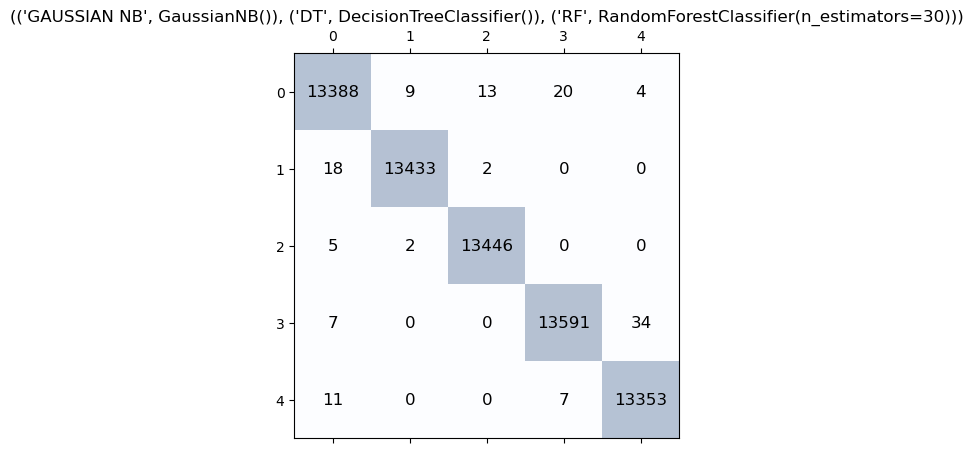

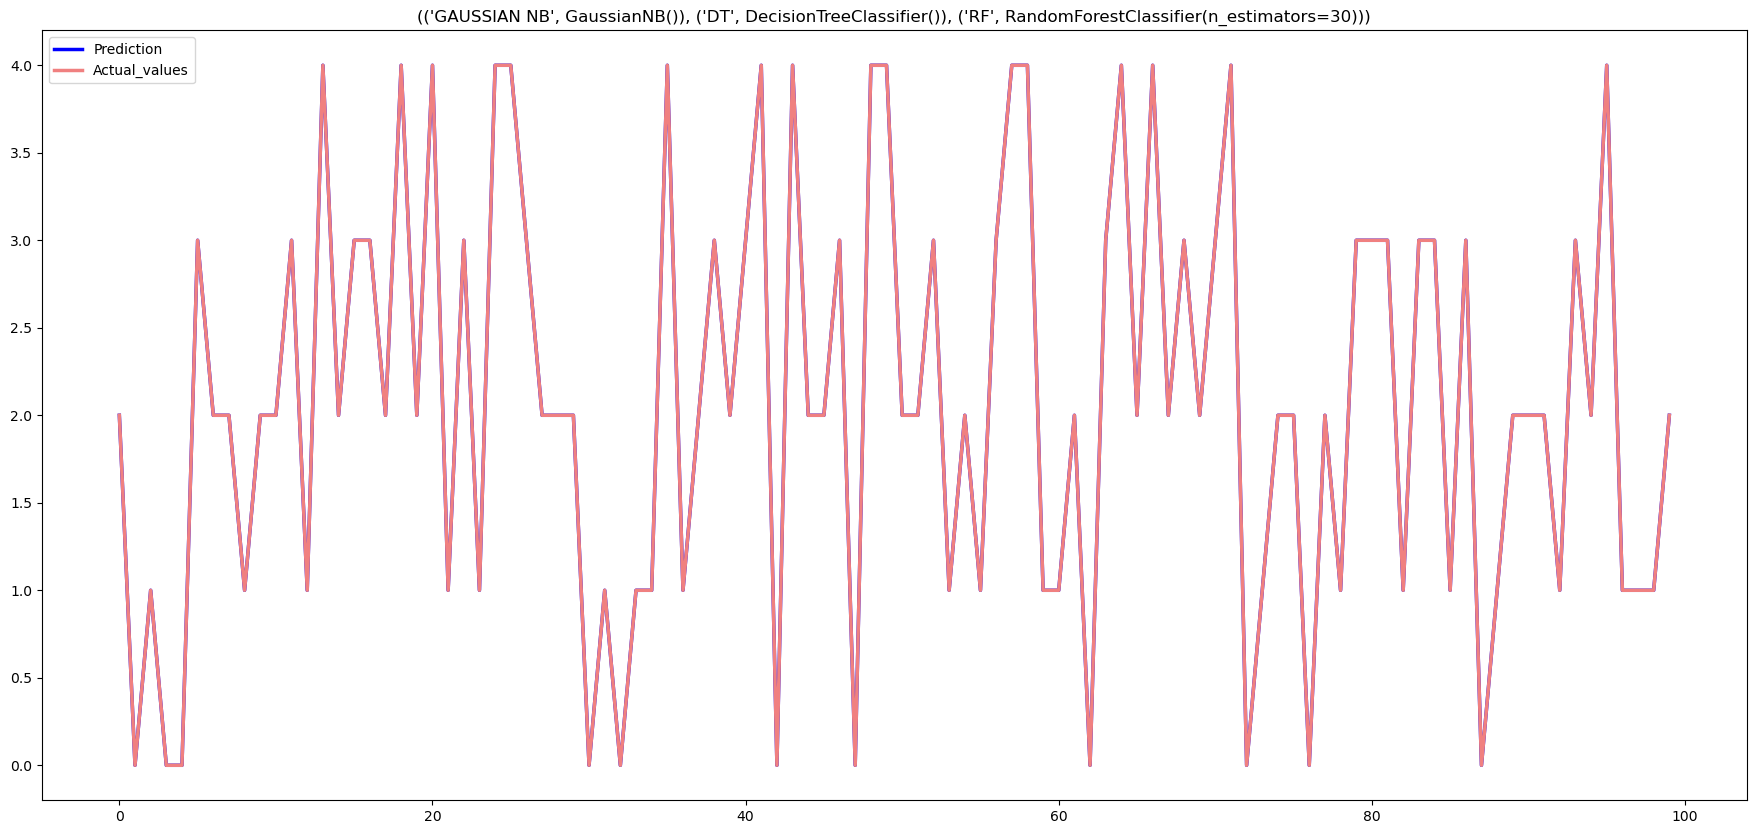



(('GAUSSIAN NB', GaussianNB()), ('DT', DecisionTreeClassifier()), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  550.3203978538513
- Testing time :  0.3522624969482422
----------------------------------
- Train Accuracy : 0.9997289993020804
- Train MCC : 0.9996612602244229
- Train F1 score : 0.9997289811196465
- Train Precision : 0.9997290081751595
- Train Recall : 0.9997289993020804
- Train Cohens Kappa Score : 0.9996612489102289
- Train Log Loss : 0.004481671713383076
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9963619084388875
- Test MCC : 0.9954527141964772
- Test F1 score : 0.9963609595924597
- Test Precision : 0.9963615403702797
- Test Recall : 0.9963619084388875
- Test Cohens Kappa Score : 0.9954523319850905
- Test Log Loss : 0.01954223888326604
----------------------------------
Mean Absolute Error -  0.007008894762633088
Mean Squared Error -  0.017551935613204044
Root Mean Squared Error -  0.13248371829475517
------

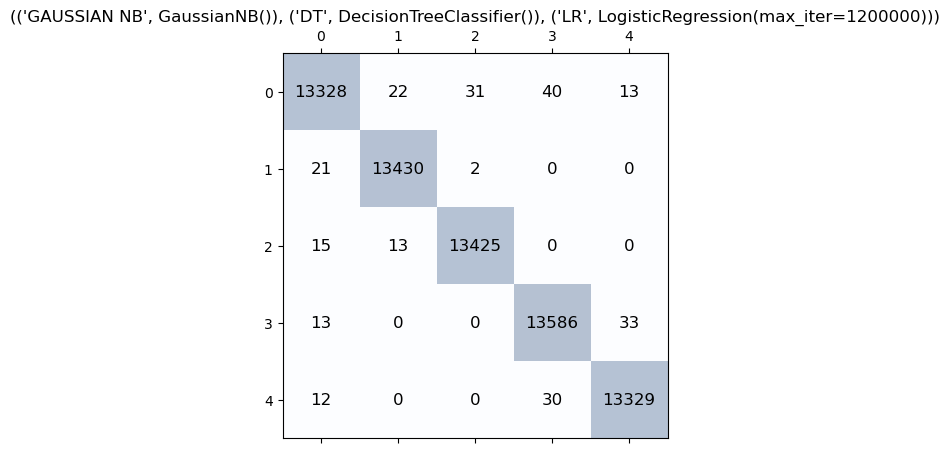

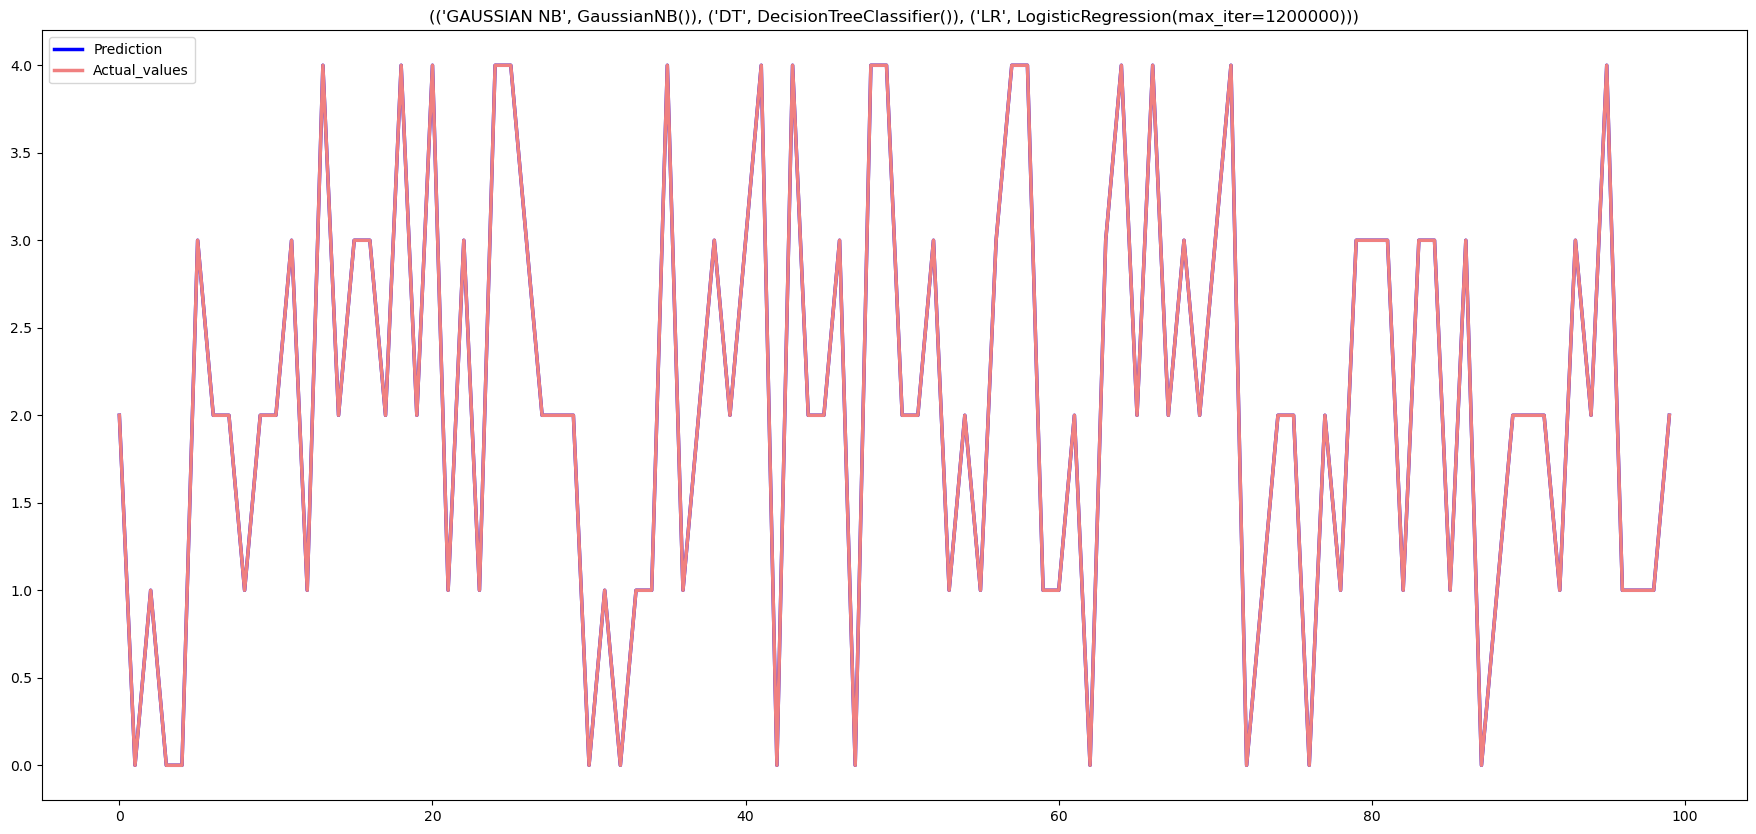



(('GAUSSIAN NB', GaussianNB()), ('RF', RandomForestClassifier(n_estimators=30)), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  627.3614709377289
- Testing time :  0.7752580642700195
----------------------------------
- Train Accuracy : 0.9992872310410882
- Train MCC : 0.9991092745952874
- Train F1 score : 0.9992872069994514
- Train Precision : 0.9992881302580026
- Train Recall : 0.9992872310410882
- Train Cohens Kappa Score : 0.9991090377648305
- Train Log Loss : 0.0026489843824378926
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9980547347163031
- Test MCC : 0.9975684863469259
- Test F1 score : 0.9980546161505597
- Test Precision : 0.9980548625027037
- Test Recall : 0.9980547347163031
- Test Cohens Kappa Score : 0.997568395334279
- Test Log Loss : 0.008505060420098203
----------------------------------
Mean Absolute Error -  0.0036083928544911868
Mean Squared Error -  0.009013557459572635
Root Mean Squared Error -  0.0949397

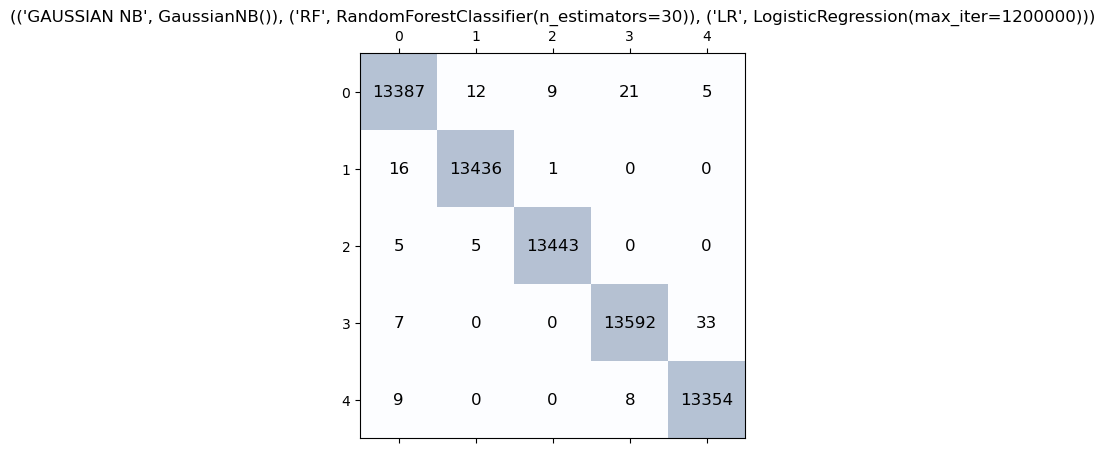

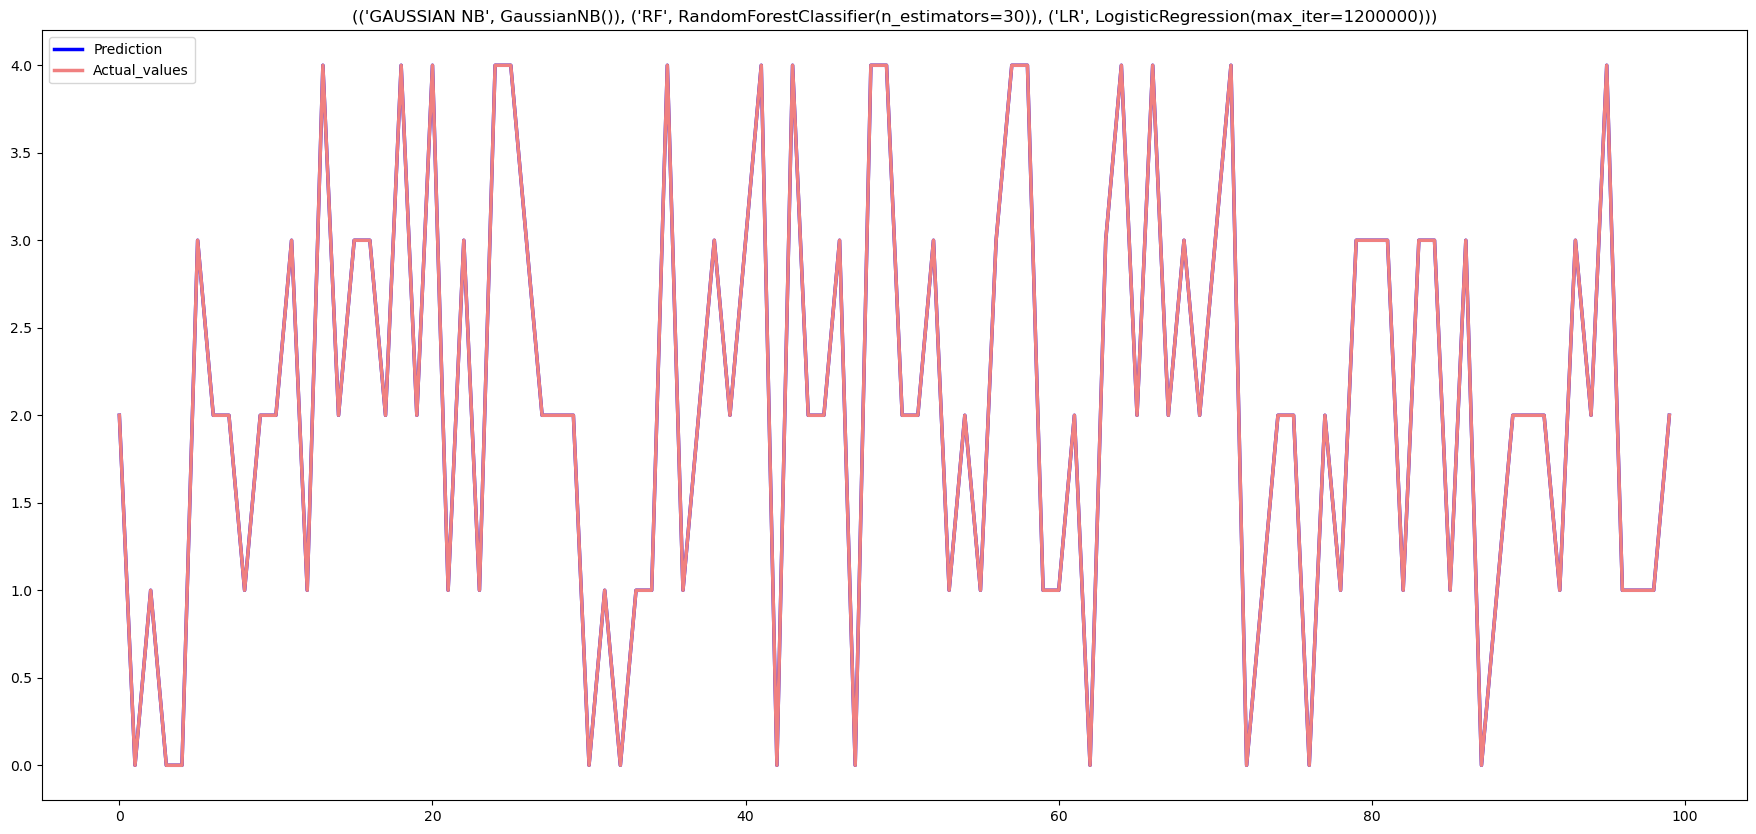



(('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier(n_estimators=30)), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  772.1171827316284
- Testing time :  0.9242167472839355
----------------------------------
- Train Accuracy : 0.9991053264630325
- Train MCC : 0.998882078812105
- Train F1 score : 0.9991052817526621
- Train Precision : 0.9991069257541614
- Train Recall : 0.9991053264630325
- Train Cohens Kappa Score : 0.9988816566062283
- Train Log Loss : 0.002617986960446954
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9979953373030604
- Test MCC : 0.9974944079250084
- Test F1 score : 0.9979948588966918
- Test Precision : 0.9979954200870705
- Test Recall : 0.9979953373030604
- Test Cohens Kappa Score : 0.9974941486551032
- Test Log Loss : 0.008334370659217681
----------------------------------
Mean Absolute Error -  0.003860831860772463
Mean Squared Error -  0.009770874478416465
Root Mean Squared Error -  0.098847

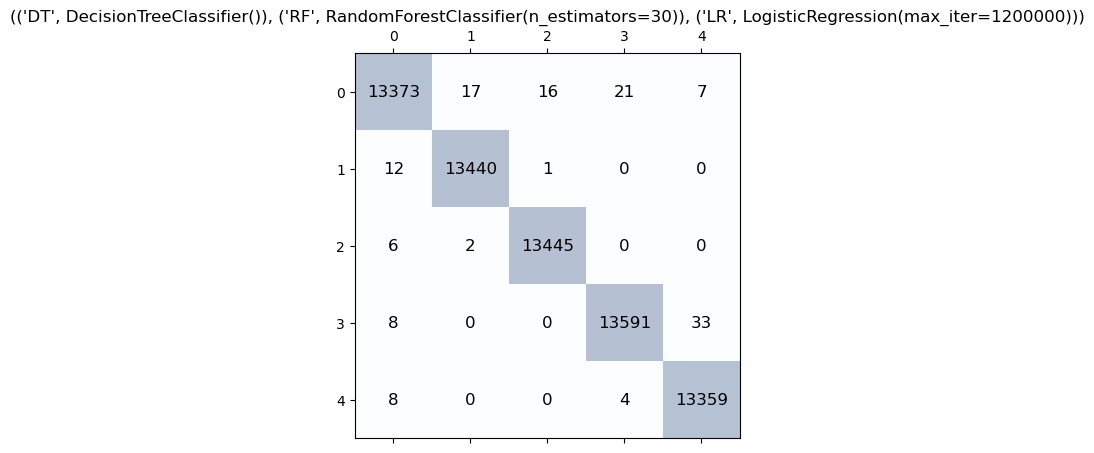

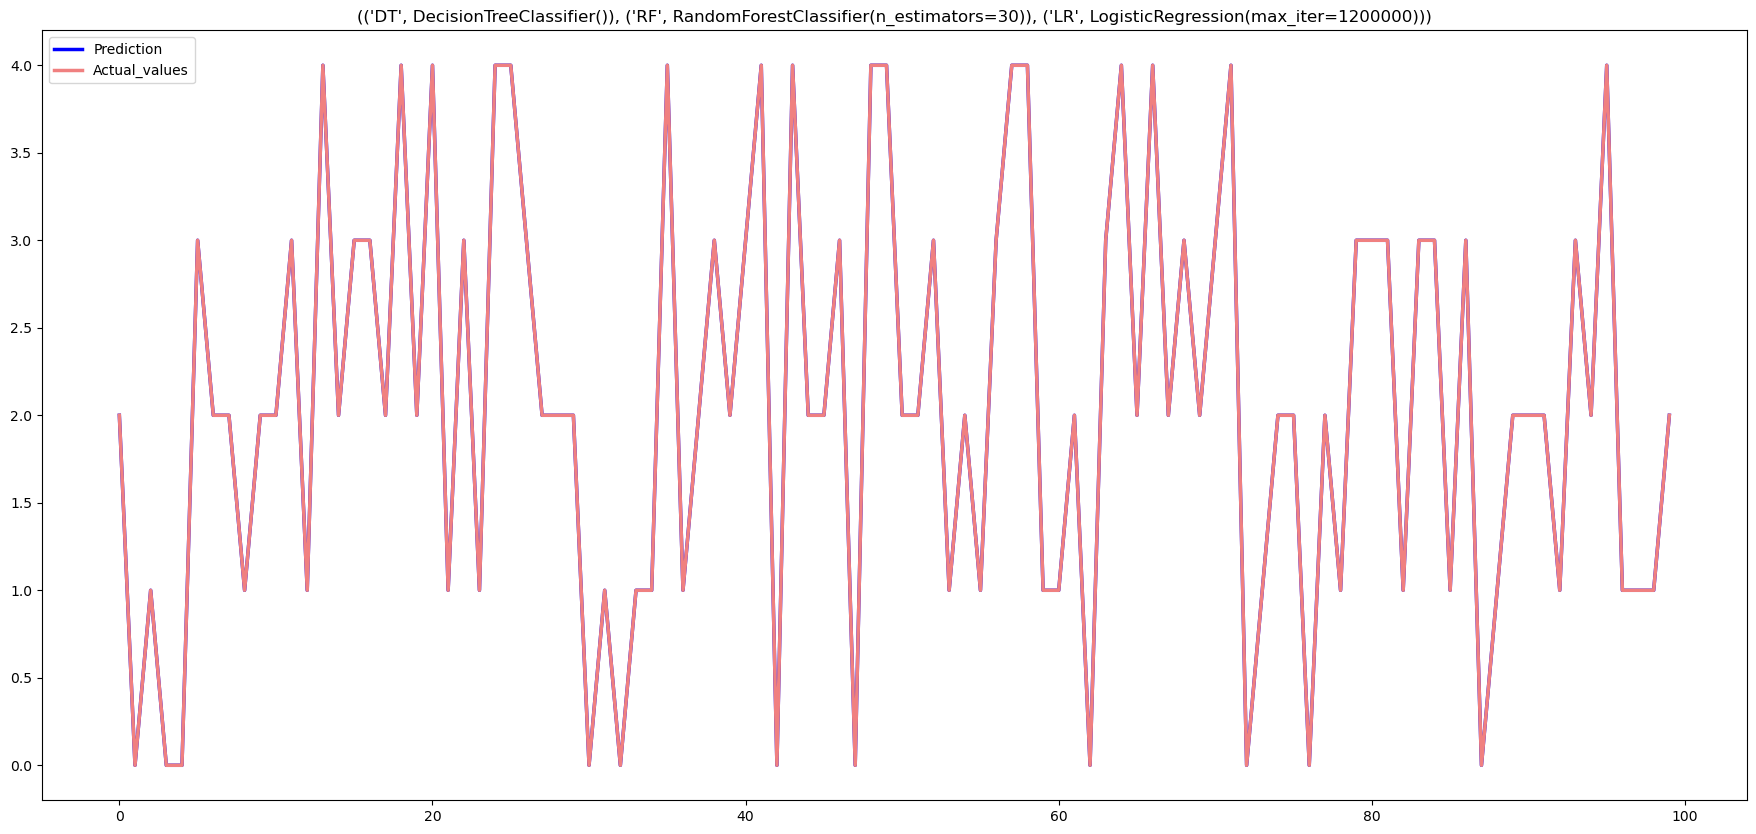



(('GAUSSIAN NB', GaussianNB()), ('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier(n_estimators=30)), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  692.1678864955902
- Testing time :  0.8530151844024658
----------------------------------
- Train Accuracy : 0.9991944225828965
- Train MCC : 0.9989933630881245
- Train F1 score : 0.9991943992568298
- Train Precision : 0.9991957201947366
- Train Recall : 0.9991944225828965
- Train Cohens Kappa Score : 0.9989930269517087
- Train Log Loss : 0.0028419827752327043
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9980398853629925
- Test MCC : 0.9975499465490788
- Test F1 score : 0.9980398441343322
- Test Precision : 0.9980402507963803
- Test Recall : 0.9980398853629925
- Test Cohens Kappa Score : 0.9975498343661592
- Test Log Loss : 0.008204379450470574
----------------------------------
Mean Absolute Error -  0.003860831860772463
Mean Squared Error -  0.010008464131387078
Ro

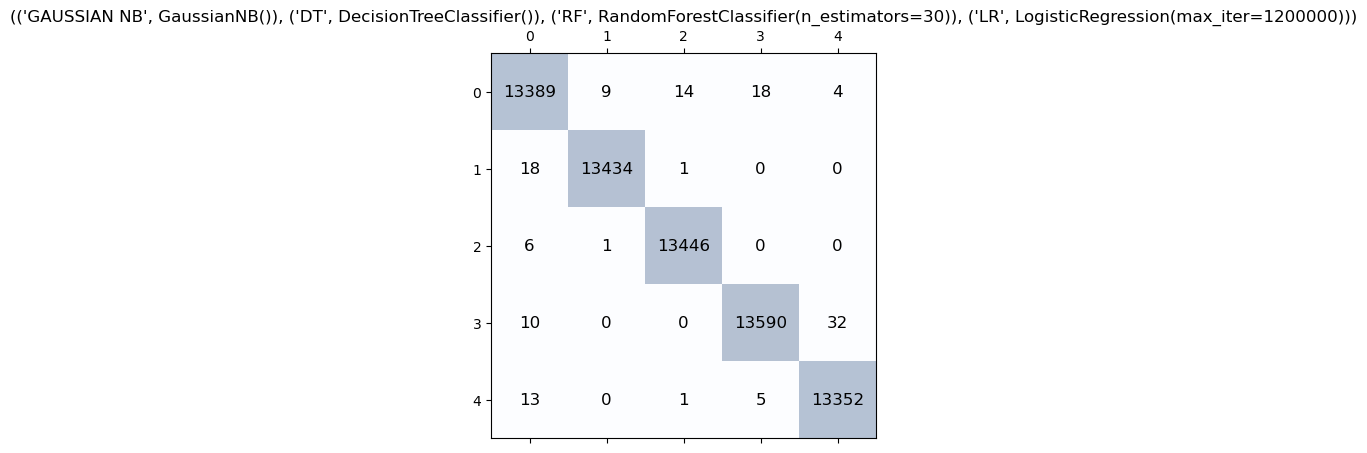

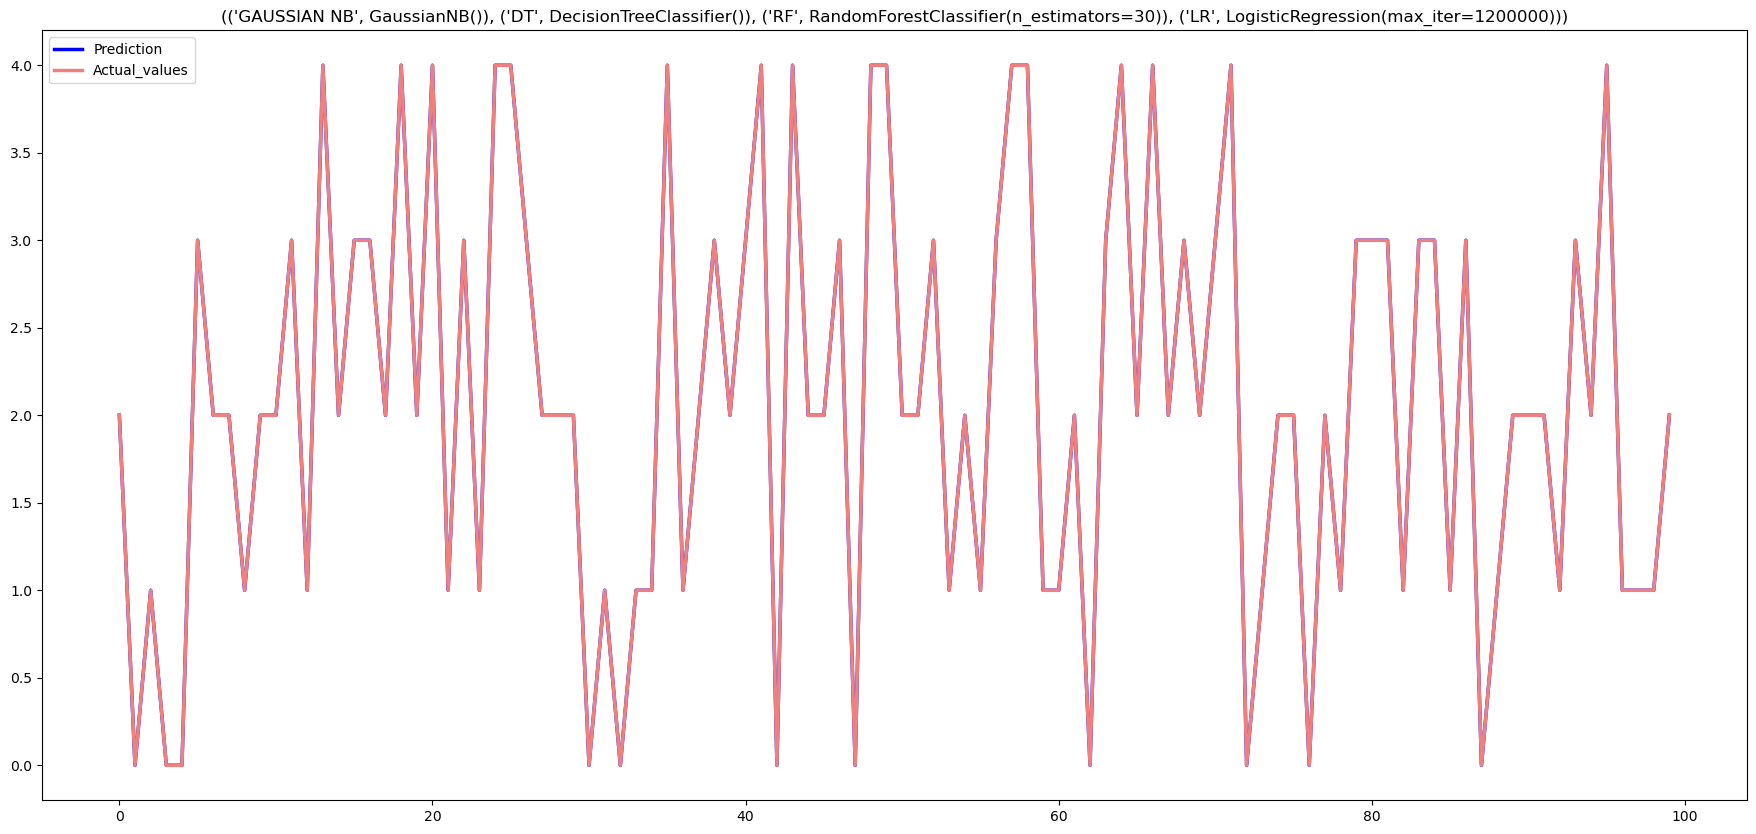

In [31]:
from itertools import combinations,product
algo_list = [
    ('GAUSSIAN NB',nb),
    ('DT',dt),
    ('RF',rf),
    ('LR',lr)
    ]

list_combo = []
for n in range(len(algo_list) + 1):
    list_combo += combinations(algo_list, n)
res = list_combo[5:len(list_combo)]
for i in res:
    print('\n')
    print(i)
    stack_model = StackingClassifier(estimators=list(i), final_estimator=MLPClassifier())
    start_time = time.time()
    stack_model.fit(X_train, Y_train)
    end_time = time.time()
    print("- Training time : ",end_time-start_time)
    start_time = time.time()
    Y_test_predf1 = stack_model.predict(X_test)
    end_time = time.time()
    print("- Testing time : ",end_time-start_time)
    print('----------------------------------')
    Y_train_predf1 = stack_model.predict(X_train)
    Y_train_probsf1 = stack_model.predict_proba(X_train)
    Y_test_probsf1 = stack_model.predict_proba(X_test)

    # Training set model performance
    stack_model_train_accuracy = accuracy_score(Y_train, Y_train_predf1)
    stack_model_train_mcc = matthews_corrcoef(Y_train, Y_train_predf1)
    stack_model_train_f1 = f1_score(Y_train, Y_train_predf1, average='weighted') 
    stack_model_train_precision = precision_score(Y_train, Y_train_predf1,average='weighted')
    stack_model_train_recall = recall_score(Y_train, Y_train_predf1, average='weighted')
    stack_model_train_ckscore = cohen_kappa_score(Y_train, Y_train_predf1)
    stack_model_train_logloss = log_loss(Y_train, Y_train_probsf1)

    # Test set model performance
    stack_model_test_accuracy = accuracy_score(Y_test, Y_test_predf1) 
    stack_model_test_mcc = matthews_corrcoef(Y_test, Y_test_predf1)
    stack_model_test_f1 = f1_score(Y_test, Y_test_predf1, average='weighted')
    stack_model_test_precision = precision_score(Y_test, Y_test_predf1,average='weighted')
    stack_model_test_recall = recall_score(Y_test, Y_test_predf1, average='weighted')
    stack_model_test_ckscore = cohen_kappa_score(Y_test, Y_test_predf1)
    stack_model_test_logloss = log_loss(Y_test, Y_test_probsf1)

    print('- Train Accuracy : %s' % stack_model_train_accuracy)
    print('- Train MCC : %s' % stack_model_train_mcc)
    print('- Train F1 score : %s' % stack_model_train_f1)
    print('- Train Precision : %s' % stack_model_train_precision)
    print('- Train Recall : %s' % stack_model_train_recall)
    print('- Train Cohens Kappa Score : %s' % stack_model_train_ckscore)
    print('- Train Log Loss : %s' % stack_model_train_logloss)
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Test Accuracy : %s' % stack_model_test_accuracy)
    print('- Test MCC : %s' % stack_model_test_mcc)
    print('- Test F1 score : %s' % stack_model_test_f1)
    print('- Test Precision : %s' % stack_model_test_precision)
    print('- Test Recall : %s' % stack_model_test_recall)
    print('- Test Cohens Kappa Score : %s' % stack_model_test_ckscore)
    print('- Test Log Loss : %s' % stack_model_test_logloss)
    print('----------------------------------')
    print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test, Y_test_predf1))
    print("Mean Squared Error - " , metrics.mean_squared_error(Y_test, Y_test_predf1))
    print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test, Y_test_predf1)))
    print('----------------------------------')
    matrix(Y_test, Y_test_predf1, i)
    plot(Y_test, Y_test_predf1, i)



(('KNN', KNeighborsClassifier()), ('GAUSSIAN NB', GaussianNB()))
- Training time :  187.08020067214966
- Testing time :  34.54489231109619
----------------------------------
- Train Accuracy : 0.9974570482455489
- Train MCC : 0.9968221164204821
- Train F1 score : 0.9974571150224772
- Train Precision : 0.9974604181369536
- Train Recall : 0.9974570482455489
- Train Cohens Kappa Score : 0.9968213055009646
- Train Log Loss : 0.007558002888225919
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9966291967984794
- Test MCC : 0.9957873543250657
- Test F1 score : 0.996627897626578
- Test Precision : 0.9966301837963636
- Test Recall : 0.9966291967984794
- Test Cohens Kappa Score : 0.9957864606491226
- Test Log Loss : 0.014443789056259858
----------------------------------
Mean Absolute Error -  0.007320731182157017
Mean Squared Error -  0.02044755950878339
Root Mean Squared Error -  0.14299496322872143
----------------------------------


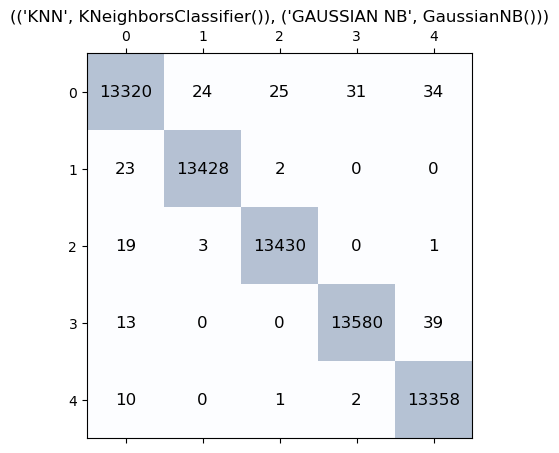

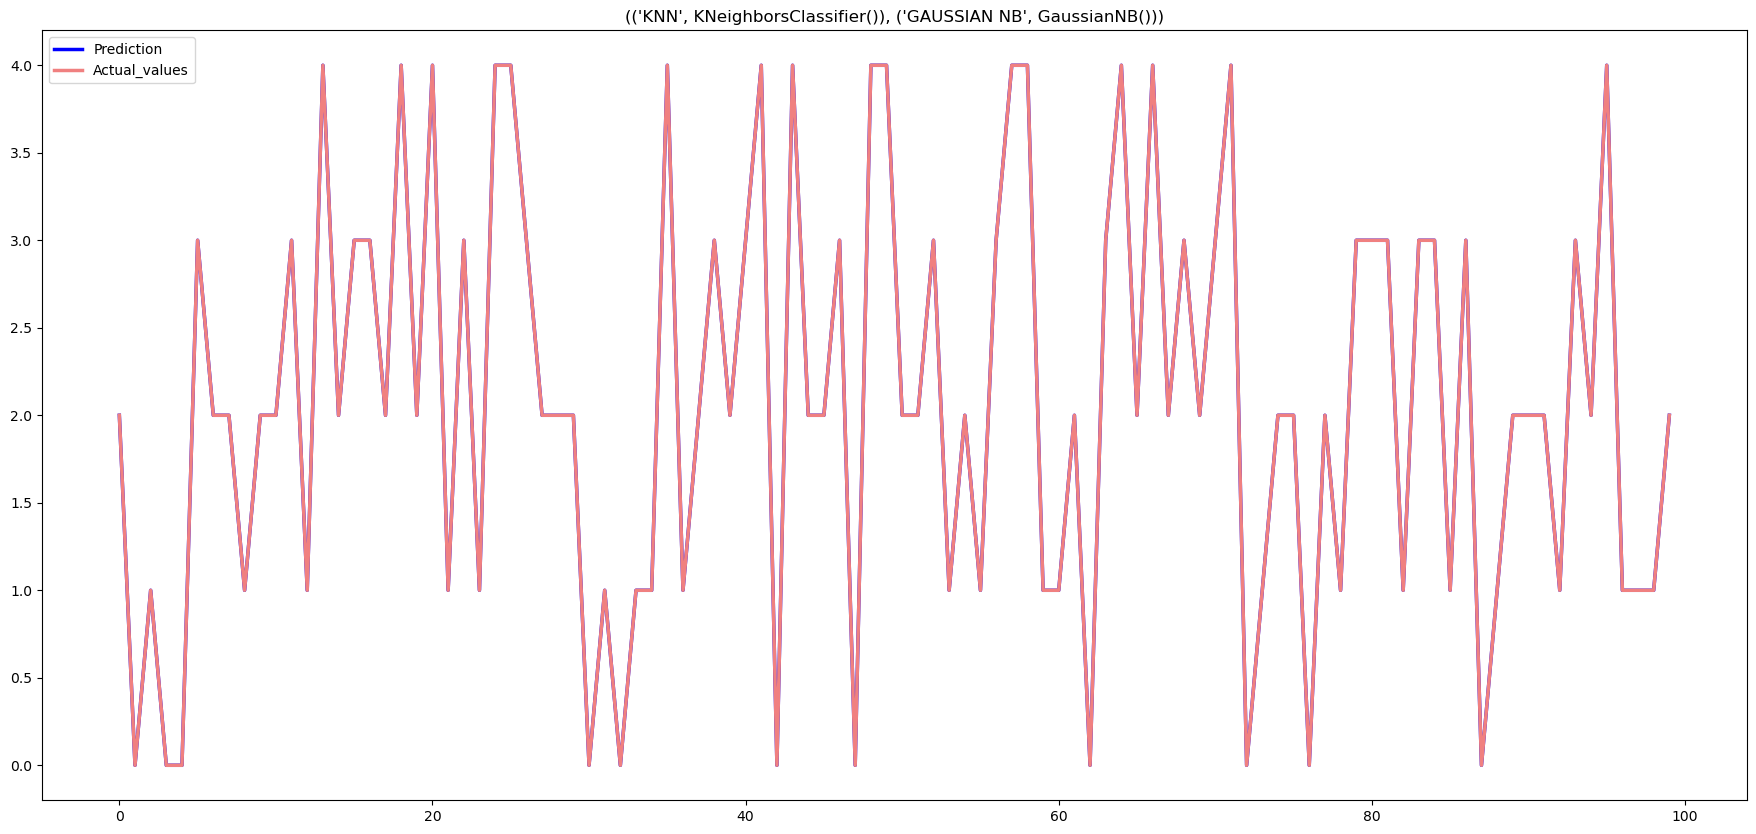



(('KNN', KNeighborsClassifier()), ('DT', DecisionTreeClassifier()))
- Training time :  175.9689245223999
- Testing time :  38.243059158325195
----------------------------------
- Train Accuracy : 0.9991498745229646
- Train MCC : 0.9989375961049786
- Train F1 score : 0.9991498665103167
- Train Precision : 0.999150875417357
- Train Recall : 0.9991498745229646
- Train Cohens Kappa Score : 0.9989373418829208
- Train Log Loss : 0.003843345385383381
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9973716644640126
- Test MCC : 0.9967146935476459
- Test F1 score : 0.9973717961584607
- Test Precision : 0.9973724973200818
- Test Recall : 0.9973716644640126
- Test Cohens Kappa Score : 0.996714551238612
- Test Log Loss : 0.011304294886412224
----------------------------------
Mean Absolute Error -  0.005256671071974815
Mean Squared Error -  0.013898994698780868
Root Mean Squared Error -  0.11789399772160103
----------------------------------


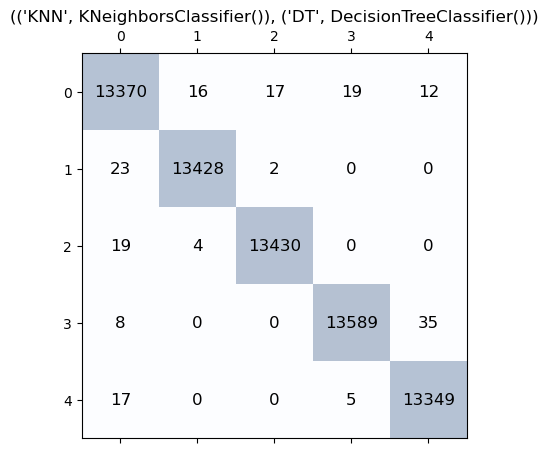

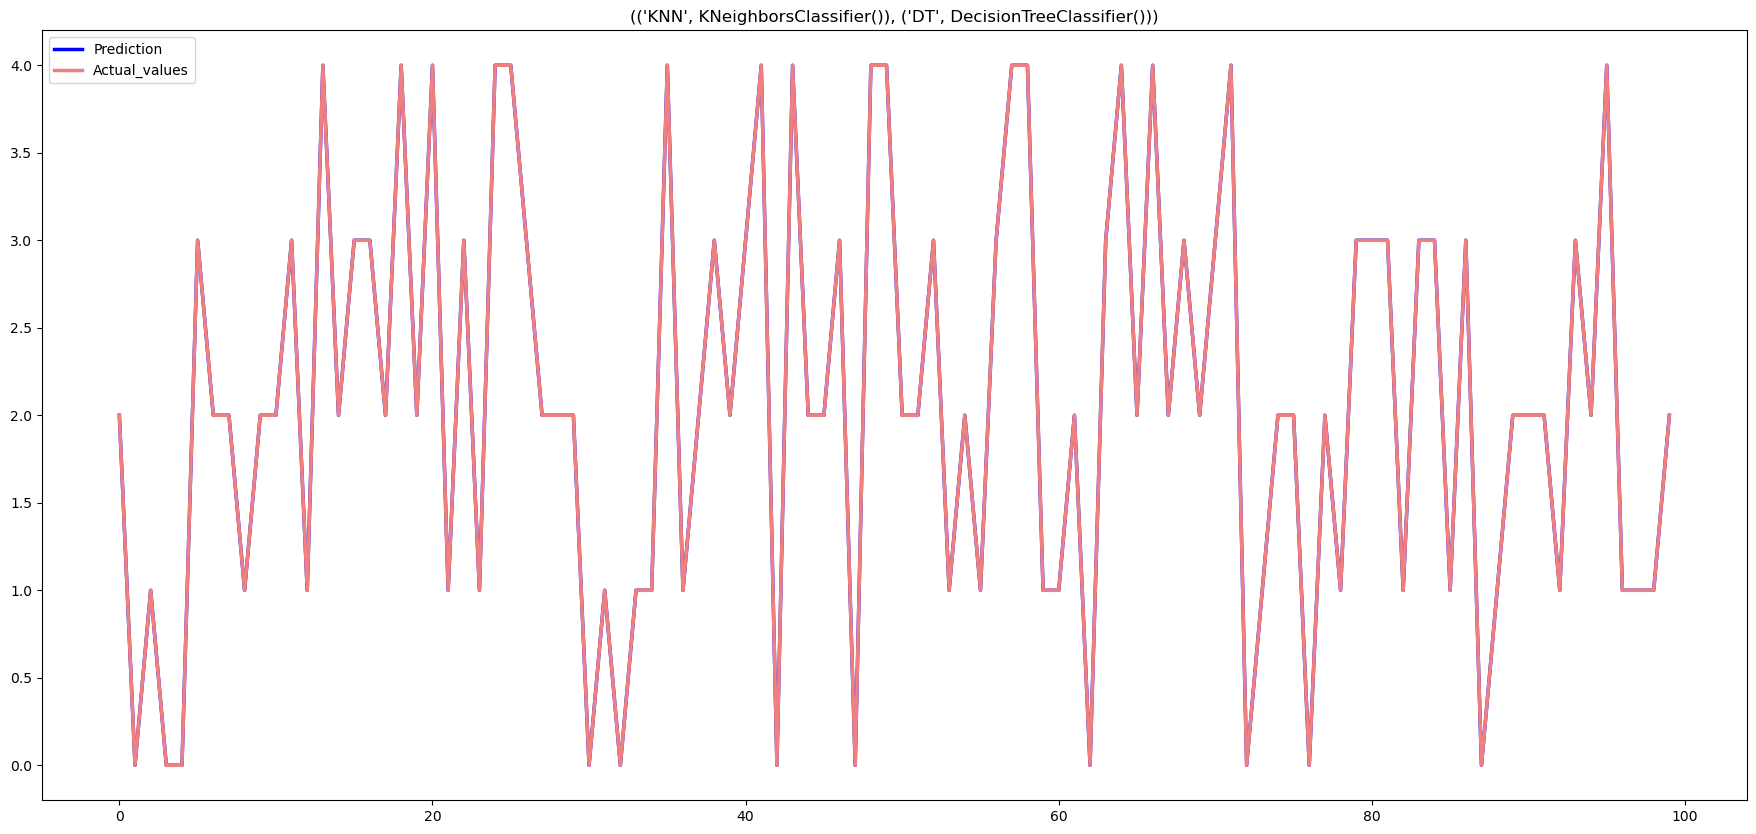



(('KNN', KNeighborsClassifier()), ('RF', RandomForestClassifier(n_estimators=30)))
- Training time :  281.3723120689392
- Testing time :  40.113534450531006
----------------------------------
- Train Accuracy : 0.9991350251696539
- Train MCC : 0.9989191568152752
- Train F1 score : 0.9991349776019425
- Train Precision : 0.9991364371302937
- Train Recall : 0.9991350251696539
- Train Cohens Kappa Score : 0.9989187800579253
- Train Log Loss : 0.002707172747680602
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9981735295427884
- Test MCC : 0.9977170581217599
- Test F1 score : 0.9981733015101659
- Test Precision : 0.9981737396157473
- Test Recall : 0.9981735295427884
- Test Cohens Kappa Score : 0.9977168914694738
- Test Log Loss : 0.008248055659107125
----------------------------------
Mean Absolute Error -  0.003504447381316544
Mean Squared Error -  0.009058105519504625
Root Mean Squared Error -  0.09517408008226097
----------------------------------

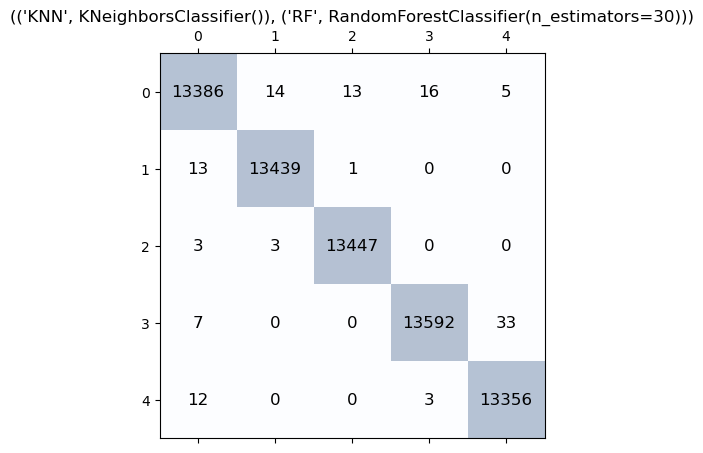

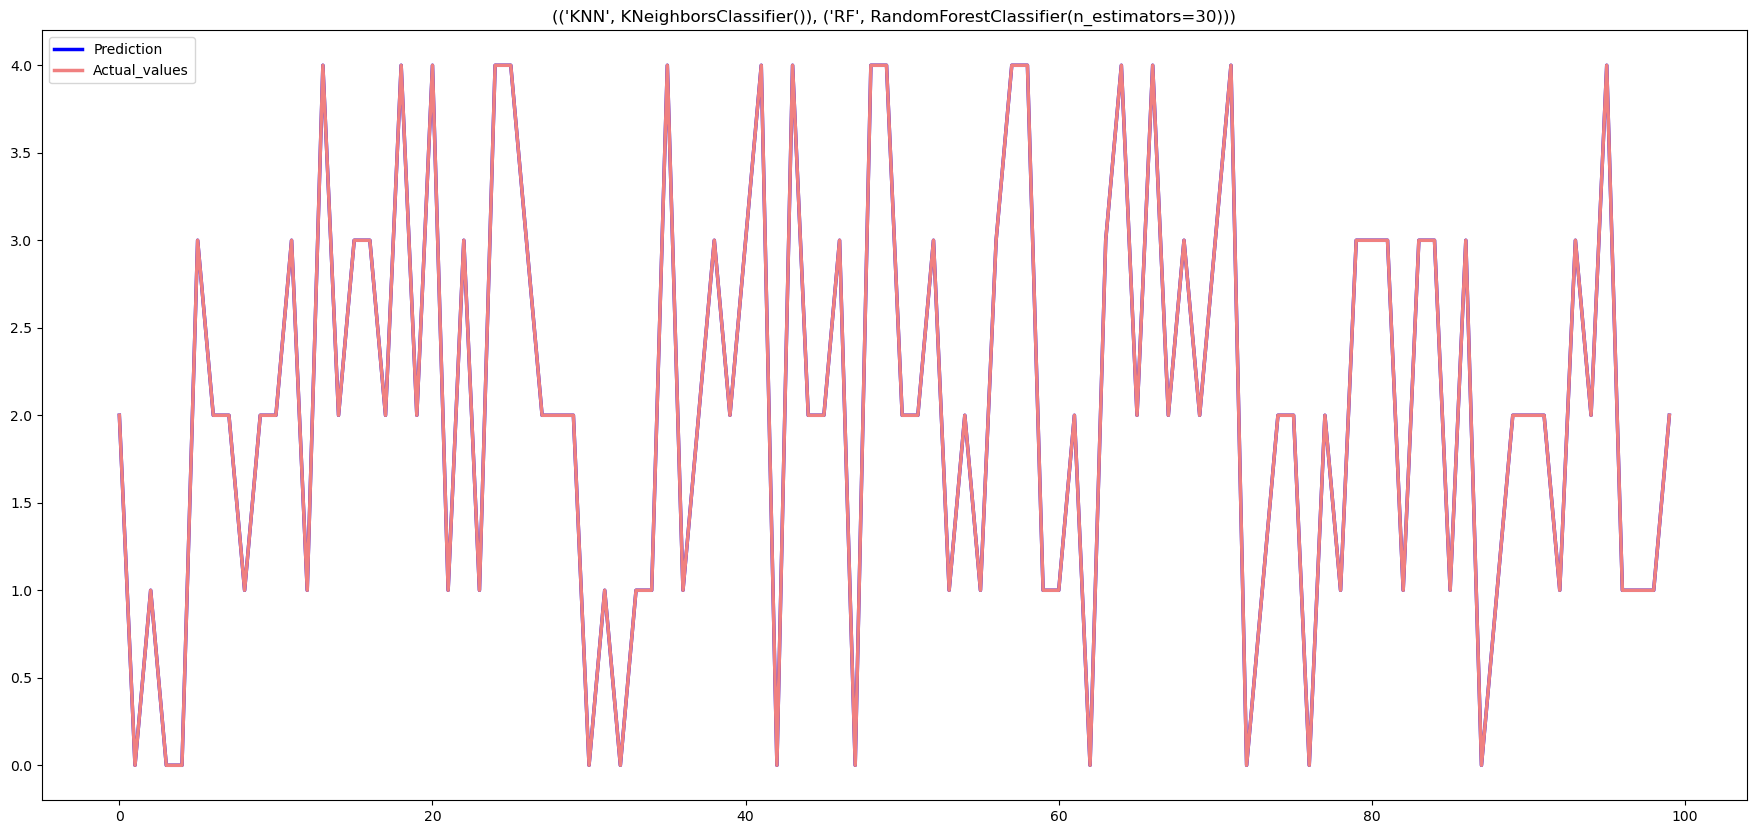



(('KNN', KNeighborsClassifier()), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  736.1328678131104
- Testing time :  40.485204219818115
----------------------------------
- Train Accuracy : 0.9974496235688936
- Train MCC : 0.9968128991347602
- Train F1 score : 0.9974492208981007
- Train Precision : 0.9974523094574036
- Train Recall : 0.9974496235688936
- Train Cohens Kappa Score : 0.9968120247208554
- Train Log Loss : 0.0075793632313069575
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9967479916249647
- Test MCC : 0.9959361478046296
- Test F1 score : 0.9967463054060943
- Test Precision : 0.9967494048902557
- Test Recall : 0.9967479916249647
- Test Cohens Kappa Score : 0.9959349556016784
- Test Log Loss : 0.013466926501741793
----------------------------------
Mean Absolute Error -  0.00697919605601176
Mean Squared Error -  0.01945265283696895
Root Mean Squared Error -  0.13947276736685535
----------------------------------


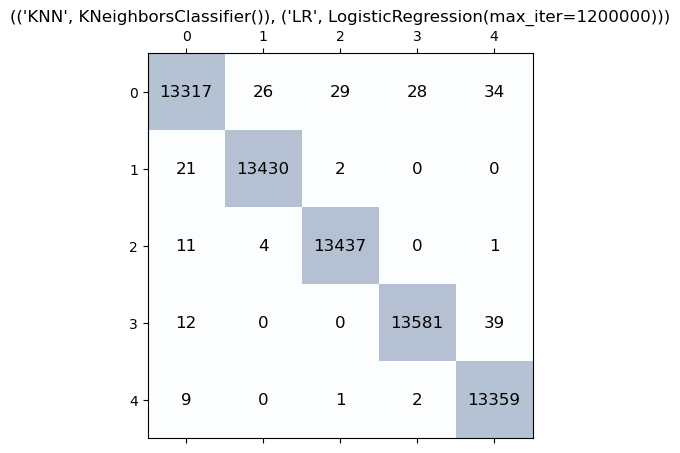

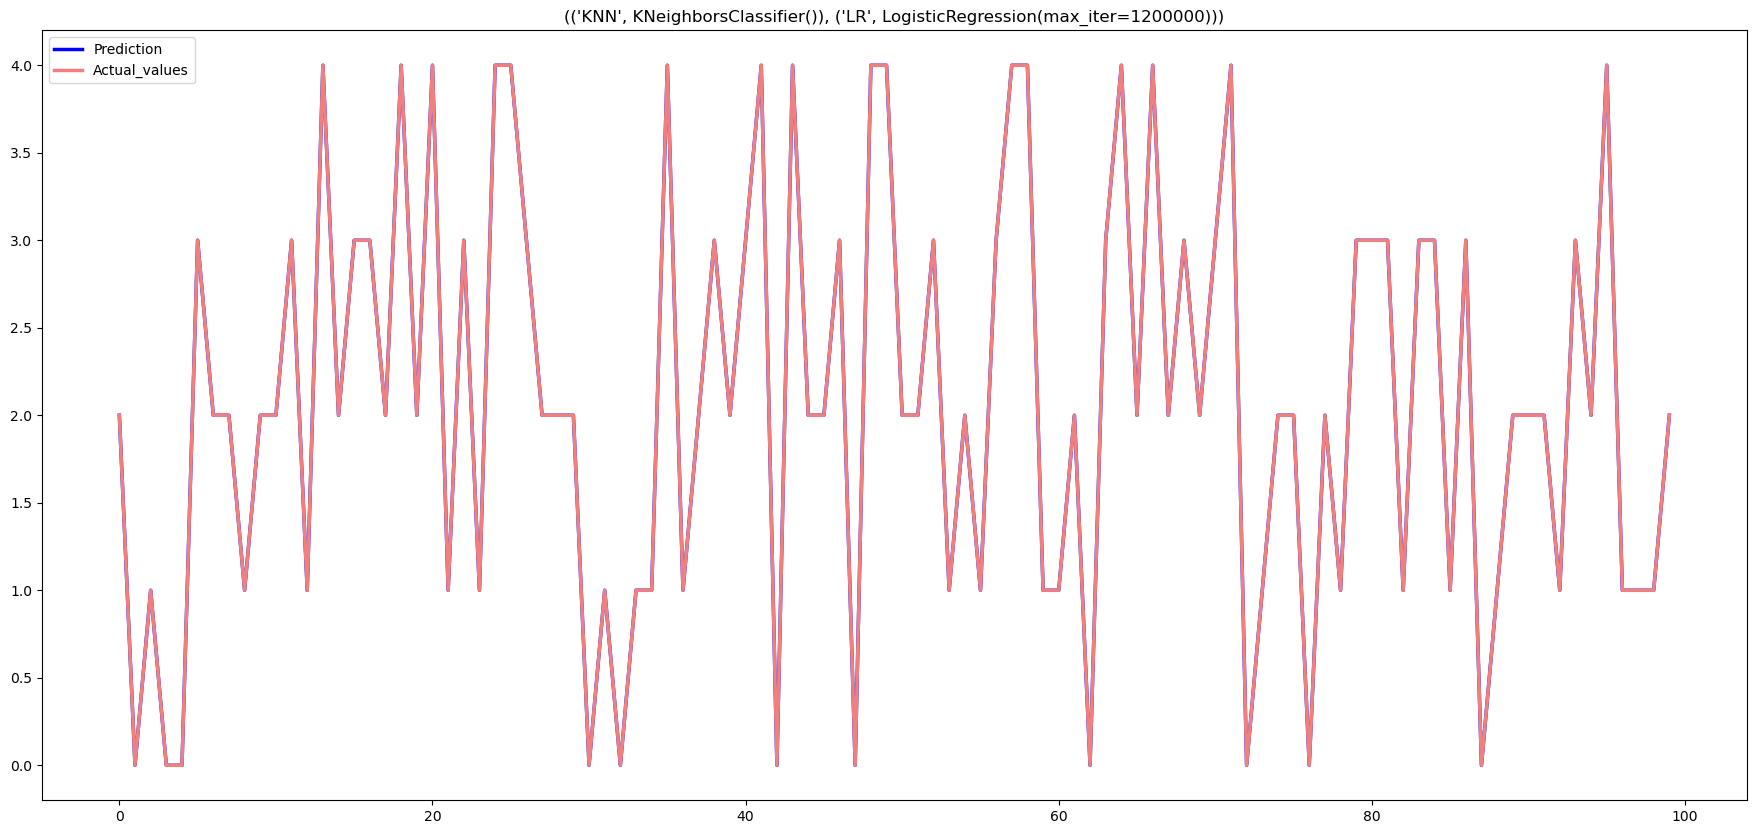



(('KNN', KNeighborsClassifier()), ('GAUSSIAN NB', GaussianNB()), ('DT', DecisionTreeClassifier()))
- Training time :  183.50098657608032
- Testing time :  35.01283097267151
----------------------------------
- Train Accuracy : 0.998912284869994
- Train MCC : 0.9986410246126951
- Train F1 score : 0.9989121846230099
- Train Precision : 0.9989147689244124
- Train Recall : 0.998912284869994
- Train Cohens Kappa Score : 0.9986403539699175
- Train Log Loss : 0.00399965581478449
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9975053086438086
- Test MCC : 0.9968819583309141
- Test F1 score : 0.9975053727572254
- Test Precision : 0.9975068190491677
- Test Recall : 0.9975053086438086
- Test Cohens Kappa Score : 0.9968816115661628
- Test Log Loss : 0.010789232678592596
----------------------------------
Mean Absolute Error -  0.005093328185557519
Mean Squared Error -  0.013587158279256939
Root Mean Squared Error -  0.11656396647016153
---------------------

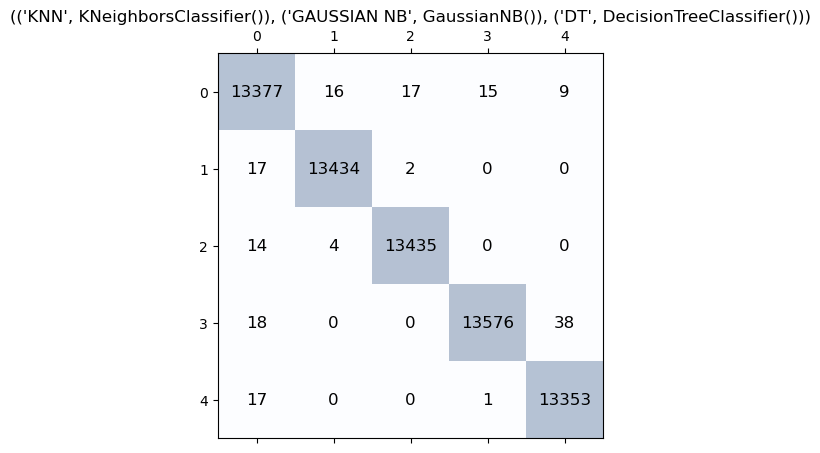

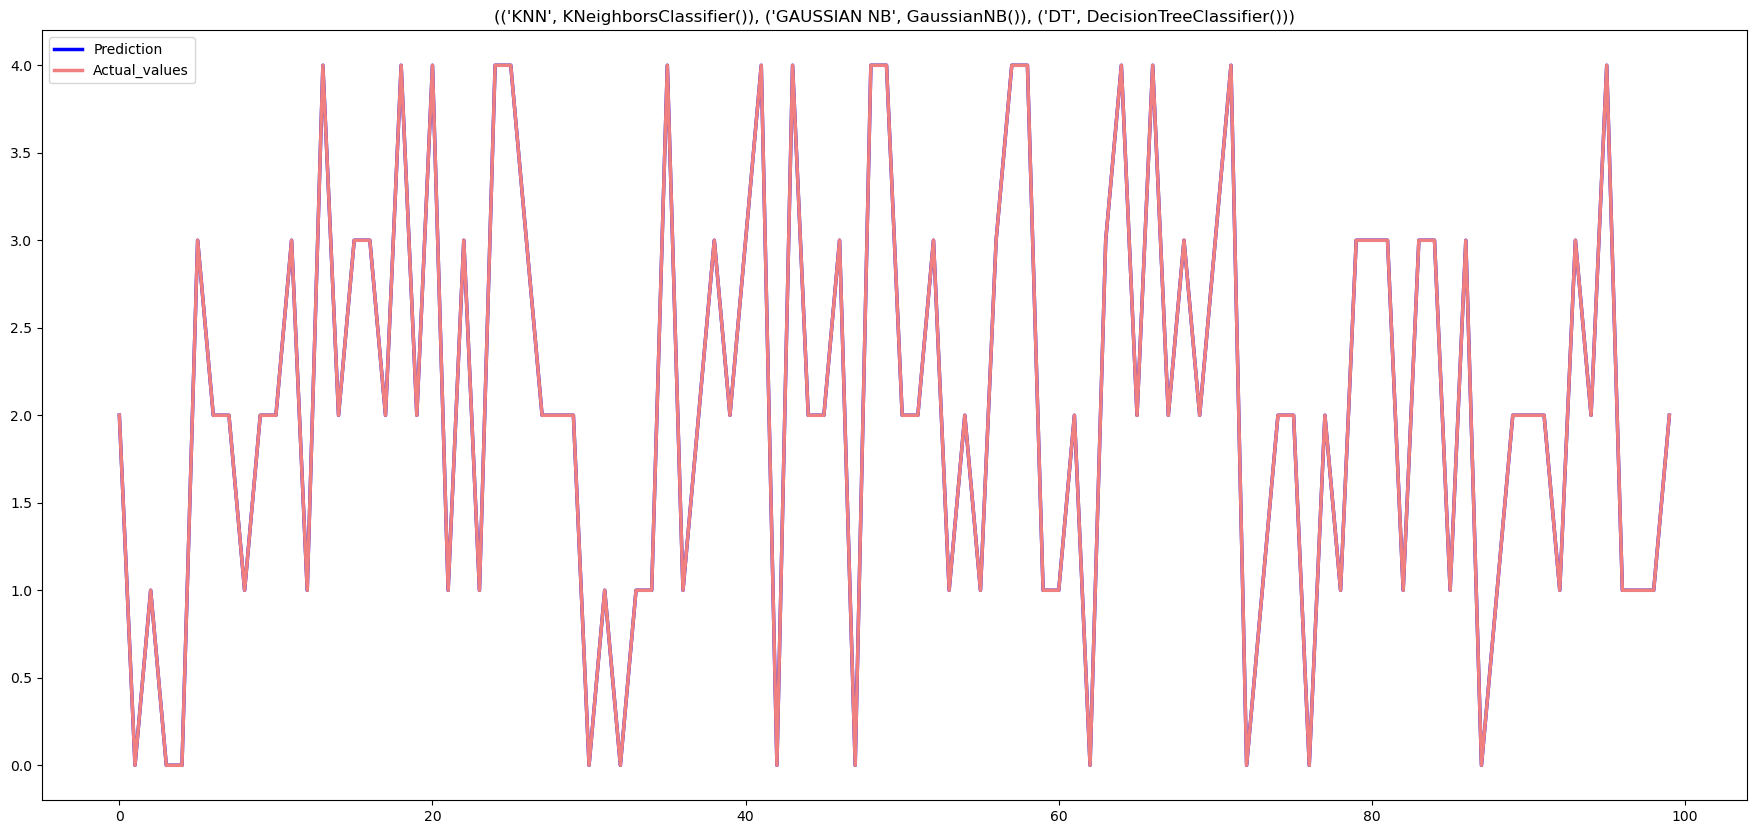



(('KNN', KNeighborsClassifier()), ('GAUSSIAN NB', GaussianNB()), ('RF', RandomForestClassifier(n_estimators=30)))
- Training time :  277.37623143196106
- Testing time :  53.06058216094971
----------------------------------
- Train Accuracy : 0.9991238881546709
- Train MCC : 0.9989053238207308
- Train F1 score : 0.9991238377968875
- Train Precision : 0.9991256483255795
- Train Recall : 0.9991238881546709
- Train Cohens Kappa Score : 0.99890485867094
- Train Log Loss : 0.0028838257793415123
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9981586801894777
- Test MCC : 0.9976985986549177
- Test F1 score : 0.9981584428928408
- Test Precision : 0.9981592774965028
- Test Recall : 0.9981586801894777
- Test Cohens Kappa Score : 0.9976983305314007
- Test Log Loss : 0.007895471619792063
----------------------------------
Mean Absolute Error -  0.003519296734627207
Mean Squared Error -  0.009043256166193963
Root Mean Squared Error -  0.0950960365430335
-----

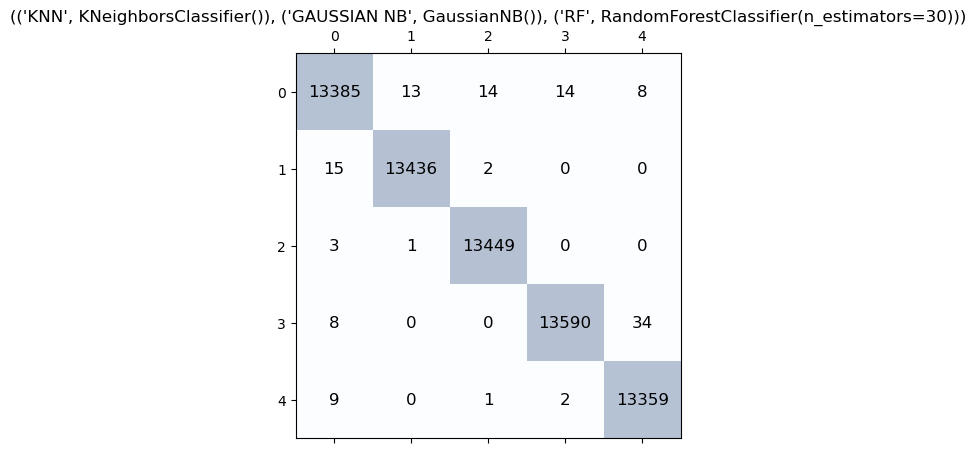

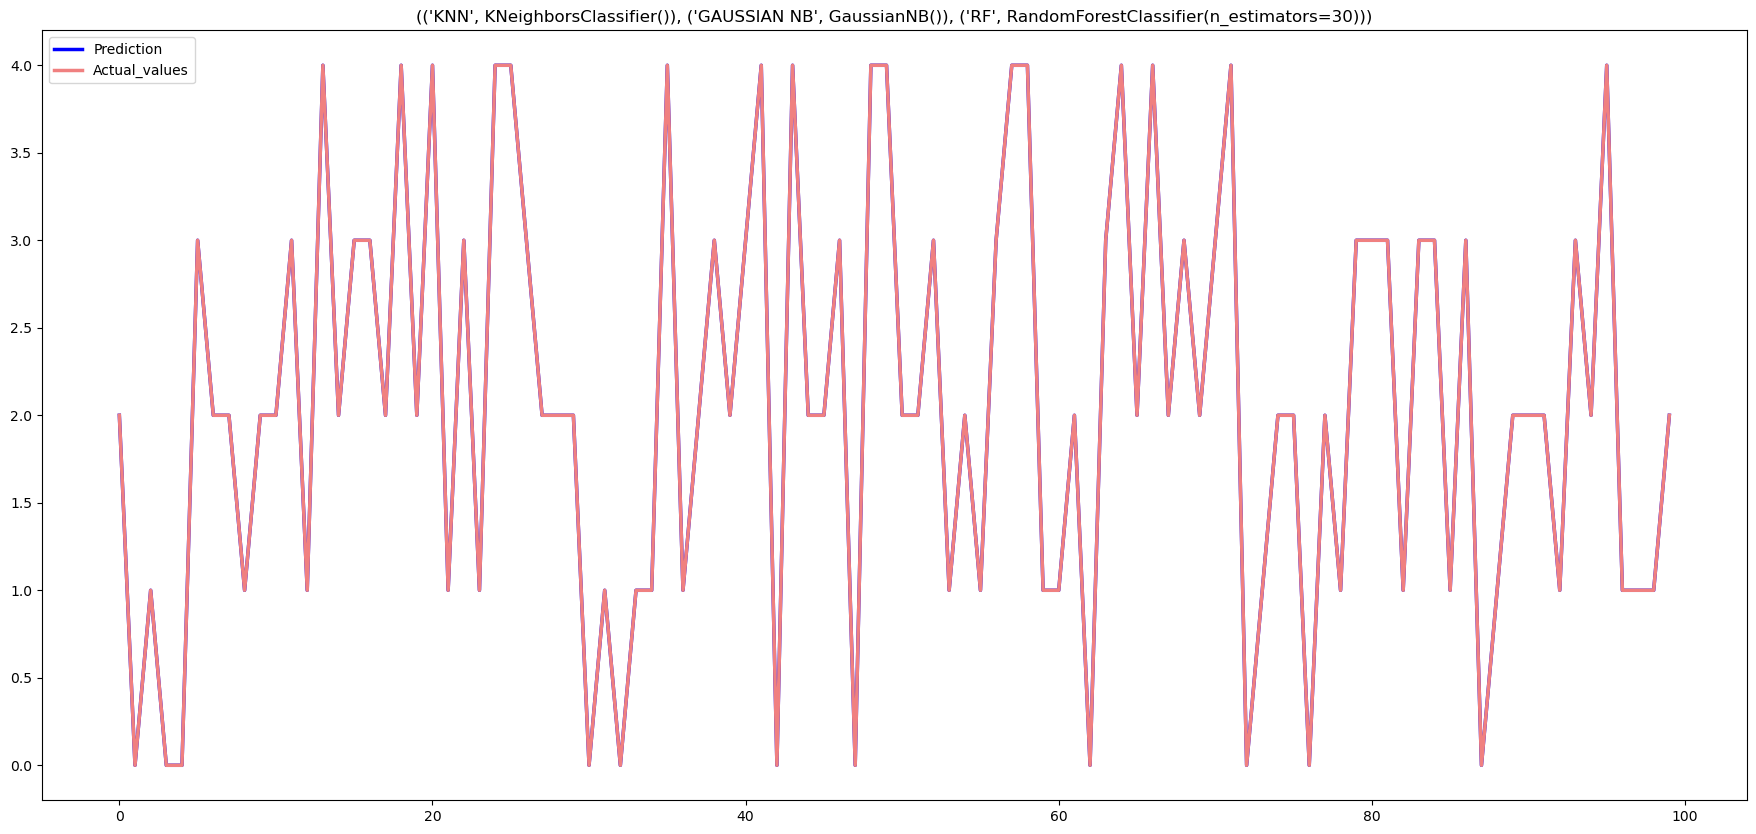



(('KNN', KNeighborsClassifier()), ('GAUSSIAN NB', GaussianNB()), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  612.34934425354
- Testing time :  30.63106083869934
----------------------------------
- Train Accuracy : 0.9974718975988596
- Train MCC : 0.9968407668127686
- Train F1 score : 0.9974716635989782
- Train Precision : 0.997475022953304
- Train Recall : 0.9974718975988596
- Train Cohens Kappa Score : 0.9968398671135852
- Train Log Loss : 0.007424932270695919
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9966737448584114
- Test MCC : 0.9958431895393286
- Test F1 score : 0.99667207873007
- Test Precision : 0.996674603171417
- Test Recall : 0.9966737448584114
- Test Cohens Kappa Score : 0.9958421456697586
- Test Log Loss : 0.01326212324183655
----------------------------------
Mean Absolute Error -  0.0070682921758757405
Mean Squared Error -  0.01945265283696895
Root Mean Squared Error -  0.13947276736685535
--------------

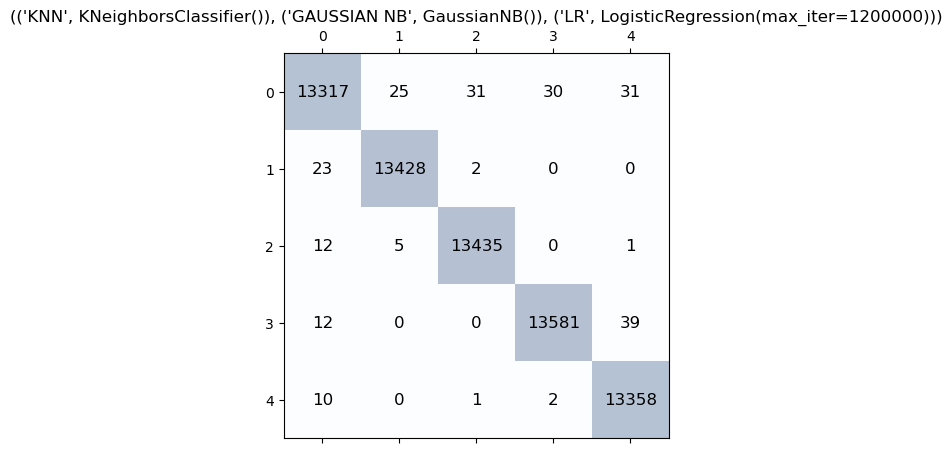

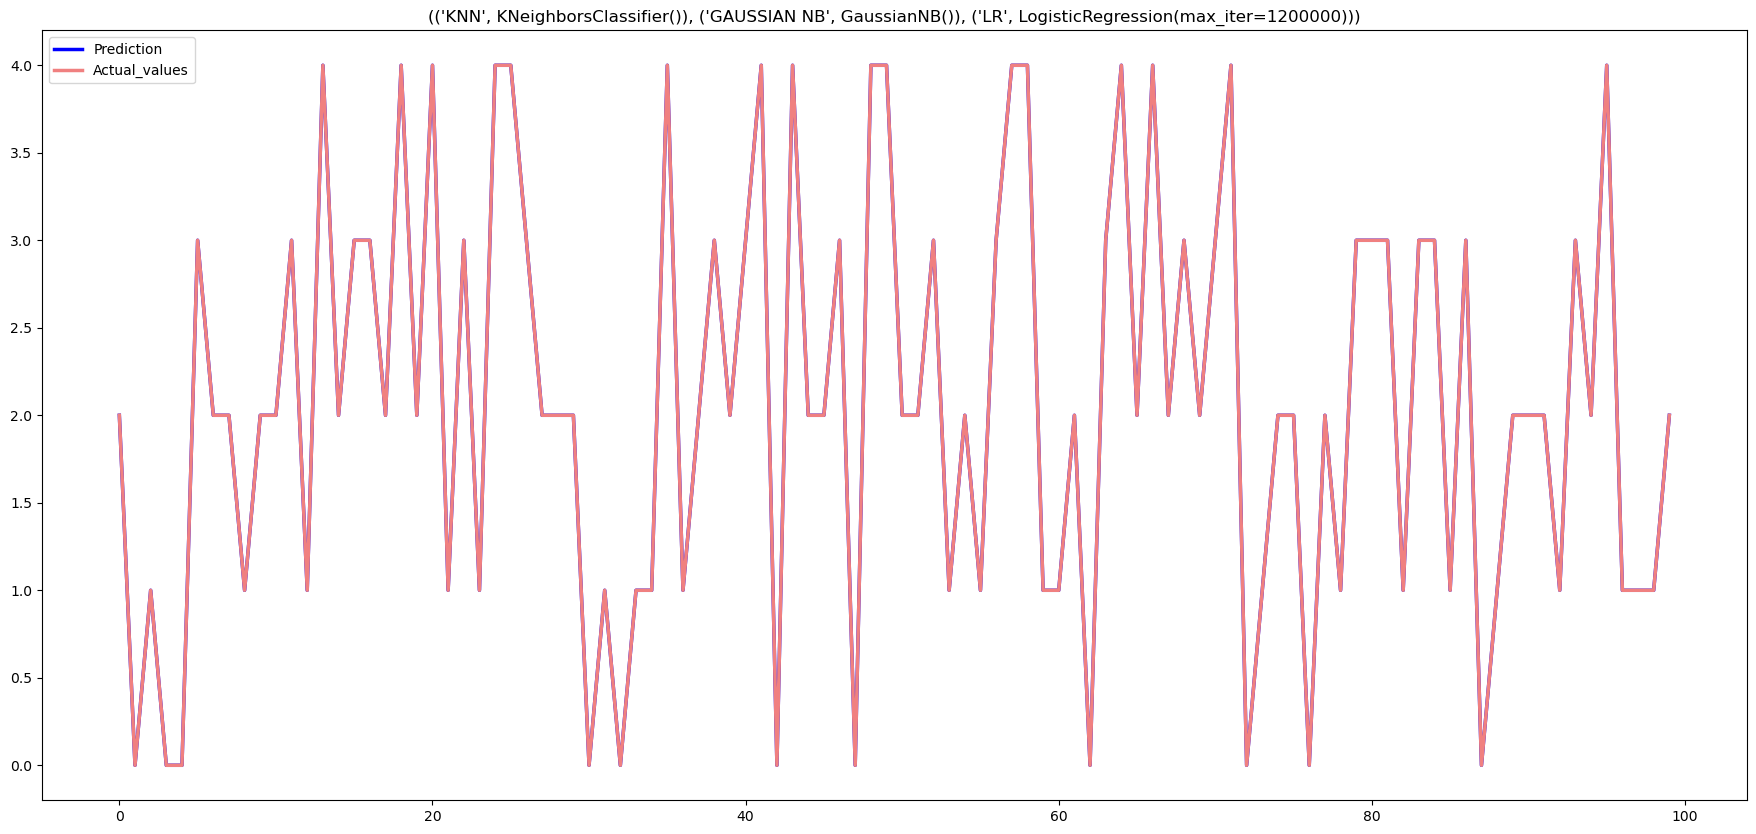



(('KNN', KNeighborsClassifier()), ('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier(n_estimators=30)))
- Training time :  255.41138815879822
- Testing time :  32.693570613861084
----------------------------------
- Train Accuracy : 0.9991127511396879
- Train MCC : 0.9988914156266072
- Train F1 score : 0.9991127073512164
- Train Precision : 0.9991145767466619
- Train Recall : 0.9991127511396879
- Train Cohens Kappa Score : 0.9988909373709559
- Train Log Loss : 0.003177367108276738
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9981735295427884
- Test MCC : 0.9977170491312163
- Test F1 score : 0.998173465878657
- Test Precision : 0.9981740306949999
- Test Recall : 0.9981735295427884
- Test Cohens Kappa Score : 0.9977168918288023
- Test Log Loss : 0.008194933527464199
----------------------------------
Mean Absolute Error -  0.00348959802800588
Mean Squared Error -  0.008835365219844675
Root Mean Squared Error -  0.09399662344916798
-

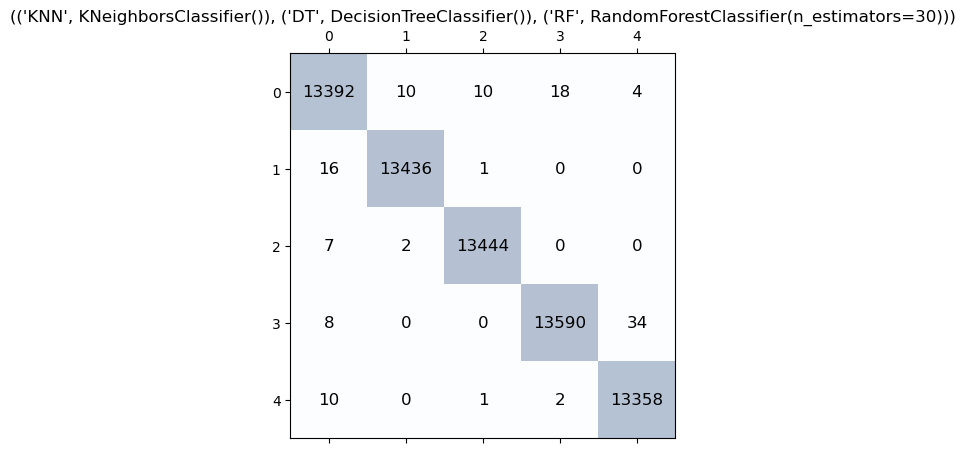

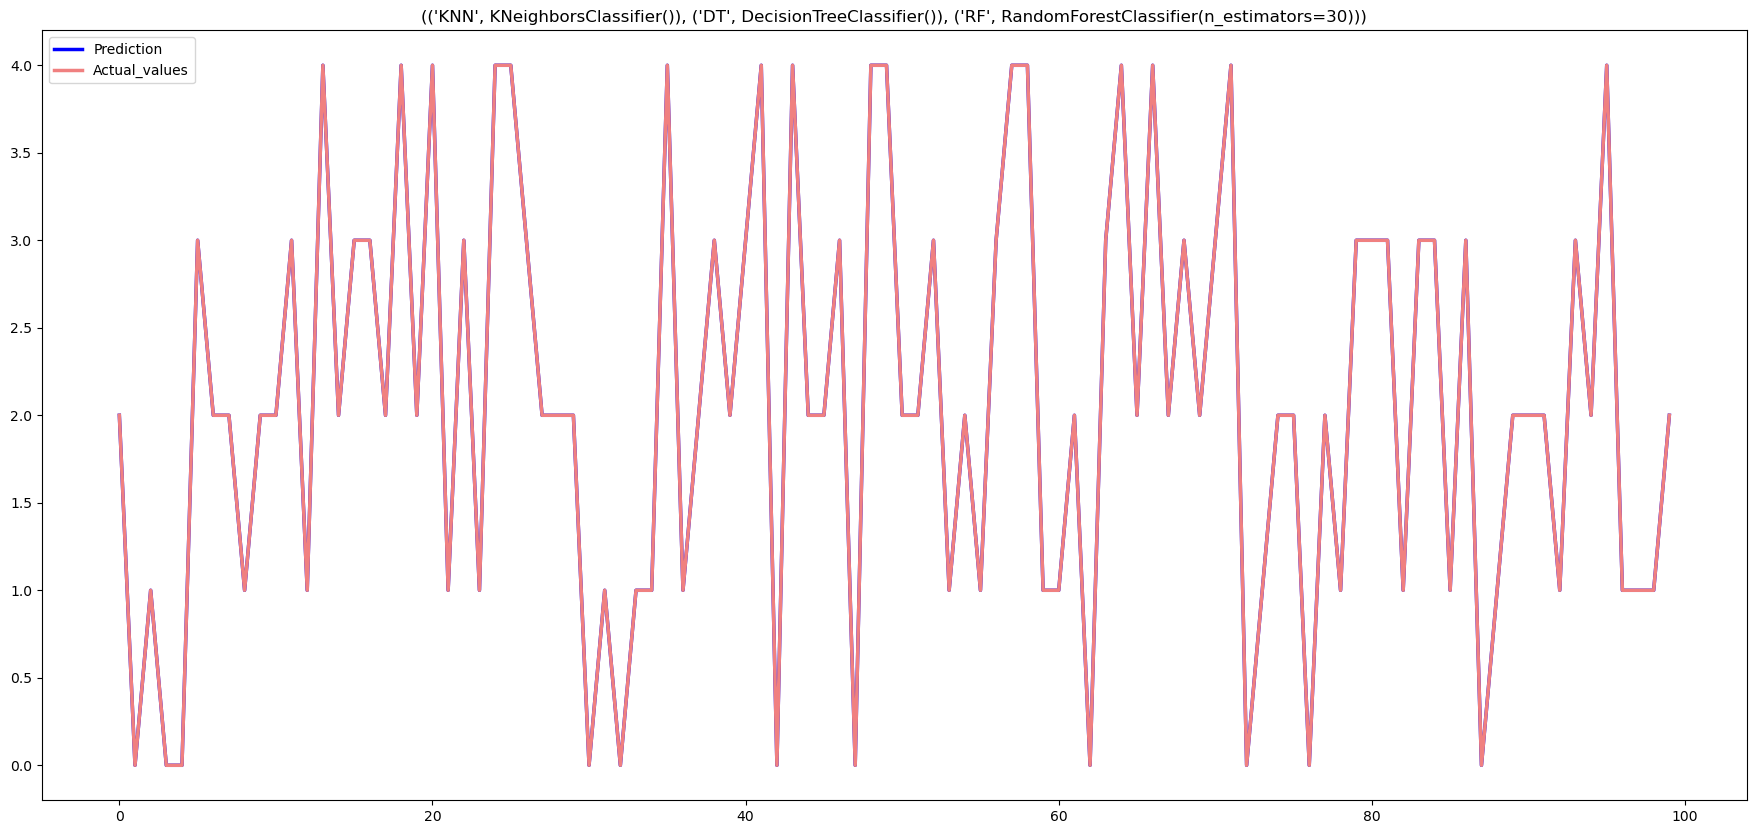



(('KNN', KNeighborsClassifier()), ('DT', DecisionTreeClassifier()), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  625.4474775791168
- Testing time :  30.59134793281555
----------------------------------
- Train Accuracy : 0.9989531205915982
- Train MCC : 0.9986919625669948
- Train F1 score : 0.9989530666044321
- Train Precision : 0.9989552680505546
- Train Recall : 0.9989531205915982
- Train Cohens Kappa Score : 0.998691398815152
- Train Log Loss : 0.003503274317880754
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9973716644640126
- Test MCC : 0.9967147859164346
- Test F1 score : 0.9973717544621363
- Test Precision : 0.9973727731788204
- Test Recall : 0.9973716644640126
- Test Cohens Kappa Score : 0.9967145532218166
- Test Log Loss : 0.010260891614676458
----------------------------------
Mean Absolute Error -  0.005226972365353489
Mean Squared Error -  0.013661405045810255
Root Mean Squared Error -  0.11688201335453738
-----

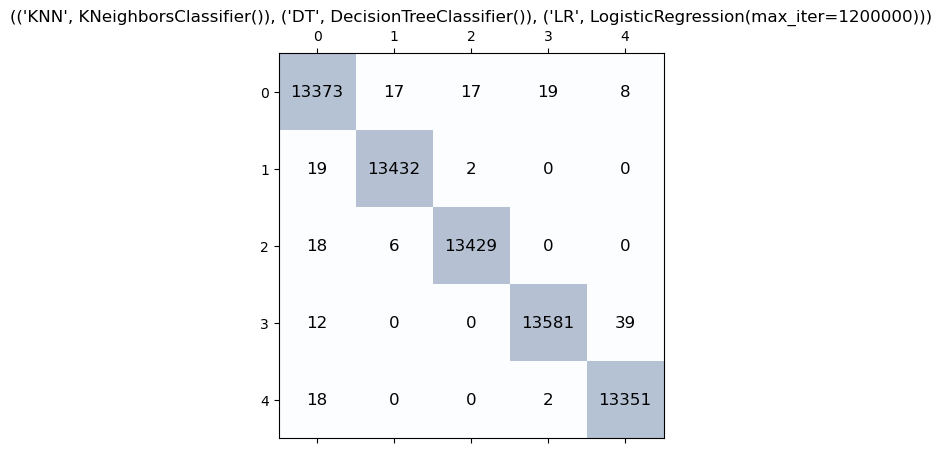

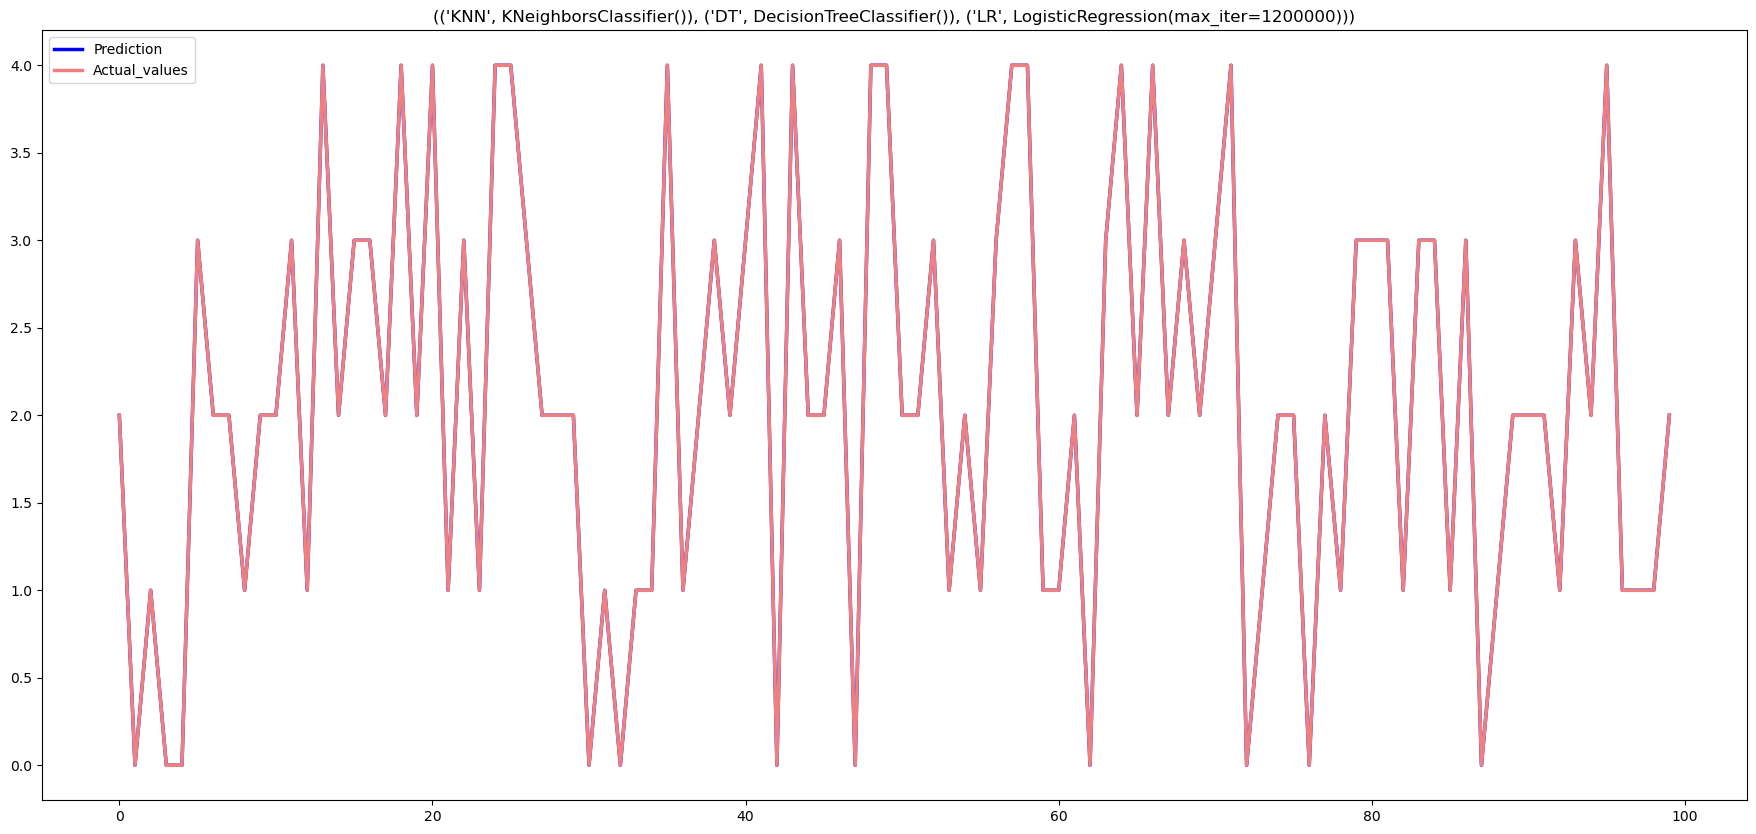



(('KNN', KNeighborsClassifier()), ('RF', RandomForestClassifier(n_estimators=30)), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  738.0500481128693
- Testing time :  30.328359603881836
----------------------------------
- Train Accuracy : 0.9991164634780155
- Train MCC : 0.9988960054752548
- Train F1 score : 0.9991164448807466
- Train Precision : 0.9991181362935542
- Train Recall : 0.9991164634780155
- Train Cohens Kappa Score : 0.998895577860183
- Train Log Loss : 0.0028895257051165654
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9981141321295458
- Test MCC : 0.9976427914326635
- Test F1 score : 0.9981139705615872
- Test Precision : 0.9981143998561828
- Test Recall : 0.9981141321295458
- Test Cohens Kappa Score : 0.9976426437666361
- Test Log Loss : 0.007742282995494603
----------------------------------
Mean Absolute Error -  0.0036232422078018504
Mean Squared Error -  0.009295695172475239
Root Mean Squared Error -  0.09641

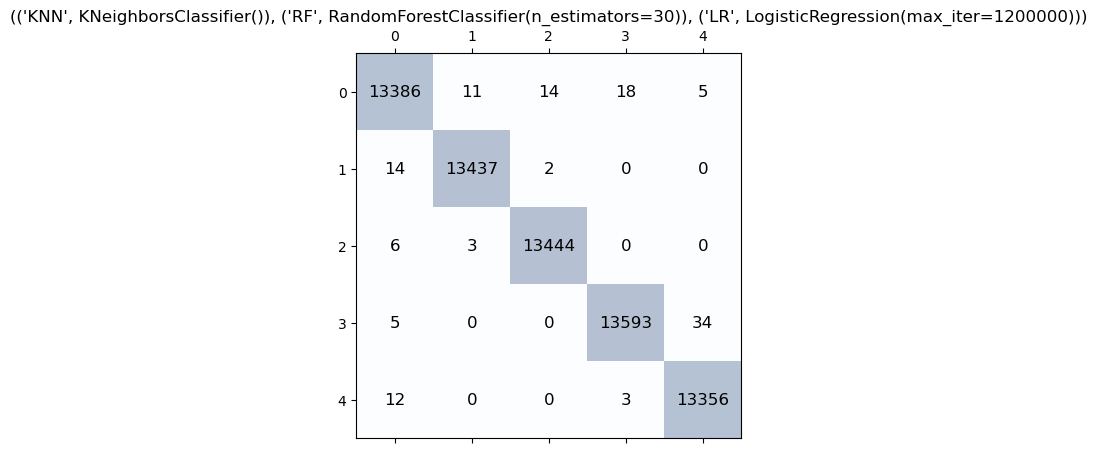

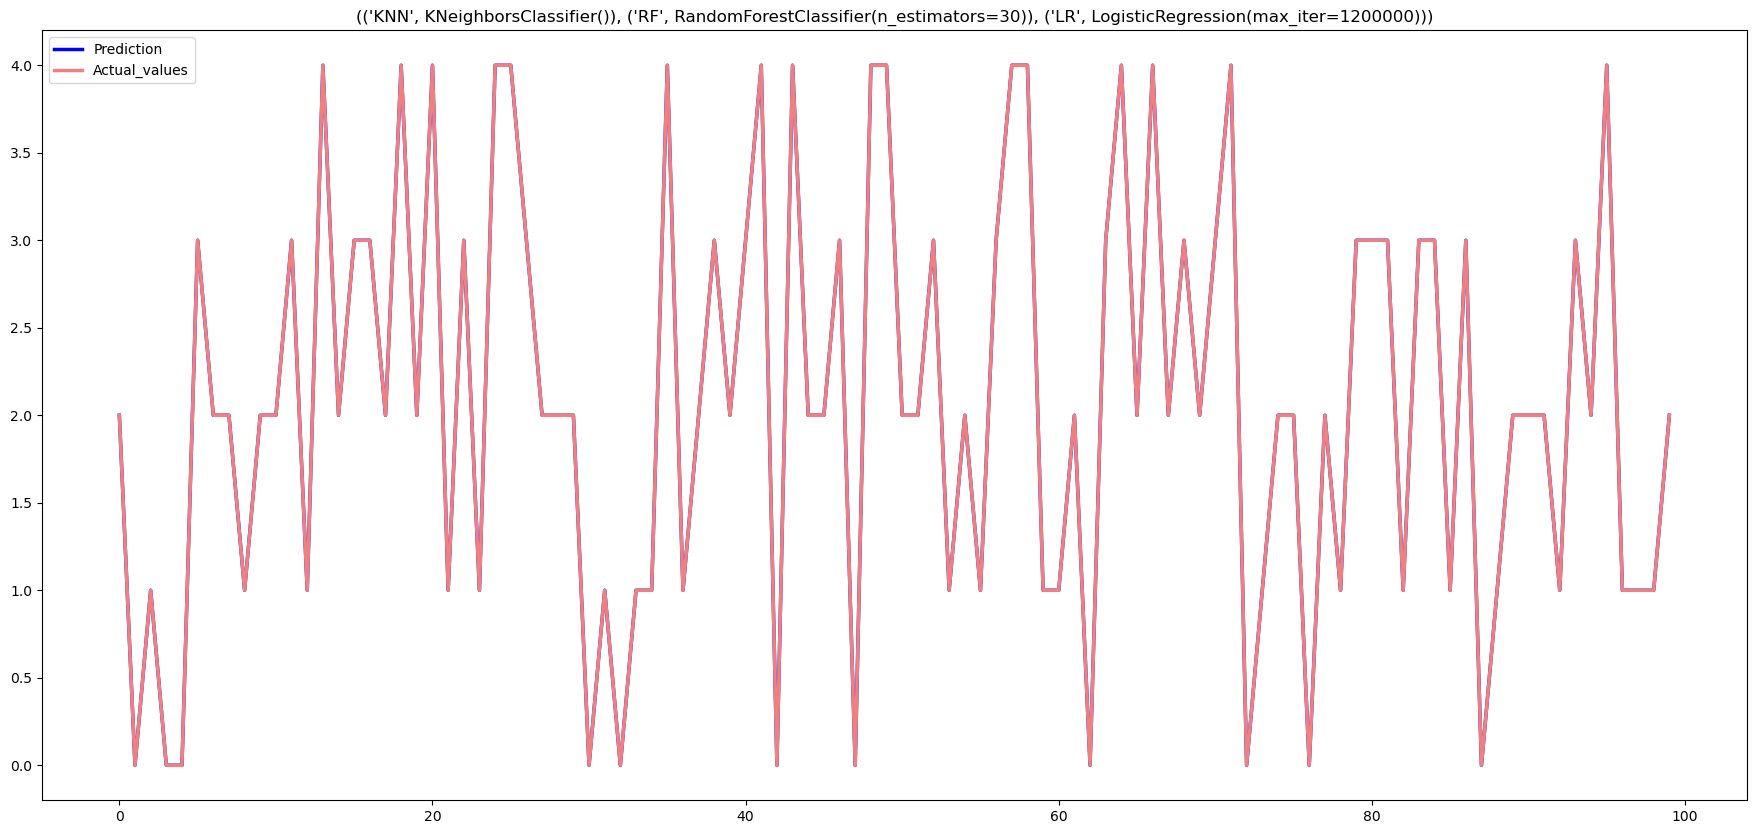

In [33]:
from itertools import combinations,product
algo_list = [
    ('KNN',knn),
    ('GAUSSIAN NB',nb),
    ('DT',dt),
    ('RF',rf),
    ('LR',lr)
    ]

list_combo = []
for n in range(len(algo_list) + 1):
    list_combo += combinations(algo_list, n)
res = list_combo[6:10]+list_combo[16:22]
for i in res:
    print('\n')
    print(i)
    stack_model = StackingClassifier(estimators=list(i), final_estimator=MLPClassifier())
    start_time = time.time()
    stack_model.fit(X_train, Y_train)
    end_time = time.time()
    print("- Training time : ",end_time-start_time)
    start_time = time.time()
    Y_test_predf1 = stack_model.predict(X_test)
    end_time = time.time()
    print("- Testing time : ",end_time-start_time)
    print('----------------------------------')
    Y_train_predf1 = stack_model.predict(X_train)
    Y_train_probsf1 = stack_model.predict_proba(X_train)
    Y_test_probsf1 = stack_model.predict_proba(X_test)

    # Training set model performance
    stack_model_train_accuracy = accuracy_score(Y_train, Y_train_predf1)
    stack_model_train_mcc = matthews_corrcoef(Y_train, Y_train_predf1)
    stack_model_train_f1 = f1_score(Y_train, Y_train_predf1, average='weighted') 
    stack_model_train_precision = precision_score(Y_train, Y_train_predf1,average='weighted')
    stack_model_train_recall = recall_score(Y_train, Y_train_predf1, average='weighted')
    stack_model_train_ckscore = cohen_kappa_score(Y_train, Y_train_predf1)
    stack_model_train_logloss = log_loss(Y_train, Y_train_probsf1)

    # Test set model performance
    stack_model_test_accuracy = accuracy_score(Y_test, Y_test_predf1) 
    stack_model_test_mcc = matthews_corrcoef(Y_test, Y_test_predf1)
    stack_model_test_f1 = f1_score(Y_test, Y_test_predf1, average='weighted')
    stack_model_test_precision = precision_score(Y_test, Y_test_predf1,average='weighted')
    stack_model_test_recall = recall_score(Y_test, Y_test_predf1, average='weighted')
    stack_model_test_ckscore = cohen_kappa_score(Y_test, Y_test_predf1)
    stack_model_test_logloss = log_loss(Y_test, Y_test_probsf1)

    print('- Train Accuracy : %s' % stack_model_train_accuracy)
    print('- Train MCC : %s' % stack_model_train_mcc)
    print('- Train F1 score : %s' % stack_model_train_f1)
    print('- Train Precision : %s' % stack_model_train_precision)
    print('- Train Recall : %s' % stack_model_train_recall)
    print('- Train Cohens Kappa Score : %s' % stack_model_train_ckscore)
    print('- Train Log Loss : %s' % stack_model_train_logloss)
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Test Accuracy : %s' % stack_model_test_accuracy)
    print('- Test MCC : %s' % stack_model_test_mcc)
    print('- Test F1 score : %s' % stack_model_test_f1)
    print('- Test Precision : %s' % stack_model_test_precision)
    print('- Test Recall : %s' % stack_model_test_recall)
    print('- Test Cohens Kappa Score : %s' % stack_model_test_ckscore)
    print('- Test Log Loss : %s' % stack_model_test_logloss)
    print('----------------------------------')
    print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test, Y_test_predf1))
    print("Mean Squared Error - " , metrics.mean_squared_error(Y_test, Y_test_predf1))
    print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test, Y_test_predf1)))
    print('----------------------------------')
    matrix(Y_test, Y_test_predf1, i)
    plot(Y_test, Y_test_predf1, i)



(('KNN', KNeighborsClassifier()), ('GAUSSIAN NB', GaussianNB()), ('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier(n_estimators=30)))
- Training time :  248.83966422080994
- Testing time :  30.489994525909424
----------------------------------
- Train Accuracy : 0.9991721485529306
- Train MCC : 0.9989655802668949
- Train F1 score : 0.9991720984262915
- Train Precision : 0.9991736327497652
- Train Recall : 0.9991721485529306
- Train Cohens Kappa Score : 0.9989651843038948
- Train Log Loss : 0.002754817117032905
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9982032282494098
- Test MCC : 0.997754177713767
- Test F1 score : 0.9982034314195748
- Test Precision : 0.9982042818477116
- Test Recall : 0.9982032282494098
- Test Cohens Kappa Score : 0.9977540154553294
- Test Log Loss : 0.00803248342957603
----------------------------------
Mean Absolute Error -  0.0035489954412485335
Mean Squared Error -  0.009399640645649882
Root Mean Square

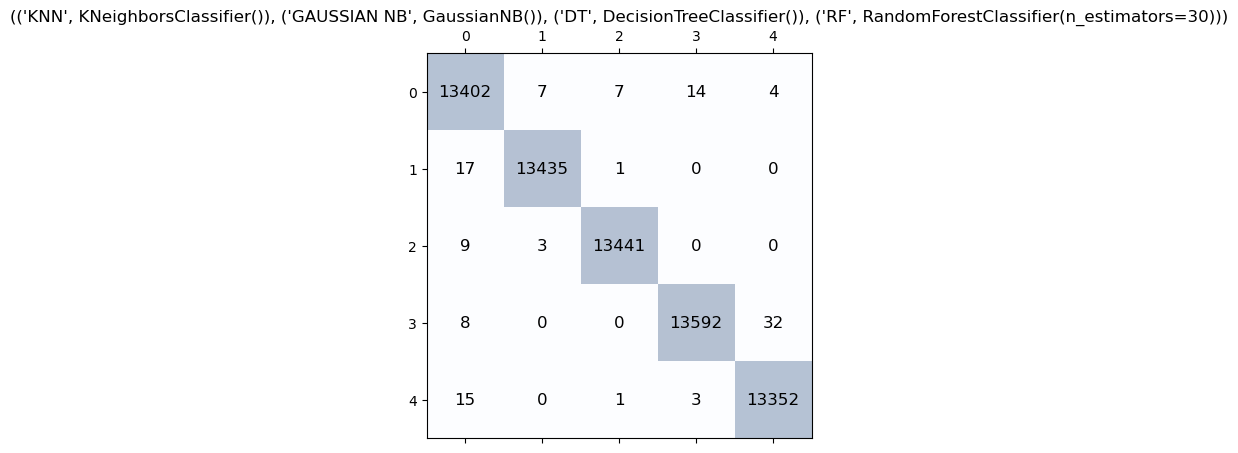

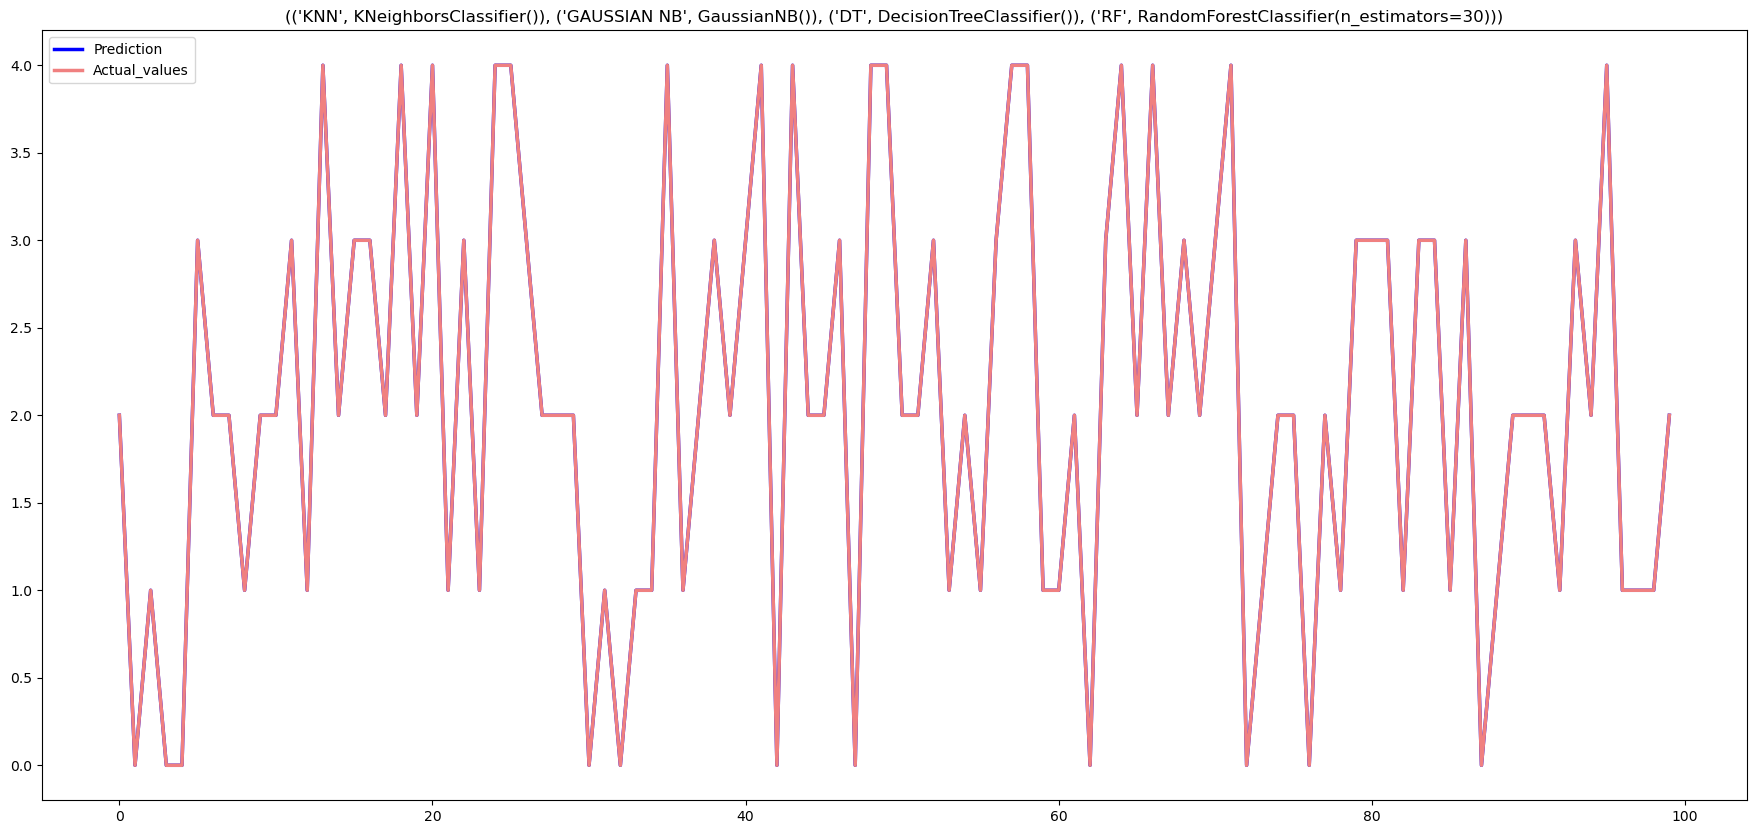



(('KNN', KNeighborsClassifier()), ('GAUSSIAN NB', GaussianNB()), ('DT', DecisionTreeClassifier()), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  655.8685033321381
- Testing time :  30.616243839263916
----------------------------------
- Train Accuracy : 0.9989494082532706
- Train MCC : 0.998687343742522
- Train F1 score : 0.9989493855831337
- Train Precision : 0.9989517042609912
- Train Recall : 0.9989494082532706
- Train Cohens Kappa Score : 0.9986867583847399
- Train Log Loss : 0.003435258790920289
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9975201579971192
- Test MCC : 0.9969004616099253
- Test F1 score : 0.9975202555024066
- Test Precision : 0.9975215141012751
- Test Recall : 0.9975201579971192
- Test Cohens Kappa Score : 0.9969001714437716
- Test Log Loss : 0.010469604683306787
----------------------------------
Mean Absolute Error -  0.005063629478936192
Mean Squared Error -  0.013408966039528979
Root Mean Squared Er

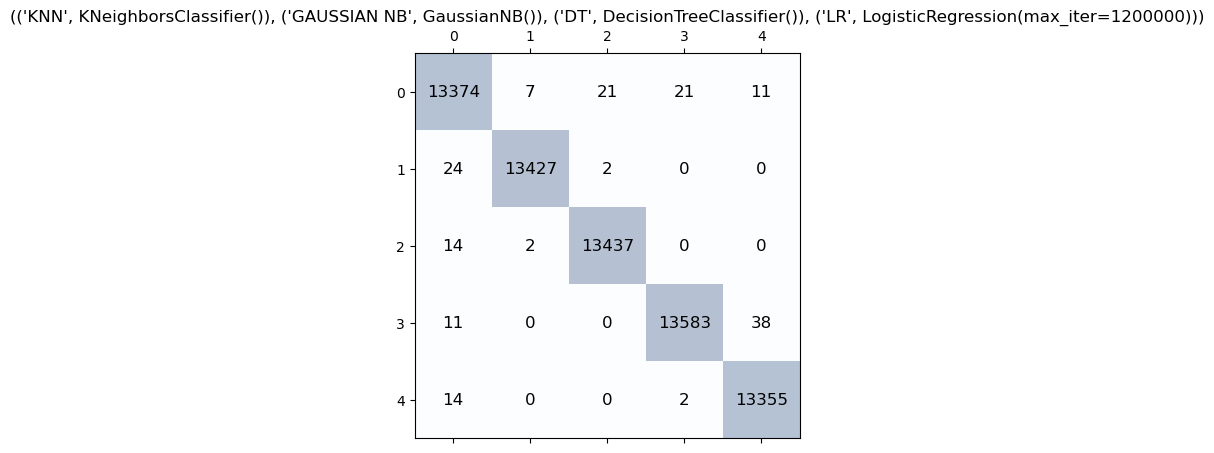

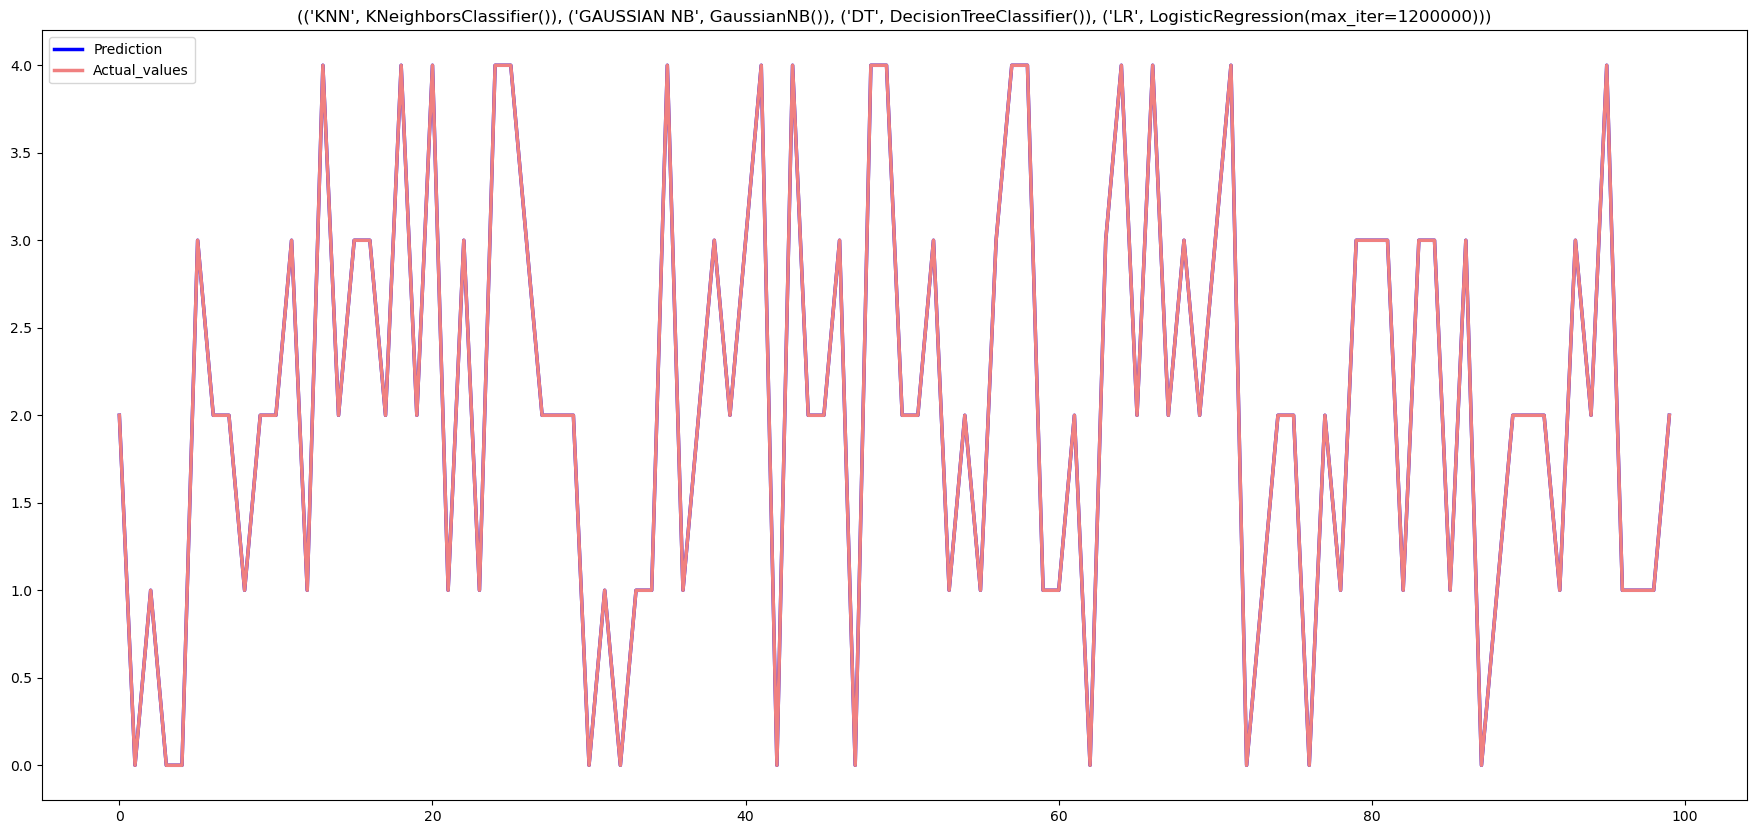



(('KNN', KNeighborsClassifier()), ('GAUSSIAN NB', GaussianNB()), ('RF', RandomForestClassifier(n_estimators=30)), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  708.4982347488403
- Testing time :  30.47831153869629
----------------------------------
- Train Accuracy : 0.9991461621846368
- Train MCC : 0.9989329412084836
- Train F1 score : 0.9991461247121535
- Train Precision : 0.999147045554519
- Train Recall : 0.9991461621846368
- Train Cohens Kappa Score : 0.998932701546062
- Train Log Loss : 0.0035887399952836446
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9980101866563711
- Test MCC : 0.9975129295239111
- Test F1 score : 0.99800972271434
- Test Precision : 0.9980101425670418
- Test Recall : 0.9980101866563711
- Test Cohens Kappa Score : 0.9975127092917929
- Test Log Loss : 0.008042233223375841
----------------------------------
Mean Absolute Error -  0.0038162838008404735
Mean Squared Error -  0.009785723831727128
Root Me

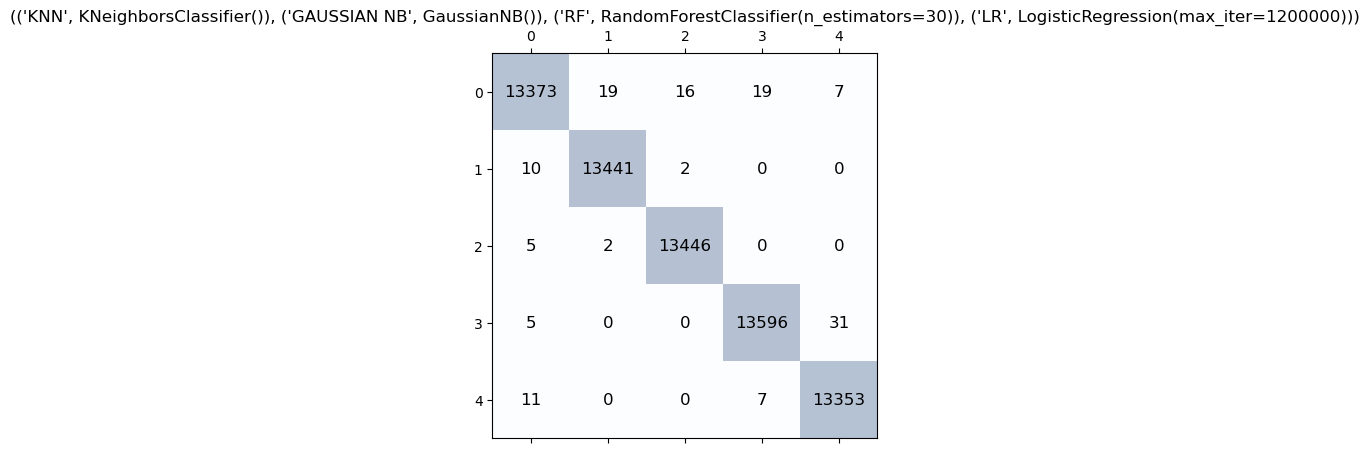

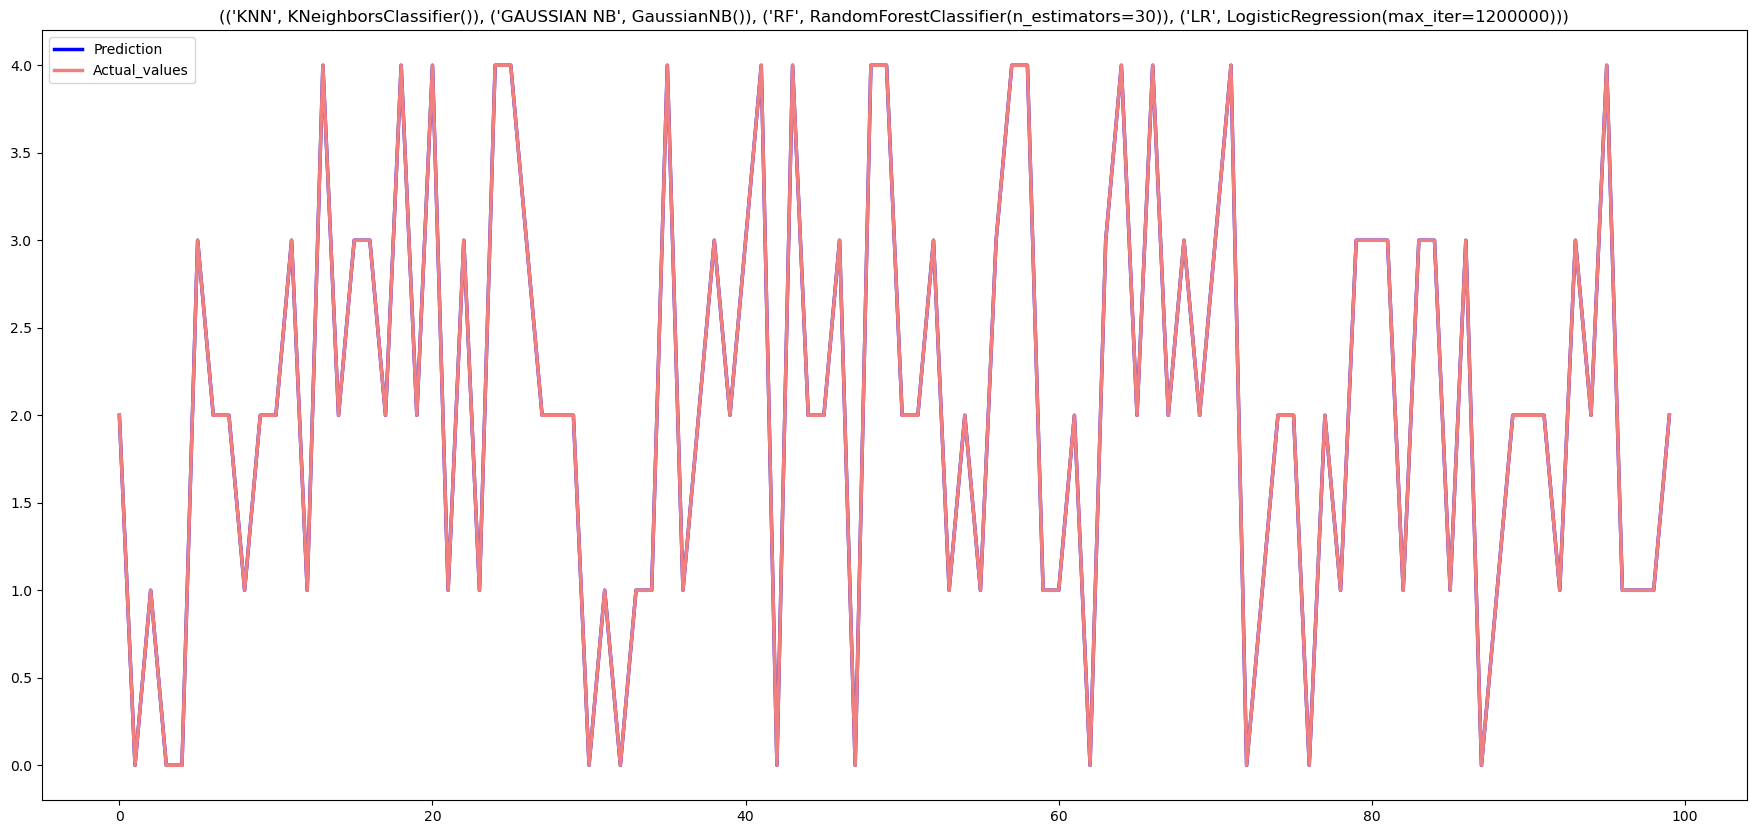



(('KNN', KNeighborsClassifier()), ('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier(n_estimators=30)), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  816.0656731128693
- Testing time :  38.18512558937073
----------------------------------
- Train Accuracy : 0.9991053264630325
- Train MCC : 0.9988820805259476
- Train F1 score : 0.9991052574490487
- Train Precision : 0.9991068847282134
- Train Recall : 0.9991053264630325
- Train Cohens Kappa Score : 0.9988816565820693
- Train Log Loss : 0.0029483014216747593
----------------------------------
Model performance for Test set
- Test Accuracy : 0.998099282776235
- Test MCC : 0.9976242150281616
- Test F1 score : 0.9980990783172958
- Test Precision : 0.9980994054957566
- Test Recall : 0.998099282776235
- Test Cohens Kappa Score : 0.99762408193862
- Test Log Loss : 0.007665917152921353
----------------------------------
Mean Absolute Error -  0.0036826396210445037
Mean Squared Error -  0.009562983532067179
Root

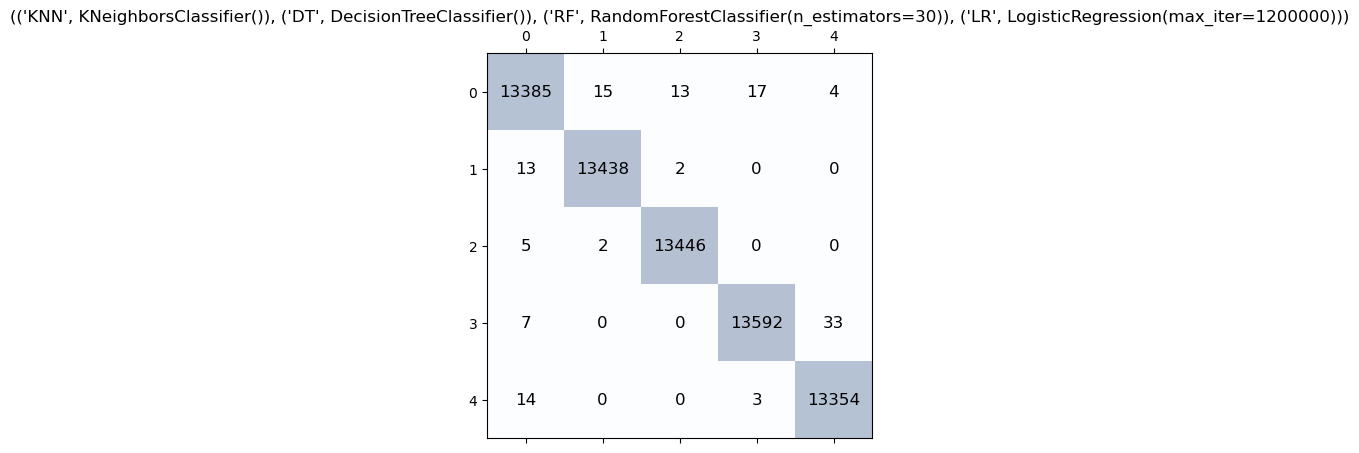

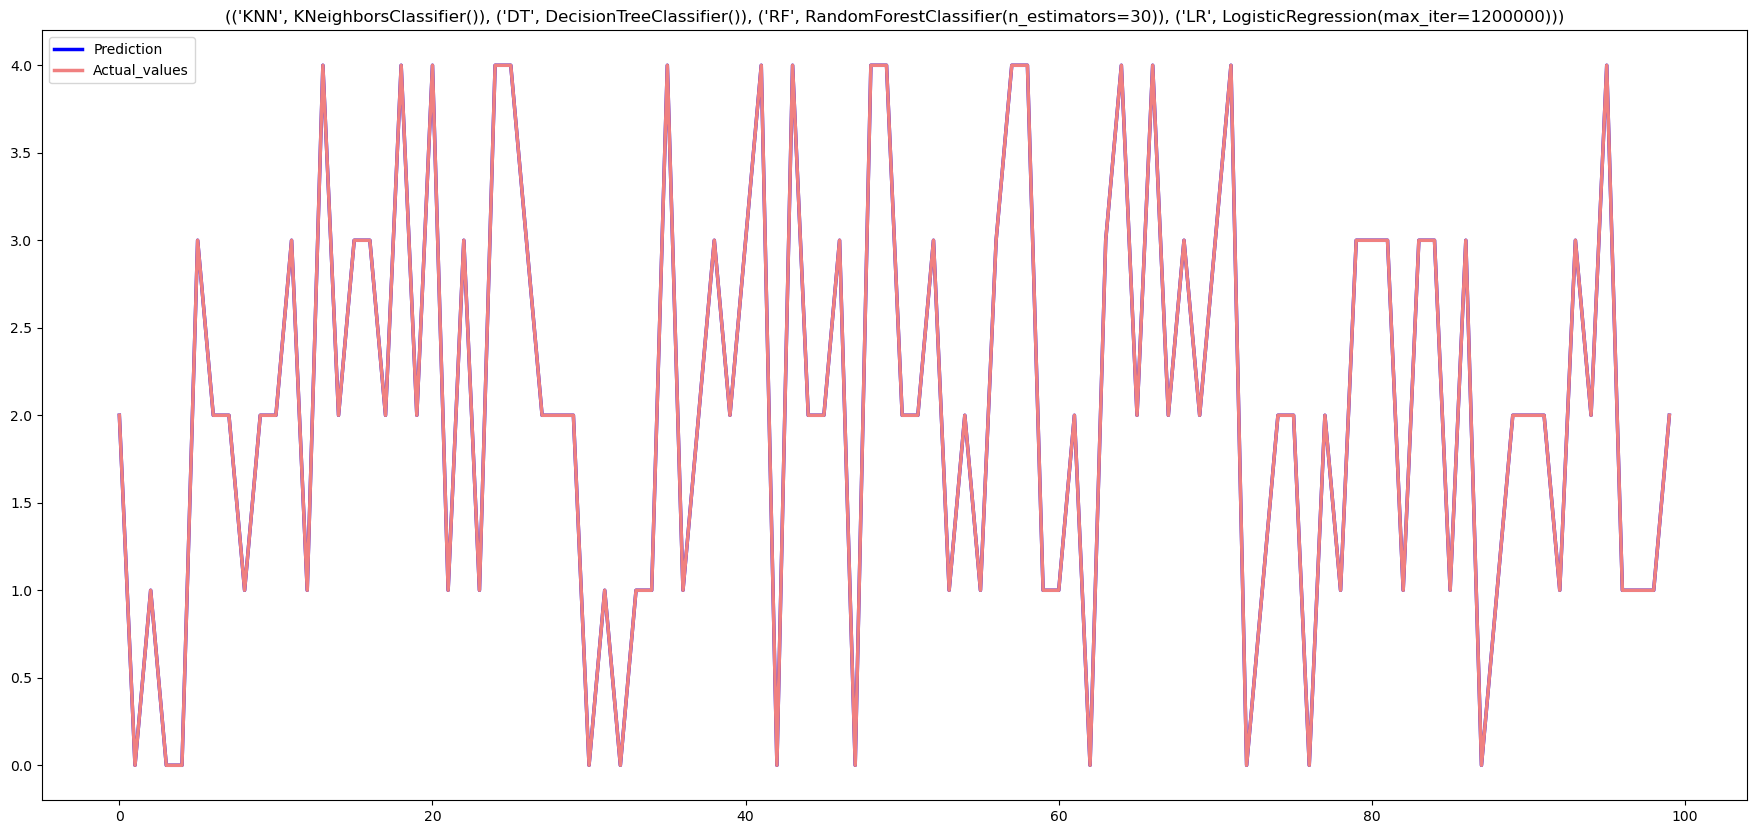



(('KNN', KNeighborsClassifier()), ('GAUSSIAN NB', GaussianNB()), ('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier(n_estimators=30)), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  727.6386017799377
- Testing time :  30.510819911956787
----------------------------------


In [ ]:
from itertools import combinations,product
algo_list = [
    ('KNN',knn),
    ('GAUSSIAN NB',nb),
    ('DT',dt),
    ('RF',rf),
    ('LR',lr)
    ]

list_combo = []
for n in range(len(algo_list) + 1):
    list_combo += combinations(algo_list, n)
res = list_combo[26:30]+list_combo[31:32]
for i in res:
    print('\n')
    print(i)
    stack_model = StackingClassifier(estimators=list(i), final_estimator=MLPClassifier())
    start_time = time.time()
    stack_model.fit(X_train, Y_train)
    end_time = time.time()
    print("- Training time : ",end_time-start_time)
    start_time = time.time()
    Y_test_predf1 = stack_model.predict(X_test)
    end_time = time.time()
    print("- Testing time : ",end_time-start_time)
    print('----------------------------------')
    Y_train_predf1 = stack_model.predict(X_train)
    Y_train_probsf1 = stack_model.predict_proba(X_train)
    Y_test_probsf1 = stack_model.predict_proba(X_test)

    # Training set model performance
    stack_model_train_accuracy = accuracy_score(Y_train, Y_train_predf1)
    stack_model_train_mcc = matthews_corrcoef(Y_train, Y_train_predf1)
    stack_model_train_f1 = f1_score(Y_train, Y_train_predf1, average='weighted') 
    stack_model_train_precision = precision_score(Y_train, Y_train_predf1,average='weighted')
    stack_model_train_recall = recall_score(Y_train, Y_train_predf1, average='weighted')
    stack_model_train_ckscore = cohen_kappa_score(Y_train, Y_train_predf1)
    stack_model_train_logloss = log_loss(Y_train, Y_train_probsf1)

    # Test set model performance
    stack_model_test_accuracy = accuracy_score(Y_test, Y_test_predf1) 
    stack_model_test_mcc = matthews_corrcoef(Y_test, Y_test_predf1)
    stack_model_test_f1 = f1_score(Y_test, Y_test_predf1, average='weighted')
    stack_model_test_precision = precision_score(Y_test, Y_test_predf1,average='weighted')
    stack_model_test_recall = recall_score(Y_test, Y_test_predf1, average='weighted')
    stack_model_test_ckscore = cohen_kappa_score(Y_test, Y_test_predf1)
    stack_model_test_logloss = log_loss(Y_test, Y_test_probsf1)

    print('- Train Accuracy : %s' % stack_model_train_accuracy)
    print('- Train MCC : %s' % stack_model_train_mcc)
    print('- Train F1 score : %s' % stack_model_train_f1)
    print('- Train Precision : %s' % stack_model_train_precision)
    print('- Train Recall : %s' % stack_model_train_recall)
    print('- Train Cohens Kappa Score : %s' % stack_model_train_ckscore)
    print('- Train Log Loss : %s' % stack_model_train_logloss)
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Test Accuracy : %s' % stack_model_test_accuracy)
    print('- Test MCC : %s' % stack_model_test_mcc)
    print('- Test F1 score : %s' % stack_model_test_f1)
    print('- Test Precision : %s' % stack_model_test_precision)
    print('- Test Recall : %s' % stack_model_test_recall)
    print('- Test Cohens Kappa Score : %s' % stack_model_test_ckscore)
    print('- Test Log Loss : %s' % stack_model_test_logloss)
    print('----------------------------------')
    print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test, Y_test_predf1))
    print("Mean Squared Error - " , metrics.mean_squared_error(Y_test, Y_test_predf1))
    print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test, Y_test_predf1)))
    print('----------------------------------')
    matrix(Y_test, Y_test_predf1, i)
    plot(Y_test, Y_test_predf1, i)



(('KNN', KNeighborsClassifier()), ('GAUSSIAN NB', GaussianNB()), ('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier(n_estimators=30)), ('LR', LogisticRegression(max_iter=1200000)))
- Training time :  772.3868420124054
- Testing time :  32.071879863739014
----------------------------------
- Train Accuracy : 0.9990570660647728
- Train MCC : 0.9988218175816408
- Train F1 score : 0.9990570158214124
- Train Precision : 0.9990589117486937
- Train Recall : 0.9990570660647728
- Train Cohens Kappa Score : 0.9988213309625541
- Train Log Loss : 0.0028961867116337053
----------------------------------
Model performance for Test set
- Test Accuracy : 0.9980250360096817
- Test MCC : 0.9975316062307358
- Test F1 score : 0.9980245515722597
- Test Precision : 0.9980254009542449
- Test Recall : 0.9980250360096817
- Test Cohens Kappa Score : 0.9975312732640087
- Test Log Loss : 0.007504113673626609
----------------------------------
Mean Absolute Error -  0.0036380915611125136
Mean Square

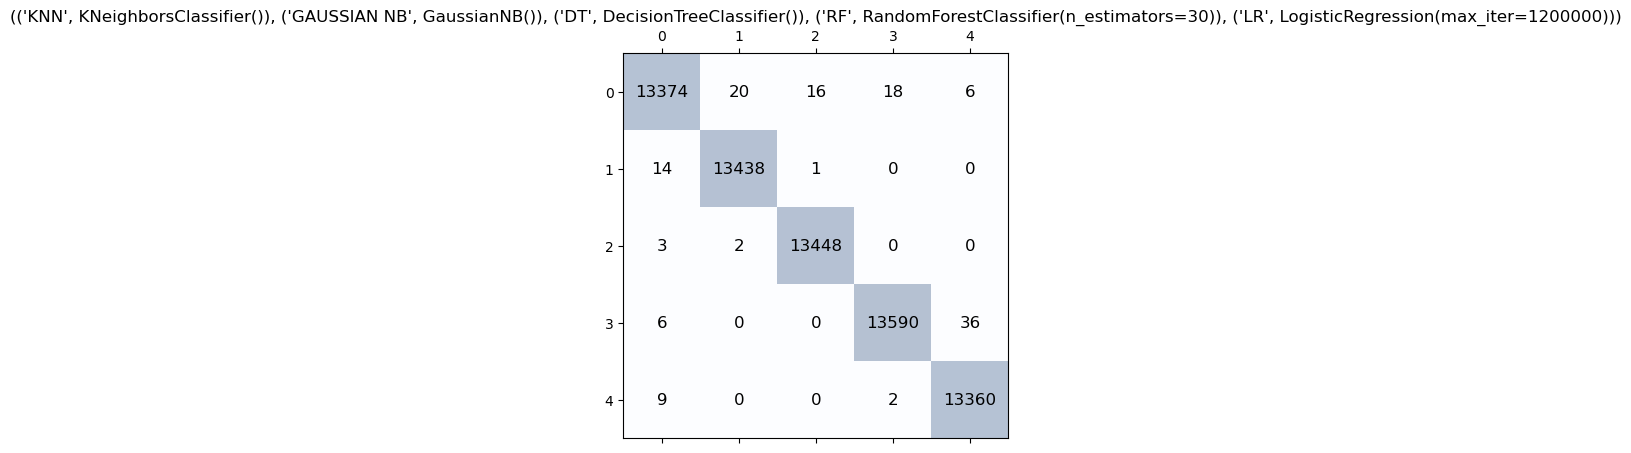

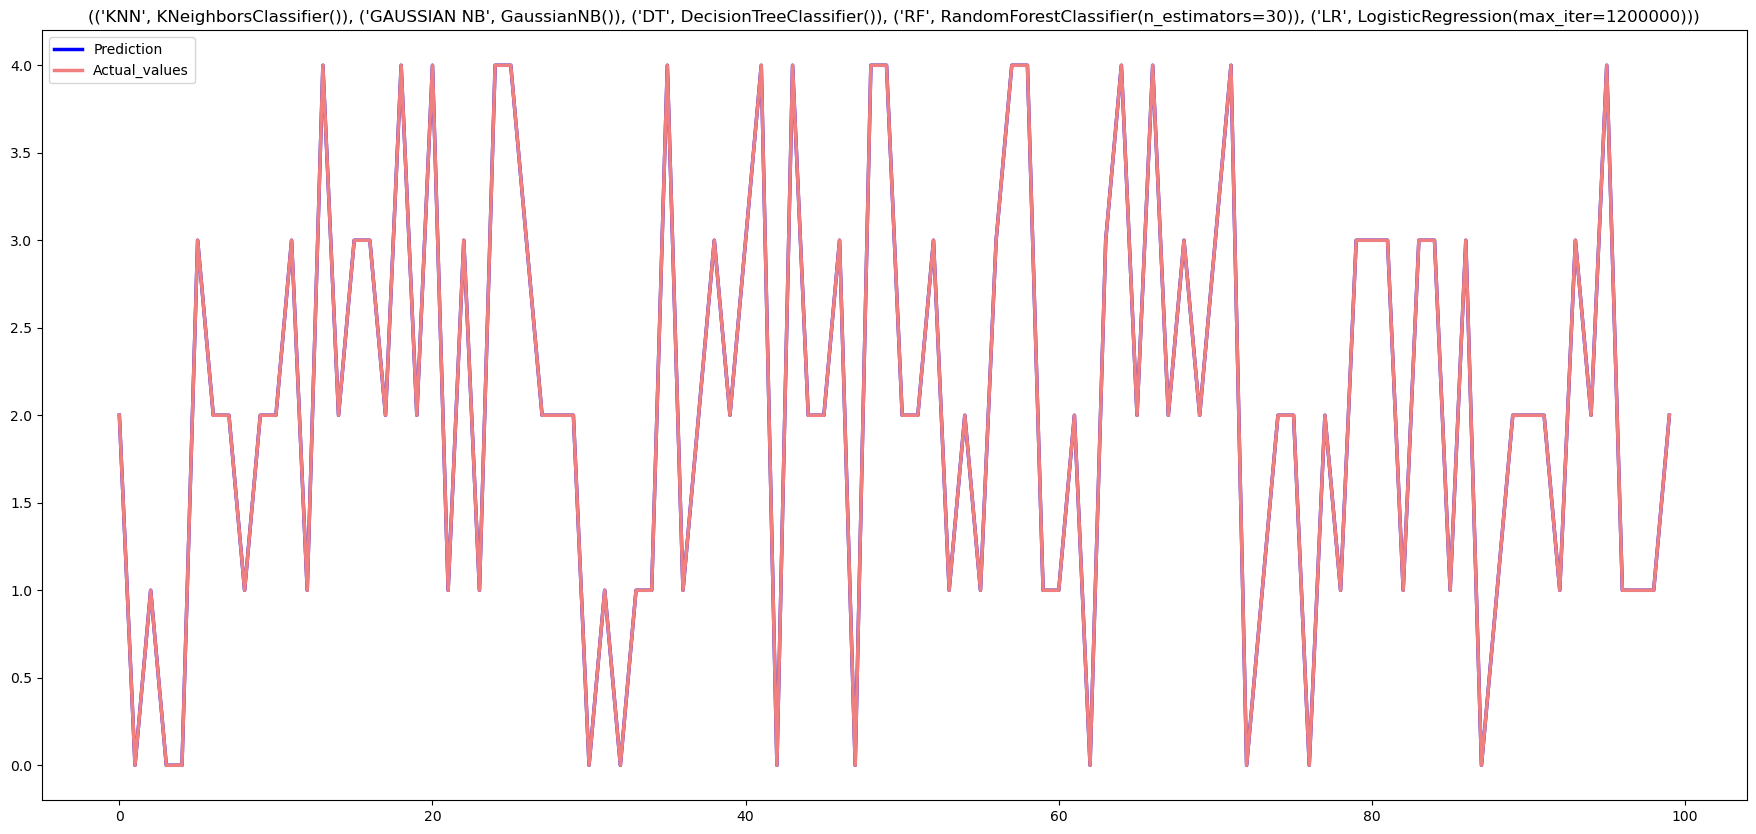

In [12]:
from itertools import combinations,product
algo_list = [
    ('KNN',knn),
    ('GAUSSIAN NB',nb),
    ('DT',dt),
    ('RF',rf),
    ('LR',lr)
    ]

list_combo = []
for n in range(len(algo_list) + 1):
    list_combo += combinations(algo_list, n)
res = list_combo[31:32]
for i in res:
    print('\n')
    print(i)
    stack_model = StackingClassifier(estimators=list(i), final_estimator=MLPClassifier())
    start_time = time.time()
    stack_model.fit(X_train, Y_train)
    end_time = time.time()
    print("- Training time : ",end_time-start_time)
    start_time = time.time()
    Y_test_predf1 = stack_model.predict(X_test)
    end_time = time.time()
    print("- Testing time : ",end_time-start_time)
    print('----------------------------------')
    Y_train_predf1 = stack_model.predict(X_train)
    Y_train_probsf1 = stack_model.predict_proba(X_train)
    Y_test_probsf1 = stack_model.predict_proba(X_test)

    # Training set model performance
    stack_model_train_accuracy = accuracy_score(Y_train, Y_train_predf1)
    stack_model_train_mcc = matthews_corrcoef(Y_train, Y_train_predf1)
    stack_model_train_f1 = f1_score(Y_train, Y_train_predf1, average='weighted') 
    stack_model_train_precision = precision_score(Y_train, Y_train_predf1,average='weighted')
    stack_model_train_recall = recall_score(Y_train, Y_train_predf1, average='weighted')
    stack_model_train_ckscore = cohen_kappa_score(Y_train, Y_train_predf1)
    stack_model_train_logloss = log_loss(Y_train, Y_train_probsf1)

    # Test set model performance
    stack_model_test_accuracy = accuracy_score(Y_test, Y_test_predf1) 
    stack_model_test_mcc = matthews_corrcoef(Y_test, Y_test_predf1)
    stack_model_test_f1 = f1_score(Y_test, Y_test_predf1, average='weighted')
    stack_model_test_precision = precision_score(Y_test, Y_test_predf1,average='weighted')
    stack_model_test_recall = recall_score(Y_test, Y_test_predf1, average='weighted')
    stack_model_test_ckscore = cohen_kappa_score(Y_test, Y_test_predf1)
    stack_model_test_logloss = log_loss(Y_test, Y_test_probsf1)

    print('- Train Accuracy : %s' % stack_model_train_accuracy)
    print('- Train MCC : %s' % stack_model_train_mcc)
    print('- Train F1 score : %s' % stack_model_train_f1)
    print('- Train Precision : %s' % stack_model_train_precision)
    print('- Train Recall : %s' % stack_model_train_recall)
    print('- Train Cohens Kappa Score : %s' % stack_model_train_ckscore)
    print('- Train Log Loss : %s' % stack_model_train_logloss)
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Test Accuracy : %s' % stack_model_test_accuracy)
    print('- Test MCC : %s' % stack_model_test_mcc)
    print('- Test F1 score : %s' % stack_model_test_f1)
    print('- Test Precision : %s' % stack_model_test_precision)
    print('- Test Recall : %s' % stack_model_test_recall)
    print('- Test Cohens Kappa Score : %s' % stack_model_test_ckscore)
    print('- Test Log Loss : %s' % stack_model_test_logloss)
    print('----------------------------------')
    print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test, Y_test_predf1))
    print("Mean Squared Error - " , metrics.mean_squared_error(Y_test, Y_test_predf1))
    print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test, Y_test_predf1)))
    print('----------------------------------')
    matrix(Y_test, Y_test_predf1, i)
    plot(Y_test, Y_test_predf1, i)